# import Libraries

In [1]:
# data manipulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from rapidfuzz import process, fuzz
from sklearn.impute import KNNImputer
import pandas as pd
import io
import warnings
import ast
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder

# data processing and modeling

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import joblib

# upload Data

In [2]:
data_1 = pd.read_csv('/kaggle/input/cat-datathon-1-0/Train/train_subset_1.csv')
data_2 = pd.read_csv('/kaggle/input/cat-datathon-1-0/Train/train_subset_2.csv')
data_3 = pd.read_csv('/kaggle/input/cat-datathon-1-0/Train/train_subset_3.csv')
data_4 = pd.read_csv('/kaggle/input/cat-datathon-1-0/Train/train_subset_4.csv')
test = pd.read_csv('/kaggle/input/cat-datathon-1-0/Test/test.csv')
pd.set_option('display.max_columns', None)

In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   unnamed:0                   10386 non-null  object
 1   personDescription           10390 non-null  object
 2   min.YearlyIncome            10381 non-null  object
 3   customerOrder               10388 non-null  object
 4   grossWeight                 10386 non-null  object
 5   netWeight                   10382 non-null  object
 6   isRecyclable?               10384 non-null  object
 7   additionalFeaturesInMarket  8091 non-null   object
 8   promotionName               8847 non-null   object
 9   storeKind                   8875 non-null   object
 10  storeSales                  10387 non-null  object
 11  storeCost                   10390 non-null  object
 12  groceryArea                 9364 non-null   object
 13  frozenArea                  9328 non-null   ob

In [4]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   field_unnamed:_0               10389 non-null  object
 1   field_person_description       10389 non-null  object
 2   min__yearly_income             10388 non-null  object
 3   customer_order                 10387 non-null  object
 4   is_recyclable?                 10384 non-null  object
 5   additional_features_in_market  8406 non-null   object
 6   field_promotion_name           8904 non-null   object
 7   store_kind                     8880 non-null   object
 8   store_sales                    10384 non-null  object
 9   store_cost                     10389 non-null  object
 10  grocery_area                   9331 non-null   object
 11  store_area                     9345 non-null   object
 12  frozen_area                    9360 non-null   object
 13  m

In [5]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   z153yi8      10390 non-null  object
 1   u5erb551yo   10388 non-null  object
 2   vbi5ustafos  10383 non-null  object
 3   v1sves1l     10390 non-null  object
 4   nj8d1js6mly  9189 non-null   object
 5   zw9u23wfoat  9172 non-null   object
 6   bslnykoygnx  8194 non-null   object
 7   ixet0uzuuoh  10383 non-null  object
 8   bcqe6tdkash  10387 non-null  object
 9   gnyebdyjsq   9349 non-null   object
 10  laedo3e      9357 non-null   object
 11  u3onbs8utn   10388 non-null  object
 12  910alza9eq   10390 non-null  object
 13  qvwwq8qe00   9333 non-null   object
 14  ykri3z1g     9350 non-null   object
 15  gds8lo       9363 non-null   object
 16  zy5q4ch85    9374 non-null   object
 17  snbu4rj      10387 non-null  object
 18  y02zr8iy     10387 non-null  object
 19  oep16bl      10385 non-nu

In [6]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10397 entries, 0 to 10396
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Unnamed: 0                             10394 non-null  object
 1   personDescription                      10385 non-null  object
 2   min._yearly_income_info                10386 non-null  object
 3   data_customer_order                    10394 non-null  object
 4   grossWeight                            9352 non-null   object
 5   netWeight                              9355 non-null   object
 6   is_recyclable?_field                   10390 non-null  object
 7   additional_features_in_market_measure  10075 non-null  object
 8   PN                                     8216 non-null   object
 9   SK                                     8216 non-null   object
 10  store_sales                            10377 non-null  object
 11  SC             

# combine data

In [7]:
dfs = [data_1, data_2, data_3, data_4]
for i ,df in enumerate(dfs):
    print(f'DataSet {i+1}:\n', df.columns)

DataSet 1:
 Index(['unnamed:0', 'personDescription', 'min.YearlyIncome', 'customerOrder',
       'grossWeight', 'netWeight', 'isRecyclable?',
       'additionalFeaturesInMarket', 'promotionName', 'storeKind',
       'storeSales', 'storeCost', 'groceryArea', 'frozenArea', 'meatArea',
       'cost', 'customer_city', 'customer_state', 'customer_lat',
       'customer_lng', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'review_score'],
      dtype='object')
DataSet 2:
 Index(['field_unnamed:_0', 'field_person_description', 'min__yearly_income',
       'customer_order', 'is_recyclable?', 'additional_features_in_market',
       'field_promotion_name', 'store_kind', 'store_sales', 'store_cost',
       'grocery_area', 'store_area', 'frozen_area', 'meat_area', 'cost',
       'field_customer_city', 'customer_state', 'customer_lat', 'customer_lng',
       'field_seller_city', 'seller_state', 'seller_lat', 'seller_lng',
       'review_score', 'weights'],
      dtype='object')
D

In [8]:
def clean_column_name(name: str) -> str:
    # 1. First remove unwanted words
    for word in ['field', 'metric', 'var', 'data', 'info', 'measure', 'min', '0', '.', '?']:
        name = name.replace(word, '')   # remove anywhere

    # 2. Convert camelCase → snake_case
    s1 = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', name)
    s2 = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', s1)

    # 3. Replace spaces/hyphens with underscores
    s3 = re.sub(r'[\s\-]+', '_', s2)

    # 4. Normalize underscores
    s4 = re.sub(r'__+', '_', s3).strip('_')

    # 5. Lowercase
    col = s4.lower()

    # ---- Minimal mapping for ambiguous cases ----
    mapping = {
        'unnamed:': 'id',
        'sc': 'store_cost',
        'ga': 'grocery_area',
        'pn': 'promotion_name',
        'sk': 'store_kind',
        'cus56': 'customer_state',
        'rev54': 'review_score',
    }

    return mapping.get(col, col)


In [9]:
dfs = [data_1, data_2, data_4]
for df in dfs:
    df.columns = [clean_column_name(col) for col in df.columns]

In [10]:
dfs = [data_1, data_2, data_3, data_4]
for df in dfs:
    print(df.columns)
    print(len(df.columns))

Index(['id', 'person_description', 'yearly_income', 'customer_order',
       'gross_weight', 'net_weight', 'is_recyclable',
       'additional_features_in_market', 'promotion_name', 'store_kind',
       'store_sales', 'store_cost', 'grocery_area', 'frozen_area', 'meat_area',
       'cost', 'customer_city', 'customer_state', 'customer_lat',
       'customer_lng', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'review_score'],
      dtype='object')
25
Index(['id', 'person_description', 'yearly_income', 'customer_order',
       'is_recyclable', 'additional_features_in_market', 'promotion_name',
       'store_kind', 'store_sales', 'store_cost', 'grocery_area', 'store_area',
       'frozen_area', 'meat_area', 'cost', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'seller_city', 'seller_state',
       'seller_lat', 'seller_lng', 'review_score', 'weights'],
      dtype='object')
25
Index(['z153yi8', 'u5erb551yo', 'vbi5ustafos', 'v1sves1l', 'nj8d1j

In [11]:
data_3.head(2)

,z153yi8,u5erb551yo,vbi5ustafos,v1sves1l,nj8d1js6mly,zw9u23wfoat,bslnykoygnx,ixet0uzuuoh,bcqe6tdkash,gnyebdyjsq,laedo3e,u3onbs8utn,910alza9eq,qvwwq8qe00,ykri3z1g,gds8lo,zy5q4ch85,snbu4rj,y02zr8iy,oep16bl,hvh8c4,fqs6141,vrhnlr48,v0zfxgo3xh8,47scottr,98nwv2,m8b70rwh
0,mc_ID_1350,"Married Female with four children, education: ...",30K+,"Dairy from Dairy department, Ordered Brand : G...",21.0771,18.17 kg,2.907200000000003,no,"['Ready Food', 'Bar For Salad', 'Coffee Bar', ...",Roller Savings (High),gourmet,2.67 M,0.801 M,1424.85,2200.69,465.54,310.26,499.7265,cardoso,SP,amount: -20.07337070860132,-49.91260766329853,bRasIlIA,DF,-15.656754584921352,data: -47.808582687413306,val: 4.0
1,mc_ID_1351,"Single Male with three children, education: pa...",30K+,"Fruit from Produce department, Ordered Brand :...",30.3801,27.3275,3.052599999999998,yes,['Florist'],You Save Days,supermarke7,5.7 M,2.223 M,NaN,2194.54,523.32,348.85,689.3663,_sao paulo,sp_,-23.666837080690684,-46.66437239509124,OSaSCO,SP,-23.552456794881493,-46.78012559033992,5.0


In [12]:
data_4.head(2)

,id,person_description,yearly_income,customer_order,gross_weight,net_weight,is_recyclable,additional_features_in_market,promotion_name,store_kind,store_sales,store_cost,grocery_area,store_area,frozen_area,meat_area,cost,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,review_score
0,mc_ID_11745,Single Male with three children + education: b...,50 Thousand,Bathroom Products from Health and Hygiene depa...,19.0421,14.6813,no,"['Ready Food', 'Bar For Salad', 'Florist', 'Co...",Roller Savings (High),Gourmet,4.47 M,1.3857 M,1566.86,2211.99,385.45,257.63,637.6939,caMpo ERE,sC,-26.39359270318612,-53.08265733215715,maringa,pr,-23.437975269077903,-51.91385959802448,1.0
1,mc_ID_11746,"Married Male with two children, education...",30K+,"Breakfast Foods from Frozen Foods department, ...",NaN,8.1837,no,"['Video Store', 'Bar For Salad', 'Ready Food',...",Bag Stuffer,Deluxa,$1.71 M,0.7524 M,1734.5,2575.43,503.07,335.38,662.2226,cURITIBa,PR,-25.48129914876794,-49.27064708076061,Belo Horizonte,SP,-19.81011863229108,-43.98472732006267,4.0


In [13]:
data_3.columns

Index(['z153yi8', 'u5erb551yo', 'vbi5ustafos', 'v1sves1l', 'nj8d1js6mly',
       'zw9u23wfoat', 'bslnykoygnx', 'ixet0uzuuoh', 'bcqe6tdkash',
       'gnyebdyjsq', 'laedo3e', 'u3onbs8utn', '910alza9eq', 'qvwwq8qe00',
       'ykri3z1g', 'gds8lo', 'zy5q4ch85', 'snbu4rj', 'y02zr8iy', 'oep16bl',
       'hvh8c4', 'fqs6141', 'vrhnlr48', 'v0zfxgo3xh8', '47scottr', '98nwv2',
       'm8b70rwh'],
      dtype='object')

In [14]:
new_columns = [
    'id', 'person_description', 'yearly_income', 'customer_order',
    'gross_weight', 'net_weight', 'unknown', 'is_recyclable',
    'additional_features_in_market', 'promotion_name', 'store_kind',
    'store_sales', 'store_cost', 'grocery_area', 'store_area',
    'frozen_area', 'meat_area', 'cost', 'customer_city', 'customer_state',
    'customer_lat', 'customer_lng', 'seller_city', 'seller_state',
    'seller_lat', 'seller_lng', 'review_score'
]
data_3.columns = new_columns

In [15]:
data_3.rename(columns={'unknown':'package_weight'}, inplace=True)

In [16]:
dfs = [data_1, data_2, data_3, data_4]
for i ,df in enumerate(dfs):
    print(f'DataSet {i+1}:\n', df.columns)
    print('Number os columns:', len(df.columns),'\n')


DataSet 1:
 Index(['id', 'person_description', 'yearly_income', 'customer_order',
       'gross_weight', 'net_weight', 'is_recyclable',
       'additional_features_in_market', 'promotion_name', 'store_kind',
       'store_sales', 'store_cost', 'grocery_area', 'frozen_area', 'meat_area',
       'cost', 'customer_city', 'customer_state', 'customer_lat',
       'customer_lng', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'review_score'],
      dtype='object')
Number os columns: 25 

DataSet 2:
 Index(['id', 'person_description', 'yearly_income', 'customer_order',
       'is_recyclable', 'additional_features_in_market', 'promotion_name',
       'store_kind', 'store_sales', 'store_cost', 'grocery_area', 'store_area',
       'frozen_area', 'meat_area', 'cost', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'seller_city', 'seller_state',
       'seller_lat', 'seller_lng', 'review_score', 'weights'],
      dtype='object')
Number os columns: 25 



 **before combine :**
- dataset 1 missing store area column
- dataset 2 combine gross weight and net weight
- all data sets except 3 missing package weight

In [17]:
data_2['weights']

0          {'gross': val: 10.5822, 'net': 7.675}
1        {'gross': 20.2049, 'net': data: 18.606}
2         {'gross': val: 17.2978, 'net': 14.376}
3             {'gross': 14.2597, 'net': 12.8062}
4               {'gross': 25.2925, 'net': 22.24}
                          ...                   
10390          {'gross': 14.4487, 'net': 11.527}
10391           {'gross': 26.31, 'net': 23.4028}
10392          {'gross': 31.543, 'net': 28.6358}
10393          {'gross': 19.4781, 'net': 14.972}
10394           {'gross': nan, 'net': 52.24 lbs}
Name: weights, Length: 10395, dtype: object

In [18]:
# clean unwanted text
data_2['weights'] = data_2['weights'].str.replace(r' val:| data:', '', regex=True)

# extract gross and net numbers
data_2['gross_weight'] = data_2['weights'].str.extract(r"'gross':\s*([\d\.]+)")
data_2['net_weight']   = data_2['weights'].str.extract(r"'net':\s*([\d\.]+)")

# drop weights
data_2.drop(columns=['weights'], inplace=True)

- after cleaning the columns will be able to exctract store area and package wiat from the other columns

In [19]:
train = pd.concat([data_1, data_2, data_3, data_4], ignore_index=True)

In [20]:
train.head()

,id,person_description,yearly_income,customer_order,gross_weight,net_weight,is_recyclable,additional_features_in_market,promotion_name,store_kind,store_sales,store_cost,grocery_area,frozen_area,meat_area,cost,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,review_score,store_area,package_weight
0,mc_ID_0,"Single Female with four children, education: b...",$10K+,"Cleaning Supplies from Household department, O...",28.1997,-26.6008,recyclable,"['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,deluxe,8.76 Millions,4.2924 Millions,2037.64,481.98,323,602.7575,FLORIANOPOLIS,5C,amount: -27.591715047463765,-48.506655980581606,navegantes,sC,-26.85907968190116,-48.63953562951828,5.0,NaN,NaN
1,mc_ID_1,Single Female with three children and educatio...,€42K+,"Snack Foods from Snack Foods department, Order...",16.571,14.972,non recyclable,NaN,Budget Bargains,Supermarket,$6.36 Millions,1.9716 Millions,2049.72,457.36,NaN,708.665,abaete,MG,-19.16050583709177,-45.45377571289521,betim,MG,-19.95866259017359,-44.19878943272789,4.0,NaN,NaN
2,mc_ID_2,"MaRrIeD MaLe wItH TwO ChIlDrEn,eDuCaTiOn: HiGh...",30K+,"Magazines from Periodicals department, Ordered...",-28.6358,data: 27.1822,recyclable,['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,1322.21,523.32,348.85,val: 564.2647,Sao PauLo,Sp,data: -23.50609758451153,-46.73241237719997,PRAIE GRANDE,$P,-24.026786758814687,-46.49304889148245,5.0,NaN,NaN
3,mc_ID_3,"Single Female with three children, education: ...",30K+ annually,"Dairy from Dairy department, Ordered Brand : C...",14.2161,amount: 11.2944,recyclable,['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,NaN,440.92,293.95,724.5119,sao paulo,SP,-23.665780780743223,-46.6821276135092,Sao Paulo,SP,-23.69289565500035,-46.68021046531817,1.0,NaN,NaN
4,mc_ID_4,"Married Female with five children , education:...",50000,"Vegetables from Produce department, Ordered Br...",12.6172,9.71,non recyclable,"['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,"11.56 ,000,000illions",4.9708 Millions,1872.19,593.93,395.95,519.7574,capivari,SP,-23.0122137105142,-47.52203973160603,sao paulo,\tSP,val: -23.539824031911863,-46.434679443937874,5.0,NaN,NaN


In [21]:
test.columns

Index(['ID', 'Person Description', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'customer_city',
       'customer_state', 'customer_lat', 'customer_lng', 'seller_city',
       'seller_state', 'seller_lat', 'seller_lng', 'review_score'],
      dtype='object')

In [22]:
test.columns = [clean_column_name(col) for col in test.columns]

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41582 entries, 0 to 41581
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             41559 non-null  object
 1   person_description             41552 non-null  object
 2   yearly_income                  41538 non-null  object
 3   customer_order                 41559 non-null  object
 4   gross_weight                   37557 non-null  object
 5   net_weight                     37582 non-null  object
 6   is_recyclable                  41541 non-null  object
 7   additional_features_in_market  36959 non-null  object
 8   promotion_name                 35316 non-null  object
 9   store_kind                     35328 non-null  object
 10  store_sales                    41536 non-null  object
 11  store_cost                     41549 non-null  object
 12  grocery_area                   37718 non-null  object
 13  f

In [24]:
train.apply(lambda col: pd.Series({"type": str(col.dtype),
                                "null percentage": round(col.isna().sum() / len(train) * 100, 2),
                                'nunique': col.nunique(),
                                'unique': col.unique().tolist()})).T

,type,null percentage,nunique,unique
id,object,0.06,19485,"[mc_ID_0, mc_ID_1, mc_ID_2, mc_ID_3, mc_ID_4, ..."
person_description,object,0.07,8107,"[Single Female with four children, education: ..."
yearly_income,object,0.11,125,"[$10K+, €42K+, 30K+, 30K+ annually, 50000, 130..."
customer_order,object,0.06,347,"[Cleaning Supplies from Household department, ..."
gross_weight,object,9.68,2635,"[28.1997, 16.571, -28.6358, 14.2161, 12.6172, ..."
net_weight,object,9.62,2395,"[-26.6008, 14.972, data: 27.1822, amount: 11.2..."
is_recyclable,object,0.1,37,"[recyclable, non recyclable, nan, -1, nil, mis..."
additional_features_in_market,object,11.12,208,"[['Video Store', 'Florist', 'Ready Food', 'Cof..."
promotion_name,object,15.07,106,"[Dimes Off, Budget Bargains, Shelf Emptiers, S..."
store_kind,object,15.04,2172,"[deluxe, Supermarket, nan, Deluxe, SUpermArKET..."


- address some issues found in almost every column

In [25]:
missing_vals = [
    'unknown', 'data missing', 'to be determined', 'nil', '...', '-1', '-999',
    '-1.0', '-999.0', 'not available', 'tbd', '?', 'missing', '--',
    'not specified', '###',
]

def clean_unwanted_string(df):
    df = df.copy()

    for col in df.columns:
        if df[col].dtype == "object":
            # standardize text
            df[col] = df[col].str.strip().str.lower()
            # replace missing tokens
            df[col] = df[col].replace(missing_vals, np.nan)

    return df

In [26]:
train = clean_unwanted_string(train)

In [27]:
test = clean_unwanted_string(test)

- check duplicates

In [28]:
train.duplicated().sum()

1083

In [29]:
train.drop_duplicates(inplace=True)

# Data cleaning

## id colomn

In [30]:
train['id'].unique()

array(['mc_id_0', 'mc_id_1', 'mc_id_2', ..., '(mc_id_10065)',
       'mc_id_2222.', 'mc_id_13403.'], dtype=object)

In [31]:
train['id'].isna().sum()

108

In [32]:
train['id'] = train['id'].str.extract(r'(\d+\.?\d*)')

In [33]:
train['id'] = range(len(train))

### summary
- because it's conmbine from multiple datasets the column has duplicated values
- for now I just assigned all values form 0 to data lenght
- now no missing values or duplicates

## person_description column

### clean

In [34]:
train['person_description'].unique()[:20]

array(["single female with four children, education: bachelor'ss degree working as professional",
       'single female with three children and education: bachelors degree working as management',
       'married male with two children,education: high school degree working as skilled manual',
       'single female with three children, education: partial college working as professional',
       'married female with five children , education: bachelors degree working as professional',
       'single male with four children, education: high school degree working as manual',
       'married female with five children, education: high school degree working as professional',
       'married male with four children, education: partial high school working as skilled manual',
       'married male with five children, education: high school degree working as skilled manual',
       'single male with one child, education: high school degree working as manual',
       'married male with three childre

In [35]:
train['person_description'].isna().sum()

115

- select (male/female)
- select (single/married)
- select (numbers of kid/kids/child/childern)
- select education
- select work

In [36]:
import difflib

word_to_num = {
    "zero": 0, "no": 0, "none": 0,
    "one": 1, "two": 2, "three": 3, "four": 4, "five": 5
}

status_map = {
    "single": ["single", "singlee", "singel"],
    "married": ["married", "maried", "marrid"]
}

education_map = {
    "bachelors": ["bachelors", "batchelors", "bachelos", "bachelor'ss"],
    "high school": ["high school", "hs", "highschool", 'high  school'],
    "partial college": ["partial college", "partial collge", "partial colllege"],
    "partial high school": ["partial high school", "partial hs"],
    "graduate": ["graduate", "gradute"]
}

gender_map = {
    "male": ["male"],
    "female": ["female", "femal"]
}

occupation_map = {
    "professional": ["professional"],
    "management": ["management"],
    "clerical": ["clerical"],
    "manual": ["manual"],
    "skilled manual": ["skilled manual", "skilled"],
    "unskilled manual": ["unskilled manual", "unskilled"]
}


def normalize(text):
    """Lowercase and remove special chars."""
    return re.sub(r"[^a-z\s]", " ", str(text).lower()).strip()

def extract_exact(text, mapping):
    """Return the matched canonical key if any variant matches exactly as word."""
    txt = normalize(text).split()
    for key, variants in mapping.items():
        for v in variants:
            if v in txt:
                return key
    return np.nan

def extract_status(text, cutoff=0.8):
    """Fuzzy match status (single/married) even with typos."""
    txt = normalize(text)
    words = txt.split()

    # Flatten variants
    all_variants = {v: key for key, vals in status_map.items() for v in vals}

    for w in words:
        match = difflib.get_close_matches(w, all_variants.keys(), n=1, cutoff=cutoff)
        if match:
            return all_variants[match[0]]

    return np.nan

def extract_children(text):
    """Return number of children (0–5 max)."""
    txt = normalize(text).split()
    for word, num in word_to_num.items():
        if word in txt:
            return min(num, 5)
    return np.nan

def extract_education(text, cutoff=0.8):
    """Match education (exact phrase or fuzzy word match)."""
    txt = normalize(text)

    # Flatten map
    all_variants = {v: key for key, vals in education_map.items() for v in vals}

    # 1) Exact substring (works for multi-word like 'high school')
    for v, key in all_variants.items():
        if v in txt:
            return key

    # 2) Fuzzy word match (for typos like 'bachelos', 'gradute')
    words = txt.split()
    for w in words:
        match = difflib.get_close_matches(w, all_variants.keys(), n=1, cutoff=cutoff)
        if match:
            return all_variants[match[0]]

    return np.nan

# main function

def extract_person_description(df, col="person_description"):
    df["status"] = df[col].apply(extract_status)
    df["gender"] = df[col].apply(lambda x: extract_exact(x, gender_map))
    df["children"] = df[col].apply(extract_children)
    df["education"] = df[col].apply(extract_education)
    df["work"] = df[col].apply(lambda x: extract_exact(x, occupation_map))
    return df

In [37]:
train = extract_person_description(train)
train.drop(columns=["person_description"], inplace=True)

In [38]:
test = extract_person_description(test)
test.drop(columns=["person_description"], inplace=True)

In [39]:
cols = ["gender", "status", "children", "education", "work"]

print(train[cols].isnull().sum())

gender       115
status       115
children     115
education    115
work         115
dtype: int64


### impute

In [40]:
cols = ["gender", "status", "children", "education", "work"]

for col in cols:
    if train[col].isnull().any():
        mode_val = train[col].mode().iloc[0]  
        train[col].fillna(mode_val, inplace=True)

In [41]:
# الأعمدة المستهدفة
cols = ["gender", "status", "children", "education", "work"]

# نحتفظ بقيم mode لكل عمود من train
fill_values = {}

for col in cols:
    if train[col].isnull().any():
        mode_val = train[col].mode().iloc[0]
        train[col].fillna(mode_val, inplace=True)
        fill_values[col] = mode_val
    else:
        # حتى لو مفيش NaN نحفظ قيمة mode
        fill_values[col] = train[col].mode().iloc[0]

# نطبق نفس القيم على test
for col in cols:
    test[col].fillna(fill_values[col], inplace=True)


### Summary
- New features extracted (gender, status, children, education, work)
- impute those features with the mode
- dropped the original column

## customer_order column

In [42]:
print(train["customer_order"].unique()[:20])

['cleaning supplies from household department, ordered brand : red wing'
 'snack foods from snack foods department, ordered brand : nationeel'
 'magazines from periodicals department, ordered brand : excel'
 'dairy from dairy department, ordered brand : carlson'
 'vegetables from produce department, ordered brand : hermanos'
 'candles from household department, ordered brand : red wing'
 'pain relievers from health and hygiene department, ordered brand : steady'
 'vegetables from frozen foods department, ordered brand : golden'
 'beer and wine from alcoholic beverages department, ordered brand : top measure'
 'vegetables from produce department, ordered brand : tri-state'
 'frozen desserts from frozen foods department, ordered brand : pigtail'
 'breakfast foods from frozen foods department, ordered brand : carrington'
 'bread from baked goods department, ordered brand : sphinx'
 'baking goods from baking goods department, ordered brand : plato'
 'starchy foods from starchy foods depart

* select product
* select department
* select brand

### clean

In [43]:
def extract_order(order):
    if pd.isna(order):
        return pd.Series([np.nan, np.nan, np.nan])

    order = str(order).lower().strip()
    order = order.replace("(", "").replace(")", "").replace(".", "")

    product, department, brand = np.nan, np.nan, np.nan

    # Extract product
    prod_match = re.search(r"^([a-z\s]+?)\s+from", order)
    if prod_match:
        product = prod_match.group(1).strip()

    # Extract department
    dept_match = re.search(r"from\s+(.+?)\s+department", order)
    if dept_match:
        department = dept_match.group(1).strip()

    # Extract brand
    brand_match = re.search(r"ordered brand\s*:\s*([a-z\s\-]+)", order)
    if brand_match:
        brand = brand_match.group(1).strip()

    return pd.Series([product, department, brand])

In [44]:
# تطبيق الدالة على train
train[["product", "department", "brand"]] = train["customer_order"].apply(extract_order)
train.drop(columns=["customer_order"], inplace=True)

# تطبيق نفس الدالة على test
test[["product", "department", "brand"]] = test["customer_order"].apply(extract_order)
test.drop(columns=["customer_order"], inplace=True)


### impute

In [45]:
cols = ["product", "department", "brand"]

for col in cols:
    print(f"Number of NaN in {col} befor fillna:", train[col].isna().sum())

Number of NaN in product befor fillna: 115
Number of NaN in department befor fillna: 115
Number of NaN in brand befor fillna: 115


In [46]:
cols = ["product", "department", "brand"]

for col in cols:
    # حساب المود
    mode_val = train[col].mode()[0]  # نأخذ أول مود في حال وجود أكثر من مود
    # استبدال القيم المفقودة بالمود
    train[col].fillna(mode_val, inplace=True)

In [47]:
cols = ["product", "department", "brand"]

# نخزن قيم mode من train
fill_values = {}

for col in cols:
    mode_val = train[col].mode()[0]
    train[col].fillna(mode_val, inplace=True)
    fill_values[col] = mode_val  # نخزنها لاستخدامها مع test

# نطبق نفس القيم على test
for col in cols:
    test[col].fillna(fill_values[col], inplace=True)

# التحقق
for col in cols:
    print(f"{col} - NaN in train:", train[col].isna().sum(),
          "| NaN in test:", test[col].isna().sum())


product - NaN in train: 0 | NaN in test: 0
department - NaN in train: 0 | NaN in test: 0
brand - NaN in train: 0 | NaN in test: 0


### Summary
- New features extracted (product, department, brand)
- imputed those features with the mode
- dropped the original column

## yearly_income column

### clean

In [48]:
train['yearly_income'].unique()

array(['$10k+', '€42k+', '30k+', '30k+ annually', '50000', '130k+',
       '10k+', '50k+', '70 thousand', '30 thousand', '110k+', '$90k+',
       '70k+', 'income: 30k+', '10k or more', '130k', 'income: 130k+',
       '€59k+', '$30k+', '360+ monthly', '90k+', '150k+', '€25k+',
       '600+ monthly', '70k+ annually', '10k', '50k', '€8k+', '30000',
       '10 thousand', '1800+ monthly', '70000', nan, '30k',
       '130k+ annually', '1320+ monthly', '70k or more', '840+ monthly',
       '10000', 'income: 10k+', '50k+ annually', '€93k+', '90k or more',
       '$70k+', '10k+ annually', '50 thousand', 'income: 90k+', '$50k+',
       '150k or more', '90000', '30k or more', '130k or more',
       '50k or more', 'income: 110k+', '130000', '120+ monthly',
       '110k+ annually', '150k', 'income: 50k+', '70k', '90 thousand',
       '1080+ monthly', '110000', 'income: 70k+', '€110k+',
       '1560+ monthly', '110k', 'income: 150k+', '$130k+', '€127k+',
       '150k+ annually', '110k or more', '90k

**problems:**
- monthly >> annually
- k, Thousand >> 1000
- € >> $
- special characters (select only numbers)

In [49]:
def clean_income(col):
    # Masks
    monthly_mask = col.str.contains('monthly', case=False, na=False)
    euro_mask = col.str.contains("€", na=False)
    k_mask = col.str.contains(r'k|thousand', case=False, na=False)

    # Extract numbers (including decimals)
    numbers = col.str.extract(r'(\d+\.?\d*)')
    numbers = pd.to_numeric(numbers[0], errors='coerce')

    # Apply transformations
    numbers.loc[k_mask] *= 1000
    numbers.loc[monthly_mask] *= 12
    numbers.loc[euro_mask] *= 1.1  # تحويل يورو لدولار تقريبي

    # رجع Int لو الرقم صحيح، Float لو فيه كسور
    numbers = numbers.apply(lambda x: int(x) if pd.notna(x) and x.is_integer() else x)

    return numbers

In [50]:
train['yearly_income'] = clean_income(train['yearly_income'])

In [51]:
test['yearly_income'] = clean_income(test['yearly_income'])

### outliers

In [52]:
train['yearly_income'].unique()

array([ 10000.,  46200.,  30000.,  50000., 130000.,  70000., 110000.,
        90000.,  64900.,   4320., 150000.,  27500.,   7200.,   8800.,
        21600.,     nan,  15840.,  10080., 102300.,   1440.,  12960.,
       121000.,  18720., 139700.,  83600.])

count     40371.000000
mean      46667.553442
std       36366.700497
min        1440.000000
25%       27500.000000
50%       30000.000000
75%       70000.000000
max      150000.000000
Name: yearly_income, dtype: float64

Number of outliers: 800
Sample outliers:
53     150000.0
117    150000.0
148    150000.0
216    150000.0
271    150000.0
Name: yearly_income, dtype: float64


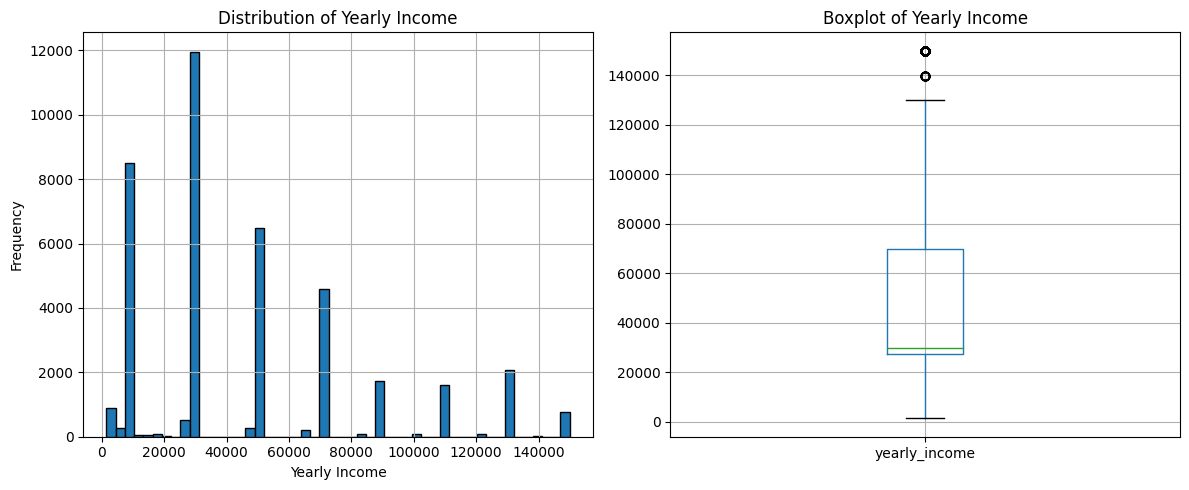

In [53]:
print(train['yearly_income'].describe())

# Outliers detection
Q1 = train['yearly_income'].quantile(0.25)
Q3 = train['yearly_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['yearly_income'] < lower_bound) | (train['yearly_income'] > upper_bound)]
print(f"\nNumber of outliers: {outliers.shape[0]}")
print("Sample outliers:")
print(outliers['yearly_income'].head())

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
train['yearly_income'].hist(bins=50, edgecolor='black')
plt.title("Distribution of Yearly Income")
plt.xlabel("Yearly Income")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
train.boxplot(column='yearly_income')
plt.title("Boxplot of Yearly Income")

plt.tight_layout()
plt.show()

Given the data from Brazil:

The average annual income in Brazil is much lower (around $8,000–$12,000 per year for the majority).

Even the upper classes rarely reach $150,000 per year.

Therefore, the value of $150,000 in this case is clearly an outlier.

In [54]:
threshold = 140000

# تحويل outliers لـ NaN
train.loc[train['yearly_income'] > threshold, 'yearly_income'] = np.nan

In [55]:
test.loc[test['yearly_income'] > threshold, 'yearly_income'] = np.nan

### impute

In [56]:
train['yearly_income'].isna().sum()

897

In [57]:
train['yearly_income'] = train['yearly_income'].fillna(train['yearly_income'].median())

In [58]:
# حساب median من train
median_income = train['yearly_income'].median()

# تعويض القيم المفقودة في train
train['yearly_income'] = train['yearly_income'].fillna(median_income)

# تعويض القيم المفقودة في test بنفس median من train
test['yearly_income'] = test['yearly_income'].fillna(median_income)


In [59]:
train['yearly_income'].isna().sum()

0

-  imputed with median
-  median is the most appropriate method here

### Summary
- handled data inconsistency
- anything above certain threshold = 140000 is considered outliers
- missing values and outliers were imputed with the median

## is_recyclable column

### clean

In [60]:
train['is_recyclable'].unique()

array(['recyclable', 'non recyclable', nan, 'yes', 'no', 'yes.', '(no)',
       'non recyclable.', 'no.', '(yes)', 'recyclable.', '(recyclable)'],
      dtype=object)

In [61]:
def clean_recyclable(df, col="is_recyclable"):
    df[col] = df[col].str.replace(r'[().]', '', regex=True)

    df[col] = df[col].replace({'recyclable': 'yes','non recyclable': 'no'})
    valid = ['yes', 'no']
    df.loc[~df[col].isin(valid), col] = np.nan

    return df[col]

In [62]:
train['is_recyclable'] = clean_recyclable(train, 'is_recyclable')

In [63]:
test['is_recyclable'] = clean_recyclable(test, 'is_recyclable')

In [64]:
train['is_recyclable'].value_counts()

is_recyclable
yes    22460
no     17919
Name: count, dtype: int64

In [65]:
train['is_recyclable'].isna().sum()

120

### impute

In [66]:
# impute with random values to keep the original ratio of the classes

def random_impute(series):
    series = series.copy()
    missing = series.isna()
    series.loc[missing] = np.random.choice(series.dropna(), size=missing.sum(), replace=True)
    return series

In [67]:
train['is_recyclable'] = random_impute(train['is_recyclable'])

In [68]:
# دالة التعويض العشوائي باستخدام قيم train فقط
def random_impute_from_train(series, train_series):
    series = series.copy()
    missing = series.isna()
    if missing.sum() > 0:
        series.loc[missing] = np.random.choice(train_series.dropna(),
                                               size=missing.sum(),
                                               replace=True)
    return series

# تعويض في train
train['is_recyclable'] = random_impute(train['is_recyclable'])

# تعويض في test باستخدام توزيع train
test['is_recyclable'] = random_impute_from_train(test['is_recyclable'], train['is_recyclable'])


In [69]:
train['is_recyclable'].isna().sum()

0

### Summary
- set the unique values to yes/no
- imputed with random value to keep the original ratio of the classes

## store_kind column

### clean

In [70]:
train['store_kind'].nunique()

116

In [71]:
train['store_kind'].unique()[:50]

array(['deluxe', 'supermarket', nan, 'delux3', '$upermarket', '_deluxe',
       'de1uxe_', 'deluxe_', 'gourm3t', 'gourmet', 'supermarket_',
       'mid-slze', 'small grocery', 'd3luxe', 'supermerket', 'daluxe',
       'supermarke7', 'mid-size', 'gourme7', 'deiuxe', '5upermarket',
       'suparmarket', 'small  grocery', 'deluxa', 'de1uxe', '_delux3',
       'mid-5ize', 'gourmat', '_supermarket', 'g0urmet', 'supermarkat',
       'mid-$ize', 'gourmet_', 'mid-s1ze', 'small grucery', 'superm@rket',
       'sup3rmarket', '_5upermarket', 'superm4rket', 'mid-siza',
       '_gourmet', 'small \tgrocery', 'supermark3t', '_small grocery',
       'supermark3t_', 'supermarkat_', '_supermark3t', '_supermarke7',
       '_mid-size', 'guurmet'], dtype=object)

- Match the values to unique values

In [72]:
def clean_store_kind(df, col):
    
    from thefuzz import process
    kinds = ['deluxe', 'supermarket', 'gourmet', 'mid size', 'small grocery']

    for kind in kinds:
        matches = process.extract(kind, df[col].unique(), limit= len(df[col].unique()))
        for i in matches:
            if i[1] >= 80:
                df.loc[df[col] == i[0], col] = kind
                
    return df[col]

In [73]:
train['store_kind'] = clean_store_kind(train,'store_kind')

In [74]:
train['store_kind'].value_counts()

store_kind
supermarket      14883
deluxe           13112
gourmet           3726
mid size          1557
small grocery     1129
Name: count, dtype: int64

In [75]:
train['store_kind'].isna().sum()

6092

In [76]:
test['store_kind'] = clean_store_kind(test,'store_kind')

### impute

Best methods:
- If the deficiency is slight, we compensate with moods.
- If the deficiency is moderate, we make it unknown.
- We can also make a KNN impute , but it's not the best option here.

In [77]:
# استبدال القيم المفقودة في store_kind بـ "unknown"
train["store_kind"] = train["store_kind"].fillna("unknown")

# نطبع توزيع القيم بعد التعديل
print(train["store_kind"].value_counts(dropna=False))


store_kind
supermarket      14883
deluxe           13112
unknown           6092
gourmet           3726
mid size          1557
small grocery     1129
Name: count, dtype: int64


In [78]:
# تعويض القيم المفقودة في test بنفس القيمة الثابتة
test["store_kind"] = test["store_kind"].fillna("unknown")

In [79]:
train['store_kind'].isna().sum()

0

In [80]:
# نعمل mapping للقيم
mapping = {
    "supermarket": "supermarket",
    "mid size": "supermarket",
    "deluxe": "premium",
    "gourmet": "premium",
    "small grocery": "small",
    "unknown": "unknown"
}

# نطبق المابنج
train["store_kind"] = train["store_kind"].map(mapping)

# نتأكد من التوزيع بعد الدمج
print(train["store_kind"].value_counts())


store_kind
premium        16838
supermarket    16440
unknown         6092
small           1129
Name: count, dtype: int64


In [81]:
test["store_kind"] = test["store_kind"].map(mapping)

### Summary
- match the values to unique values with fuzzy matching
- set the missing values to be "unknown"


## customer_city column

### clean

In [82]:
train[['customer_city','seller_city']]

,customer_city,seller_city
0,florianopolis,navegantes
1,abaete,betim
2,sao paulo,praie grande
3,sao paulo,sao paulo
4,capivari,sao paulo
...,...,...
41574,sao paulo,colombo
41577,sao paulo,rio de janeiro
41578,abaete,lbitinga
41579,recife,campinas


In [83]:
train[['customer_city', 'seller_city']].nunique()

customer_city    6645
seller_city      2887
dtype: int64

In [84]:
train['customer_city'].value_counts().head(20)

customer_city
sao paulo                5068
rio de janeiro           2255
belo horizonte            872
brasilia                  643
curitiba                  519
porto alegre              466
campinas                  431
salvador                  429
guarulhos                 384
sao bernardo do campo     295
santo andre               267
niteroi                   237
recife                    226
sao jose dos campos       225
fortaleza                 220
osasco                    216
goiania                   203
jundiai                   189
sorocaba                  189
florianopolis             179
Name: count, dtype: int64

In [85]:
# Keep only letters and spaces, remove numbers and symbols
train['customer_city'] = train['customer_city'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Remove extra spaces if any
train['customer_city'] = train['customer_city'].str.strip()
train['customer_city'] = train['customer_city'].str.replace(r'\s+', ' ', regex=True)


In [86]:
# Keep only letters and spaces, remove numbers and symbols
test['customer_city'] = test['customer_city'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Remove extra spaces if any
test['customer_city'] = test['customer_city'].str.strip()
test['customer_city'] = test['customer_city'].str.replace(r'\s+', ' ', regex=True)


In [87]:
# Count null values in customer_city
null_count = train['customer_city'].isnull().sum()

print("Number of null values in customer_city:", null_count)


Number of null values in customer_city: 107


### impute

In [88]:
# impute with random values to keep the original ratio of the classes
train['customer_city'] = random_impute(train['customer_city'])

In [89]:
# Impute in test set with random sampling from existing values
test['customer_city'] = random_impute(test['customer_city'])


In [90]:
# Count null values in customer_city
null_count = train['customer_city'].isnull().sum()

print("Number of null values in customer_city:", null_count)

Number of null values in customer_city: 0


In [91]:
train['customer_city'].nunique()

5718

In [92]:
# تحويل القيم لنصوص والتعامل مع القيم الفارغة
train['customer_city'] = train['customer_city'].fillna("").astype(str)

unique_seller_cities = train['customer_city'].unique()
THRESHOLD = 85  # نفس الفكرة من الـ customer_city

# القيم المرجعية: أكتر المدن تكرارًا (optional: لو عندك قائمة محددة)
# هنا نستخدم كل القيم الفريدة عشان نقارن بيها
seller_city_map = {}

for city in unique_seller_cities:
    if city in seller_city_map:
        continue
    matches = process.extract(city, unique_seller_cities, scorer=fuzz.ratio, limit=None)
    for match_tuple in matches:
        if len(match_tuple) == 3:
            match, score, _ = match_tuple
        else:
            match, score = match_tuple
        if score >= THRESHOLD:
            seller_city_map[match] = city

# تطبيق الخريطة باستخدام get عشان القيم اللي مش موجودة تفضل كما هي
train['customer_city'] = train['customer_city'].apply(lambda x: seller_city_map.get(x, x))

# عرض عدد القيم الفريدة بعد التنظيف
print("Unique seller cities after cleaning:", train['customer_city'].nunique())


Unique seller cities after cleaning: 2946


In [93]:
# تحويل القيم لنصوص والتعامل مع القيم الفارغة
test['customer_city'] = test['customer_city'].fillna("").astype(str)

# تطبيق نفس الخريطة المستخرجة من train
test['customer_city'] = test['customer_city'].apply(lambda x: seller_city_map.get(x, x))



In [94]:
# Get the 2500 least frequent values
least_2500 = train['customer_city'].value_counts().sort_values().head(2400)

print(least_2500)


customer_city
data missing                1
btuvera                     1
jacinto                     1
pio xii                     1
ube                         1
                           ..
faxinal                     9
santa cruz das palmeiras    9
guapimirim                  9
adrianopolis                9
castro                      9
Name: count, Length: 2400, dtype: int64


**More than 2400 cities occur less than 10 times, which is a very small frequency, so they were replaced with 'other'.**



In [95]:

# Count occurrences of each city
city_counts = train['customer_city'].value_counts()

# Find cities with less than 10 occurrences
rare_cities = city_counts[city_counts < 10].index

# Replace them with 'other'
train['customer_city'] = train['customer_city'].replace(rare_cities, 'other')


In [96]:
# Count occurrences of each city in train
city_counts = train['customer_city'].value_counts()

# Find rare cities (less than 10 occurrences in train)
rare_cities = city_counts[city_counts < 10].index

# Replace them with 'other' in train
train['customer_city'] = train['customer_city'].replace(rare_cities, 'other')

# Apply the SAME mapping on test (without recalculating)
test['customer_city'] = test['customer_city'].replace(rare_cities, 'other')



In [97]:
 print("Unique values:", train['customer_city'].nunique())

Unique values: 545


This is the lowest number I can reach

In [98]:
train['customer_city'].value_counts().head(20)

customer_city
other                    6792
sao paulo                6017
rio da janeiro           2774
belo horizonte           1112
brasiiia                  696
curitiba                  627
porto alegre              594
campinas                  516
salvedor                  461
guarulhus                 427
sao bernardo do campo     359
santo andre               326
fortaleza                 273
goiania                   263
nieroi                    254
saopauio                  253
osasco                    246
sojosedoscampos           244
recife                    234
florianopolis             232
Name: count, dtype: int64

- Removing these columns is not a good idea at all, as the location has an impact on the cost (transportation costs/taxes/location).
- I will do a targeted/freq encoding for this column.

### Summary
- match the cities with fuzzy matching
- set the least frequent cities (less than 10 records) to be "other"
- imputed with random chioce as is_recyclable

## seller_city column

### clean

In [99]:
train['seller_city'].nunique()

2887

In [100]:
# Keep only letters and spaces, remove numbers and symbols
train['seller_city'] = train['seller_city'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Remove extra spaces if any
train['seller_city'] = train['seller_city'].str.strip()
train['seller_city'] = train['seller_city'].str.replace(r'\s+', ' ', regex=True)

In [101]:
# Keep only letters and spaces, remove numbers and symbols
test['seller_city'] = test['seller_city'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Remove extra spaces if any
test['seller_city'] = test['seller_city'].str.strip()
test['seller_city'] = test['seller_city'].str.replace(r'\s+', ' ', regex=True)


In [102]:
train['seller_city'].nunique()

2162

In [103]:
# Count null values in seller_city
null_count = train['seller_city'].isnull().sum()

print("Number of null values in seller_city:", null_count)

Number of null values in seller_city: 403


In [104]:
# impute with random values to keep the original ratio of the classes
train['seller_city'] = random_impute(train['seller_city'])

In [105]:
import numpy as np

# indices اللي فيها NaN
missing_idx = test['seller_city'].isna()

# تعويض القيم المفقودة فقط
test.loc[missing_idx, 'seller_city'] = np.random.choice(
    train['seller_city'].dropna(),
    size=missing_idx.sum(),
    replace=True
)


In [106]:
train['seller_city'].isnull().sum()

0

### impute

In [107]:
# تحويل القيم لنصوص والتعامل مع القيم الفارغة
train['seller_city'] = train['seller_city'].fillna("").astype(str)

unique_seller_cities = train['seller_city'].unique()
THRESHOLD = 85  # نفس الفكرة من الـ customer_city

# القيم المرجعية: أكتر المدن تكرارًا (optional: لو عندك قائمة محددة)
# هنا نستخدم كل القيم الفريدة عشان نقارن بيها
seller_city_map = {}

for city in unique_seller_cities:
    if city in seller_city_map:
        continue
    matches = process.extract(city, unique_seller_cities, scorer=fuzz.ratio, limit=None)
    for match_tuple in matches:
        if len(match_tuple) == 3:
            match, score, _ = match_tuple
        else:
            match, score = match_tuple
        if score >= THRESHOLD:
            seller_city_map[match] = city

# تطبيق الخريطة باستخدام get عشان القيم اللي مش موجودة تفضل كما هي
train['seller_city'] = train['seller_city'].apply(lambda x: seller_city_map.get(x, x))

# عرض عدد القيم الفريدة بعد التنظيف
print("Unique seller cities after cleaning:", train['seller_city'].nunique())



Unique seller cities after cleaning: 655


In [108]:
# تحويل القيم لنصوص والتعامل مع القيم الفارغة
test['seller_city'] = test['seller_city'].fillna("").astype(str)

# تطبيق نفس الخريطة المستخرجة من train
test['seller_city'] = test['seller_city'].apply(lambda x: seller_city_map.get(x, x))

In [109]:
train['seller_city'].value_counts().head(20)

seller_city
sao paulo                8667
ibitinga                 2403
santo andre              1101
belo horizonte           1024
curitibe                  968
rio de janairo            909
rlberao preto             867
guarulhos                 851
maringa                   761
sao jose do rio preto     742
piracicaba                646
itaquaquecetuba           502
cempinas                  463
guariba                   461
praia gramde              450
sao bernardo do campo     443
salto                     425
campo limpo paulista      423
ao paluo                  399
limeira                   351
Name: count, dtype: int64

In [110]:
# Get the 500 least frequent values
least_500 = train['seller_city'].value_counts().sort_values().head(500)

print(least_500)


seller_city
chapeco               1
santa cruz do sul     1
vera kruz             1
ararangua             1
guaratingueta         1
                     ..
tres rios            31
mogi mirim           31
ponte nova           31
taubate              32
seo ludgero          32
Name: count, Length: 500, dtype: int64


In [111]:
# Count occurrences of each city
s_city_counts = train['seller_city'].value_counts()

# Find cities with less than 10 occurrences
s_rare_cities = s_city_counts[s_city_counts < 10].index

# Replace them with 'other'
train['seller_city'] = train['seller_city'].replace(s_rare_cities, 'other')

In [112]:
# Count occurrences of each city in train
s_city_counts = train['seller_city'].value_counts()

# Find rare cities (less than 10 occurrences in train)
s_rare_cities = s_city_counts[s_city_counts < 10].index

# Replace them with 'other' in train
train['seller_city'] = train['seller_city'].replace(s_rare_cities, 'other')

# Apply the SAME mapping on test (without recalculating)
test['seller_city'] = test['seller_city'].replace(s_rare_cities, 'other')



In [113]:
print("Unique values:", train['customer_city'].nunique())

Unique values: 545


In [114]:
# نجيب متوسط الكوست لكل مدينة
#city_encoding = train.groupby("seller_city")["cost"].mean()

# نعمل مابنج للعمود
#train["seller_city_encoded"] = train["seller_city"].map(city_encoding)

# نعمل راوند لـ 3 أرقام عشرية
#train["seller_city_encoded"] = train["seller_city_encoded"].round(3)



In [115]:

# لو عايزة تشيلي العمود الأصلي
# train = train.drop(columns=["seller_city"])


In [116]:
#train.head()

### summary
- same process as customer_city

## customer_state column

### clean

In [117]:
train[['customer_state','seller_state']].nunique()

customer_state    188
seller_state      101
dtype: int64

In [118]:
train[['customer_state','seller_state']] = train[['customer_state','seller_state']].apply(lambda col: col.str.upper().str.strip())
train[['customer_state','seller_state']] = train[['customer_state','seller_state']].apply(lambda col: col.str.replace(r'[()._]', '', regex=True).str.strip())

In [119]:
# تحويل القيم لحروف كبيرة وإزالة المسافات الزائدة
test[['customer_state','seller_state']] = test[['customer_state','seller_state']].apply(lambda col: col.str.upper().str.strip())

# إزالة الرموز [()._] وإعادة trim
test[['customer_state','seller_state']] = test[['customer_state','seller_state']].apply(lambda col: col.str.replace(r'[()._]', '', regex=True).str.strip())

In [120]:
train[['customer_state','seller_state']].nunique()

customer_state    84
seller_state      52
dtype: int64

In [121]:
train['customer_state'].value_counts().head(10)

customer_state
SP    14895
RJ     5177
MG     4640
PR     2054
RS     1951
BA     1231
SC     1114
5P     1060
$P     1014
DF      820
Name: count, dtype: int64

In [122]:
train['customer_state'].unique()

array(['5C', 'MG', 'SP', '5P', 'RJ', 'CE', 'PB', 'RS', 'RÑ', 'SC', 'MS',
       'DF', 'SK', 'PR', 'MA', 'BA', 'ES', 'C3', 'GO', 'AM', 'PI', 'PE',
       '$P', 'TO', 'GU', 'PA', 'M7', 'E5', 'RN', 'E$', 'AL', 'P4', 'KE',
       'MT', '$C', 'B4', 'SÇ', 'P3', 'R5', '3S', 'RO', 'ÇE', 'M$', 'CA',
       'B@', 'R$', 'RU', 'SE', nan, 'M5', 'AC', '$E', 'AK', 'M@', 'BE',
       '7O', 'PL', 'AS', 'P@', 'AP', 'G0', 'RR', 'RM', '4L', 'EL', 'M4',
       'P1', 'ME', '@L', 'A1', 'SA', 'TU', 'EM', '4P', '4M', '4C', 'R0',
       'AI', 'T0', '5E', 'EP', '@P', '@M', 'AÇ', 'S3'], dtype=object)

### impute

In [123]:
train['customer_state'].isna().sum()

115

In [124]:
# دكشنري للتحويلات الرمزية
replace_dict = {
    'Ñ': 'N',
    'Ç': 'C',
    '@': 'A',
    '$': 'S',
    '5': 'S',
    '3': 'E',
    '0': 'O',
    '4': 'A',
    '7': 'T',
    '1': 'L',
}

# دالة التطبيع الشامل
def normalize_state(val):
    if pd.isna(val):
        return np.nan
    val = str(val).upper().strip()             # Uppercase و إزالة المسافات
    if val in ['', 'NAN']:
        return np.nan
    val = val.replace('_', '')                 # إزالة _
    val = val.replace('\n', '')                # إزالة أسطر جديدة
    val = re.sub(r'[\.\?\(\)]', '', val)      # إزالة . ? ( )
    val = val.replace('--', '')                # إزالة --
    val = val.replace('...', '')               # إزالة ...
    for old, new in replace_dict.items():      # استبدال الرموز والحروف الخاصة
        val = val.replace(old, new)
    return val

# تطبيق التطبيع
train['customer_state'] = train['customer_state'].apply(normalize_state)

# حساب المود بعد التطبيع
mode_value = train['customer_state'].mode()[0]

# استبدال NaN بالمود
train['customer_state'] = train['customer_state'].fillna(mode_value)

# عرض القيم الفريدة بعد كل التنظيف والتعبئة
print(train['customer_state'].unique())


['SC' 'MG' 'SP' 'RJ' 'CE' 'PB' 'RS' 'RN' 'MS' 'DF' 'SK' 'PR' 'MA' 'BA'
 'ES' 'GO' 'AM' 'PI' 'PE' 'TO' 'GU' 'PA' 'MT' 'AL' 'KE' 'RO' 'CA' 'RU'
 'SE' 'AC' 'AK' 'BE' 'PL' 'AS' 'AP' 'RR' 'RM' 'EL' 'ME' 'SA' 'TU' 'EM'
 'AI' 'EP']


In [125]:
# تطبيق التطبيع على test
test['customer_state'] = test['customer_state'].apply(normalize_state)

# استبدال NaN بنفس المود من train
test['customer_state'] = test['customer_state'].fillna(mode_value)



In [126]:
train['customer_state'].nunique()

44

In [127]:
train['customer_state'].isna().sum()

0

In [128]:
# Get the 10 least frequent values
least_10 = train['customer_state'].value_counts().sort_values().head(10)

print(least_10)


customer_state
EP     1
AK     1
TU     3
EM     4
EL     5
SA     6
RU     7
AI     9
RM     9
ME    15
Name: count, dtype: int64


**about 10 states occur less than 10 times, which is a very small frequency, so they were replaced with 'other'.**

In [129]:
# Count occurrences of each city
c_city_counts = train['customer_state'].value_counts()

# Find cities with less than 10 occurrences
c_rare_cities = c_city_counts[c_city_counts < 10].index

# Replace them with 'other'
train['customer_state'] = train['customer_state'].replace(c_rare_cities, 'other')

In [130]:
# Count occurrences of each state in train
c_city_counts = train['customer_state'].value_counts()

# Find rare states (less than 10 occurrences in train)
c_rare_cities = c_city_counts[c_city_counts < 10].index

# Replace them with 'other' in train
train['customer_state'] = train['customer_state'].replace(c_rare_cities, 'other')

# Apply the SAME mapping on test (without recalculating)
test['customer_state'] = test['customer_state'].replace(c_rare_cities, 'other')

In [131]:
print("Unique values:", train['customer_state'].nunique())

Unique values: 36


### Summary
- mapped special characters to the original characters
- imputed with the mode
- set the least frequent states (less than 10 records) to be "other"

## seller_state column

### clean & impute

In [132]:
train['seller_state'].unique()[:20]

array(['SC', 'MG', '$P', 'SP', 'RJ', 'PR', '5P', 'BA', 'RS', 'DF', nan,
       'R$', '$C', 'GO', 'SÇ', 'B@', 'MT', 'PE', 'R5', 'M4'], dtype=object)

In [133]:
# دكشنري للتحويلات الرمزية والأرقام للحروف المكافئة
replace_dict = {
    'Ñ': 'N',
    'Ç': 'C',
    '@': 'A',
    '$': 'S',
    '5': 'S',
    '3': 'E',
    '0': 'O',
    '4': 'A',
    '7': 'T',
    '1': 'L',
}

# دالة التطبيع الشامل
def normalize_state(val):
    if pd.isna(val):
        return np.nan
    val = str(val).upper().strip()             # Uppercase و إزالة المسافات
    if val in ['', 'NAN']:
        return np.nan
    val = val.replace('_', '')                 # إزالة _
    val = val.replace('\n', '')                # إزالة أسطر جديدة
    val = re.sub(r'[\.\?\(\)]', '', val)      # إزالة . ? ( )
    val = val.replace('--', '')                # إزالة --
    val = val.replace('...', '')               # إزالة ...
    for old, new in replace_dict.items():      # استبدال الرموز والأرقام
        val = val.replace(old, new)
    return val

# تطبيق التطبيع
train['seller_state'] = train['seller_state'].apply(normalize_state)

# حساب المود بعد التطبيع
mode_value = train['seller_state'].mode()[0]

# استبدال NaN بالمود
train['seller_state'] = train['seller_state'].fillna(mode_value)

# عرض القيم الفريدة بعد كل التنظيف والتعبئة
print(train['seller_state'].unique())


['SC' 'MG' 'SP' 'RJ' 'PR' 'BA' 'RS' 'DF' 'GO' 'MT' 'PE' 'MA' 'ES' 'AS'
 'RN' 'RO' 'SK' 'PB' 'MS' 'BE' 'PA' 'CE' 'GU' 'SE' 'AM' 'ME' 'CA' 'PI'
 'RU' 'KE']


In [134]:
# تطبيق التطبيع على test
test['seller_state'] = test['seller_state'].apply(normalize_state)

# استبدال NaN بنفس المود من train
test['seller_state'] = test['seller_state'].fillna(mode_value)



In [135]:
# Get the 10 least frequent values
least_10 = train['seller_state'].value_counts().sort_values().head(10)

print(least_10)

seller_state
KE     1
PI     1
RU     1
CA     3
AM     4
RO     4
SE     5
ME     6
BE    10
GU    12
Name: count, dtype: int64


**about 10 states occur less than 10 times, which is a very small frequency, so they were replaced with 'other'.**

In [136]:
# Count occurrences of each city
c_city_states = train['seller_state'].value_counts()

# Find cities with less than 10 occurrences
c_rare_states = c_city_states[c_city_states < 10].index

# Replace them with 'other'
train['seller_state'] = train['seller_state'].replace(c_rare_states, 'other')

In [137]:
# Count occurrences of each state in train
c_city_states = train['seller_state'].value_counts()

# Find rare states (less than 10 occurrences in train)
c_rare_states = c_city_states[c_city_states < 10].index

# Replace them with 'other' in train
train['seller_state'] = train['seller_state'].replace(c_rare_states, 'other')

# Apply the SAME mapping on test (without recalculating)
test['seller_state'] = test['seller_state'].replace(c_rare_states, 'other')



In [138]:
print("Unique values:", train['seller_state'].nunique())

Unique values: 23


### Summary
- same process as customer_state

## customer_lat, customer_lng, seller_lat, seller_lng columns

In [139]:
geo_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']

for col in geo_columns:
    unique_values = train[col].dropna().unique()
    print(f"\n--- {col.upper()} ---")
    print(f"Number of unique values: {len(unique_values)}")
    print("Sample unique values:", unique_values[:20])  # يعرض أول 20 قيمة فقط



--- CUSTOMER_LAT ---
Number of unique values: 15451
Sample unique values: ['amount: -27.591715047463765' '-19.16050583709177'
 'data: -23.50609758451153' '-23.665780780743223' '-23.0122137105142'
 '-22.382941116125448' '-22.93862838995325' '-23.82852167738724'
 'data: -21.79104335195045' '-22.74703919816495'
 'val: -19.652292291953287' '-19.862833868691293' '-23.560566359426364'
 '-19.83178058505065' '-23.453200132516344' '-23.1317637171793'
 '-19.50523742384614' '-23.56314574493621' '-23.604797426629368'
 '-3.749334515248173']

--- CUSTOMER_LNG ---
Number of unique values: 15497
Sample unique values: ['-48.506655980581606' '-45.45377571289521' '-46.73241237719997'
 '-46.6821276135092' '-47.52203973160603' '-46.94664125419024'
 '-43.36065293880199' '-46.814795982633896' '-46.56244368105504'
 '-47.34322030252755' '-44.056767929538886' 'data: -43.85726075973933'
 '-46.65761042867444' '-44.15214545360349' '-46.484469408993874'
 'data: -46.5835637149576' '-42.57176378313765' '-46.64661879

### clean

In [140]:
geo_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']

def extract_float(val):
    if pd.isna(val):
        return np.nan
    # البحث عن الرقم العشري داخل النص
    match = re.search(r"-?\d+\.\d+", str(val))
    if match:
        return float(match.group())
    return np.nan

# تطبيق الدالة على كل الأعمدة الجغرافية
for col in geo_columns:
    train[col] = train[col].apply(extract_float)

In [141]:
for col in geo_columns:
    test[col] = test[col].apply(extract_float)

In [142]:
geo_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']

for col in geo_columns:
    unique_values = train[col].dropna().unique()
    print(f"\n--- {col.upper()} ---")
    print(f"Number of unique values: {len(unique_values)}")
    print("Sample unique values:", unique_values[:20])  # يعرض أول 20 قيمة فقط


--- CUSTOMER_LAT ---
Number of unique values: 10833
Sample unique values: [-27.59171505 -19.16050584 -23.50609758 -23.66578078 -23.01221371
 -22.38294112 -22.93862839 -23.82852168 -21.79104335 -22.7470392
 -19.65229229 -19.86283387 -23.56056636 -19.83178059 -23.45320013
 -23.13176372 -19.50523742 -23.56314574 -23.60479743  -3.74933452]

--- CUSTOMER_LNG ---
Number of unique values: 10836
Sample unique values: [-48.50665598 -45.45377571 -46.73241238 -46.68212761 -47.52203973
 -46.94664125 -43.36065294 -46.81479598 -46.56244368 -47.3432203
 -44.05676793 -43.85726076 -46.65761043 -44.15214545 -46.48446941
 -46.58356371 -42.57176378 -46.6466188  -46.79999081 -38.52361938]

--- SELLER_LAT ---
Number of unique values: 1847
Sample unique values: [-26.85907968 -19.95866259 -24.02678676 -23.69289566 -23.53982403
 -21.76647685 -23.11277438 -23.51008199 -19.94187752 -22.54903336
 -22.26409357 -21.21594897 -23.55407943 -23.20706431 -22.73824151
 -25.46921399 -26.23309163 -21.76282507 -24.04895262

In [143]:
geo_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']

print("Null values:")
for col in geo_columns:
    print(f"{col}: {train[col].isna().sum()}")


# التحقق من النطاقات الصحيحة
train.loc[~train['customer_lat'].between(-90, 90), 'customer_lat'] = np.nan
train.loc[~train['seller_lat'].between(-90, 90), 'seller_lat'] = np.nan
train.loc[~train['customer_lng'].between(-180, 180), 'customer_lng'] = np.nan
train.loc[~train['seller_lng'].between(-180, 180), 'seller_lng'] = np.nan

# عرض عدد القيم المفقودة بعد التنظيف
print("Null values:")
for col in geo_columns:
    print(f"{col}: {train[col].isna().sum()}")

Null values:
customer_lat: 246
customer_lng: 236
seller_lat: 489
seller_lng: 482
Null values:
customer_lat: 246
customer_lng: 236
seller_lat: 489
seller_lng: 482


In [144]:
geo_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']

print("Null values before cleaning in test:")
for col in geo_columns:
    print(f"{col}: {test[col].isna().sum()}")

# التحقق من النطاقات الصحيحة في test
test.loc[~test['customer_lat'].between(-90, 90), 'customer_lat'] = np.nan
test.loc[~test['seller_lat'].between(-90, 90), 'seller_lat'] = np.nan
test.loc[~test['customer_lng'].between(-180, 180), 'customer_lng'] = np.nan
test.loc[~test['seller_lng'].between(-180, 180), 'seller_lng'] = np.nan

# عرض عدد القيم المفقودة بعد التنظيف
print("Null values after cleaning in test:")
for col in geo_columns:
    print(f"{col}: {test[col].isna().sum()}")


Null values before cleaning in test:
customer_lat: 110
customer_lng: 124
seller_lat: 253
seller_lng: 255
Null values after cleaning in test:
customer_lat: 110
customer_lng: 124
seller_lat: 253
seller_lng: 255


So there is no value outside the correct ranges.

In [145]:
def haversine_distance(lat1, lng1, lat2, lng2):
    # تحويل الدرجات إلى راديان
    lat1, lng1, lat2, lng2 = map(np.radians, [lat1, lng1, lat2, lng2])

    # الفروق
    dlat = lat2 - lat1
    dlng = lng2 - lng1

    # صيغة Haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # نصف قطر الأرض بالكيلومتر
    return c * r

# إنشاء عمود جديد للمسافة
train['distance_km'] = haversine_distance(
    train['customer_lat'], train['customer_lng'],
    train['seller_lat'], train['seller_lng']
)

# عرض بعض القيم للتحقق
print(train[['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng', 'distance_km']].head())
# تقريب القيم لثلاثة أرقام عشرية
train['distance_km'] = train['distance_km'].round(3)

   customer_lat  customer_lng  seller_lat  seller_lng  distance_km
0    -27.591715    -48.506656  -26.859080  -48.639536    82.517997
1    -19.160506    -45.453776  -19.958663  -44.198789   158.642029
2    -23.506098    -46.732412  -24.026787  -46.493049    62.813415
3    -23.665781    -46.682128  -23.692896  -46.680210     3.021351
4    -23.012214    -47.522040  -23.539824  -46.434679   125.610034


In [146]:
test['distance_km'] = haversine_distance(
    test['customer_lat'], test['customer_lng'],
    test['seller_lat'], test['seller_lng']
)

# تقريب القيم لثلاثة أرقام عشرية
test['distance_km'] = test['distance_km'].round(3)

In [147]:
train = train.drop(columns=['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng'])

In [148]:
test = test.drop(columns=['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng'])

In [149]:
train.head(5)

,id,yearly_income,gross_weight,net_weight,is_recyclable,additional_features_in_market,promotion_name,store_kind,store_sales,store_cost,grocery_area,frozen_area,meat_area,cost,customer_city,customer_state,seller_city,seller_state,review_score,store_area,package_weight,status,gender,children,education,work,product,department,brand,distance_km
0,0,10000.0,28.1997,-26.6008,yes,"['video store', 'florist', 'ready food', 'coff...",dimes off,premium,8.76 millions,4.2924 millions,2037.64,481.98,323,602.7575,florianopolis,SC,navegantes,SC,5.0,NaN,NaN,single,female,4.0,bachelors,professional,cleaning supplies,household,red wing,82.518
1,1,46200.0,16.571,14.972,no,NaN,budget bargains,supermarket,$6.36 millions,1.9716 millions,2049.72,457.36,NaN,708.665,abaete,MG,betim,MG,4.0,NaN,NaN,single,female,3.0,bachelors,management,snack foods,snack foods,nationeel,158.642
2,2,30000.0,-28.6358,data: 27.1822,yes,['florist'],shelf emptiers,supermarket,10.86 millions,4.4526 millions,1322.21,523.32,348.85,val: 564.2647,sao paulo,SP,other,SP,5.0,NaN,NaN,married,male,2.0,high school,manual,magazines,periodicals,excel,62.813
3,3,30000.0,14.2161,amount: 11.2944,yes,['coffee bar'],savings galore,unknown,1.98 millions,0.6732 millions,NaN,440.92,293.95,724.5119,sao paulo,SP,sao paulo,SP,1.0,NaN,NaN,single,female,3.0,partial college,professional,dairy,dairy,carlson,3.021
4,4,50000.0,12.6172,9.71,no,"['bar for salad', 'ready food', 'coffee bar', ...",sale winners,premium,"11.56 ,000,000illions",4.9708 millions,1872.19,593.93,395.95,519.7574,capivari,SP,sao paulo,SP,5.0,NaN,NaN,married,female,5.0,bachelors,professional,vegetables,produce,hermanos,125.610


### outliers

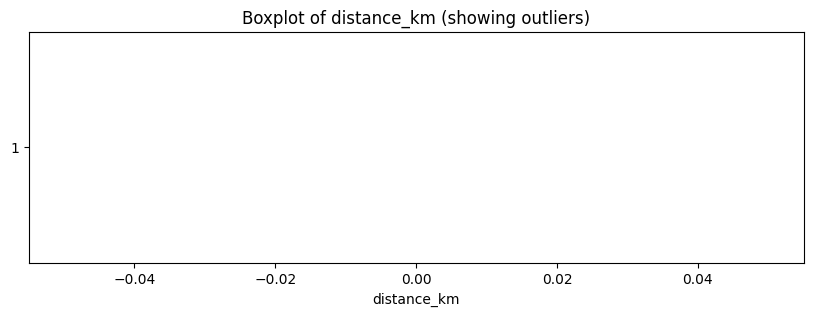

Number of outliers: 3133
upper_bound: 1742.3515000000002


In [150]:
col = 'distance_km'  # غيره باسم العمود بتاعك

# حساب IQR والحدود
Q1 = train[col].quantile(0.25)
Q3 = train[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# فصل القيم الطبيعية عن الأوتلايرز
normal_values = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)][col]
outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]

# =========================
# 2. Boxplot for outliers
# =========================
plt.figure(figsize=(10,3))
plt.boxplot(train[col], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title(f'Boxplot of {col} (showing outliers)')
plt.xlabel(col)
plt.show()

print(f"Number of outliers: {len(outliers)}")
print(f"upper_bound: {upper_bound}")


The two most distant points in Brazil, geographically speaking, are:

From the northeast (near the city of Caburaí in Roraima state)

To the south (near the city of Arroio Chuí in Rio Grande do Sul state)

The distance between them is approximately 4,400–4,500 km.

In [151]:
upper_bound = 1736.955625  # الحد اللي حسبناه

# اختيار الأوتلايرز
outliers_df = train[train['distance_km'] > upper_bound][
    ['customer_city', 'seller_city', 'distance_km']
].sort_values(by='distance_km', ascending=False)

# عرض أول 10 بس
print(outliers_df.head(10))


      customer_city           seller_city  distance_km
37095         other         caxias do sul     8736.948
7486          other         riberao pretu     8025.983
13799         other              saopauio     7963.160
26807     boa vista  sao jose dos pinhais     3385.341
12301     boa vista              curitibe     3378.706
29452     boa vista           santo andre     3322.719
35501     boa vista                suzano     3319.497
29480     boa vista             sao paulo     3312.671
38232     boa vista             sao paulo     3312.671
4203      boa vista             sao paulo     3311.087


I found that these extreme values ​​are close to the actual distance between these cities, and anything greater than 4000 is illogical.

In [152]:
train = train[train['distance_km'] <= 4000]

### Summary
- extract the number for this columns
- extract new feature 'distance_km' the distance between customer and seller location
- dropped the original column
- consider anything above a threshold outliers and removed it

## promotion_name column

### clean

In [153]:
train['promotion_name'] = train['promotion_name'].str.replace(r'[().]', '', regex=True).str.strip()

In [154]:
test['promotion_name'] = test['promotion_name'].str.replace(r'[().]', '', regex=True).str.strip()

In [155]:
train['promotion_name'].unique()

array(['dimes off', 'budget bargains', 'shelf emptiers', 'savings galore',
       'sale winners', 'weekend discount', 'price winners',
       'shelf clearing days', 'big time discounts',
       'lottery cash registerion', 'pick your savings', nan,
       'super savers', 'two day sale', 'sale sale sale', 'wallet savers',
       'money savers', 'save price', 'best savings', 'big time saving',
       'bag stuffer', 'save it sale', 'dollar days', 'discount frenzy',
       'sales days', 'sale : double down', 'coupon spectacular',
       'three for one', 'super duper savers', 'gld', 'go for it',
       'mystery sale', 'one day sale', 'i cant believe it sale',
       'you save days', 'double your savings', 'full free', 'saving days',
       'roller savings high', 'green light special', 'price slashers',
       'price cutters', 'two for one', 'promo big', 'price destroyers',
       'tip top savings', 'best price savers', 'super wallet savers',
       'price smashers', 'fantastic discounts'], d

In [156]:
train['promotion_name'].nunique()

49

In [157]:
# عرض كل القيم اليونيك وعدد مرات تكرارها
train['promotion_name'].value_counts()

promotion_name
save price                  1311
weekend discount            1311
two day sale                1289
price winners               1167
super savers                1115
save it sale                1090
super duper savers          1081
roller savings high         1007
one day sale                1005
sale : double down           991
gld                          974
price slashers               943
shelf clearing days          931
full free                    901
lottery cash registerion     852
go for it                    829
two for one                  814
money savers                 796
big time discounts           782
price destroyers             753
budget bargains              735
saving days                  729
discount frenzy              674
best price savers            667
dimes off                    647
savings galore               607
promo big                    607
sales days                   599
you save days                598
price cutters               

In [158]:
train['promotion_name'].isna().sum()

5997

### impute

In [159]:
# 2. استبدال NaN بـ "No Promo"
train['promotion_name'] = train['promotion_name'].fillna('No Promo')

In [160]:
test['promotion_name'] = test['promotion_name'].fillna('No Promo')

### Summary
- missing values were set to "No Promo"

## review_score column

In [161]:
train['review_score'].unique()

array(['5.0', '4.0', '1.0', 'measure: 5.0', '5.0/5.0', 'rating: 1.0',
       '3.0', '2.0', '1.0/5.0', 'val: 5.0', 'data: 1.0', 'amount: 1.0',
       nan, 'amount: 2.0', 'data: 2.0', '100%', 'amount: 5.0',
       'data: 5.0', 'rating: 4.0', 'amount: 3.0', 'val: 4.0',
       'amount: 4.0', 'measure: 2.0', 'val: 1.0', '8.0/10', '5.0 stars',
       'measure: 4.0', '10.0/10', 'data: 4.0', '60%', 'measure: 1.0',
       '1.0 stars', 'val: 3.0', '20%', 'measure: 3.0', 'rating: 5.0',
       'val: 2.0', '4.0 stars', '2.0/5.0', '3.0/5.0', '3.0 stars',
       '4.0/5.0', 'data: 3.0', 'data: nan', 'measure: nan', '80%',
       '2.0 stars', '2.0/10', 'rating: 3.0', '6.0/10', '40%', 'val: nan',
       'amount: nan', '4.0/10', 'rating: 2.0', '(3.0)', '(4.0)', '(5.0)',
       '4.0.', '5.0.', 'data: 5.0.', '3.0.', '2.0.', '1.0.',
       'amount: 5.0.', '(data: 4.0)'], dtype=object)

### clean

In [162]:
def clean_score(val):
    if pd.isna(val):
        return np.nan

    s = str(val).lower().strip()
    s = re.sub(r'(val:|measure:|rating:|amount:|data:|stars|/5\.0)', '', s)
    s = re.sub(r'[()]', '', s).strip()

    if s.endswith("%"):
        num = float(s.replace("%", ""))
        return round(num *0.05, 1)

    if "/10" in s:
        num = float(s.split("/")[0])
        return num *0.5

    match = re.match(r"(\d+(\.\d+)?)\.?$", s)
    if match:
        return float(match.group(1))

    return np.nan

train["review_score"] = train["review_score"].apply(clean_score)

In [163]:
test["review_score"] = test["review_score"].apply(clean_score)

In [164]:
train["review_score"].isna().sum()

415

In [165]:
train["review_score"].value_counts()

review_score
5.0    22292
4.0     7733
1.0     4448
3.0     3348
2.0     1290
Name: count, dtype: int64

### impute

In [166]:
counts = train['review_score'].value_counts(dropna=True)

choices = counts.index.to_list()
probs = (counts / counts.sum()).to_list()

missing_idx = train[train['review_score'].isna()].index

train.loc[missing_idx, 'review_score'] = np.random.choice(choices, size=len(missing_idx), p=probs)

In [167]:
# القيم الممكنة واحتمالاتها من train
counts = train['review_score'].value_counts(dropna=True)
choices = counts.index.to_list()
probs = (counts / counts.sum()).to_list()

# العثور على القيم المفقودة في test
missing_idx = test[test['review_score'].isna()].index

# تعويض القيم المفقودة في test باستخدام distribution train
test.loc[missing_idx, 'review_score'] = np.random.choice(choices, size=len(missing_idx), p=probs)


In [168]:
train["review_score"].isna().sum()

0

In [169]:
train["review_score"].value_counts()

review_score
5.0    22537
4.0     7799
1.0     4506
3.0     3377
2.0     1307
Name: count, dtype: int64

### Summary
- adjust all values to be a score out of 5
- handle values % and /10
- imputed with random choice 

## gross_weight, net_weight, Package_weight columns

problems:

*   random strings
*   negative numbers
*   mixed data types (float, int, object)
*   mixed measuring units (grams, kg, oz, lbs)



In [170]:
cols = ["gross_weight", "net_weight", 'package_weight']

for col in cols:
    print(f"Unique values in {col}:")
    print(train[col].unique()[:50])
    print("-" * 50)


Unique values in gross_weight:
['28.1997' '16.571' '-28.6358' '14.2161' '12.6172' '15.4081' '17.1524'
 '17.2978' '25.1472' '14.972' '24.7111' '11.1054' '27.4729' '22.8214'
 '19.9142' '10.335' 'data: 22.9668' '15.6988' '22.676' '-23.1121'
 '-12.2247' 'val: 27.1822' '15.1174' '20.4957' nan '11.5706' '17.007'
 '27.1822' '-22.8214' 'data: 14.4196' '10.7275' 'val: 14.1144'
 'val: 10.2769' '20.0596' '29.7987' '65.05 lbs' '8.9251' '9.9862'
 '12.3701' '30.9615' '17.5885' '19.4781' '10.0879' '31.3976' '-10.6548'
 '10.45 kg' 'val: 14.6813' 'val: 28.1997' '12.7771' '31.543']
--------------------------------------------------
Unique values in net_weight:
['-26.6008' '14.972' 'data: 27.1822' 'amount: 11.2944' '9.71' '13.9545'
 '14245.20 grams' '-14.376' '23.5482' '12.0648' '21.8039' '8.1837'
 '24.4204' 'amount: 21.2225' '15.4081' '7.4279' '21.5132' '12.7916'
 '21.2225' '20.0596' '10.7566' '25.7286' '12.1956' 'measure: 13.6492'
 'measure: 15.4081' '17.5885' '20.3503' '12.5009' '14.376' '8.6634'
 '12

### clean

In [171]:
def extract_numbers_in_kg(x):
    if pd.isna(x):
        return np.nan

    s = str(x).strip().lower()

    # شيل التكست الزيادة
    s = re.sub(r"(amount:|val:|data:|measure:)", "", s).strip()

    # استخرج الرقم
    match = re.search(r"[-+]?\d*\.?\d+", s)
    if not match:
        return np.nan
    value = abs(float(match.group()))  # خلي الرقم موجب

    # تحويل للوحدة kg
    if "kg" in s:
        return value
    if "grams" in s or "gram" in s or re.search(r"\bg\b", s):
        return value / 1000
    if "lbs" in s or "lb" in s:
        return value * 0.453592
    if "oz" in s:
        return value * 0.0283495
    else:
        return value   # نفترض أنه kg لو مفيش وحدة واضحة

# الأعمدة المستهدفة
weights = ["gross_weight", "net_weight", 'package_weight']

for col in weights:
    train[col] = train[col].apply(extract_numbers_in_kg)
    train[col] = train[col].abs()

# تأكد من النتيجة
print(train[weights].head())


   gross_weight  net_weight  package_weight
0       28.1997     26.6008             NaN
1       16.5710     14.9720             NaN
2       28.6358     27.1822             NaN
3       14.2161     11.2944             NaN
4       12.6172      9.7100             NaN


In [172]:
train[weights]

,gross_weight,net_weight,package_weight
0,28.1997,26.6008,NaN
1,16.5710,14.9720,NaN
2,28.6358,27.1822,NaN
3,14.2161,11.2944,NaN
4,12.6172,9.7100,NaN
...,...,...,...
41574,27.0368,24.1296,NaN
41577,16.7163,12.3555,NaN
41578,19.7689,NaN,NaN
41579,26.3100,23.4028,NaN


In [173]:
cols = ["gross_weight", "net_weight", 'package_weight']

for col in cols:
    print(f"{col} → {train[col].isna().sum()} missing values")

gross_weight → 4698 missing values
net_weight → 4644 missing values
package_weight → 32206 missing values


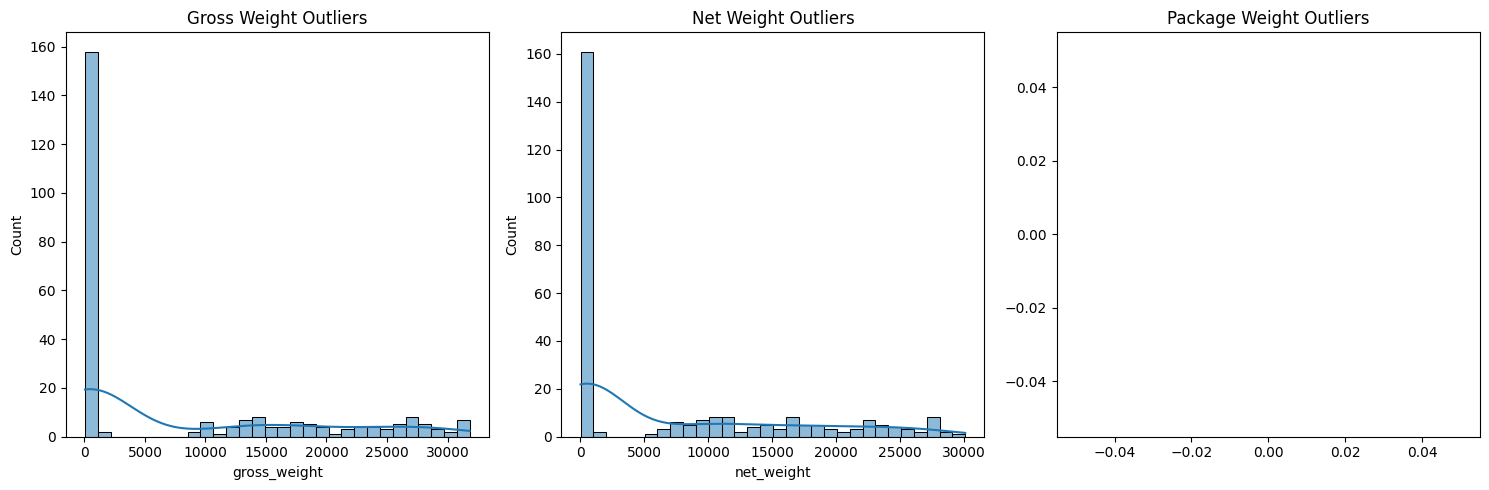

In [174]:

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# اكتشاف الأوتلايرز
gross_outliers = detect_outliers_iqr(train, "gross_weight")
net_outliers = detect_outliers_iqr(train, "net_weight")
package_outliers = detect_outliers_iqr(train, "package_weight")

# عرض الرسومات جنب بعض
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(gross_outliers["gross_weight"], bins=30, kde=True)
plt.title("Gross Weight Outliers")

plt.subplot(1,3,2)
sns.histplot(net_outliers["net_weight"], bins=30, kde=True)
plt.title("Net Weight Outliers")

plt.subplot(1,3,3)
sns.histplot(package_outliers["package_weight"], bins=30, kde=True)
plt.title("Package Weight Outliers")

plt.tight_layout()
plt.show()



In [175]:
cols = ["gross_weight", "net_weight", 'package_weight']
train[cols].isna().sum()

gross_weight       4698
net_weight         4644
package_weight    32206
dtype: int64

In [176]:
train['package_weight'].describe()

count    7320.000000
mean        2.875884
std         1.076146
min         0.100000
25%         1.599000
50%         2.907200
75%         3.052600
max         4.510000
Name: package_weight, dtype: float64

In [177]:
def fill_package_with_range(df, gross_outliers, net_outliers):

    df = df.copy()

    # Define valid range of package weights from data
    min_pkg = df["package_weight"].min()
    max_pkg = df["package_weight"].max()

    bad_gross = set(gross_outliers.index)
    bad_net = set(net_outliers.index)

    # Mask for safe filling
    mask = (
        df["package_weight"].isna()
        & df["gross_weight"].notna()
        & df["net_weight"].notna()
        & ~df.index.isin(bad_gross)
        & ~df.index.isin(bad_net)
    )

    # Candidate values
    candidate = df.loc[mask, "gross_weight"] - df.loc[mask, "net_weight"]

    # Keep only values inside the permitted range
    valid_mask = (candidate >= 0.1) & (candidate <= 5)

    # Assign only valid ones
    df.loc[mask[mask].index[valid_mask], "package_weight"] = candidate[valid_mask]

    return df
train = fill_package_with_range(train, gross_outliers, net_outliers)


In [178]:
import re
import numpy as np
import pandas as pd

def extract_numbers_in_g(x):
    if pd.isna(x):
        return np.nan

    s = str(x).strip().lower()

    # شيل التكست الزيادة
    s = re.sub(r"(amount:|val:|data:|measure:)", "", s).strip()

    # استخرج الرقم
    match = re.search(r"[-+]?\d*\.?\d+", s)
    if not match:
        return np.nan
    value = abs(float(match.group()))  # خلي الرقم موجب

    # تحويل للوحدة gram
    if "kg" in s:
        return value * 1000
    if "grams" in s or "gram" in s or re.search(r"\bg\b", s):
        return value
    if "lbs" in s or "lb" in s:
        return value * 453.592
    if "oz" in s:
        return value * 28.3495
    else:
        return value  # نفترض أنه gram لو مفيش وحدة واضحة

# الأعمدة المستهدفة
weights = ["gross_weight", "net_weight", 'package_weight']

for col in weights:
    test[col] = test[col].apply(extract_numbers_in_g)
    test[col] = test[col].abs()

In [179]:
cols = ["gross_weight", "net_weight", 'package_weight']
train[cols].isna().sum()

gross_weight      4698
net_weight        4644
package_weight    9196
dtype: int64

In [180]:
def impute_package_by_group(df):
    df = df.copy()

    # Step 1: Group by department + brand (or product if detailed enough)
    group_median = df.groupby(["department", "brand"])["package_weight"].transform("median")

    # Step 2: Fill NaN with group median
    df["package_weight"] = df["package_weight"].fillna(group_median)

    # Step 3: Fallback - if still NaN, use department median
    dept_median = df.groupby("department")["package_weight"].transform("median")
    df["package_weight"] = df["package_weight"].fillna(dept_median)

    # Step 4: Fallback to global median if still NaN
    df["package_weight"] = df["package_weight"].fillna(df["package_weight"].median())

    return df
train = impute_package_by_group(train)


In [181]:
def impute_package_by_group_test(test_df, train_df):
    test_df = test_df.copy()

    # Step 1: Group median from train
    group_median = train_df.groupby(["department", "brand"])["package_weight"].median()

    # Map median to test rows
    test_df["package_weight"] = test_df.apply(
        lambda row: group_median.get((row["department"], row["brand"]), np.nan), axis=1
    )

    # Step 2: Department median fallback from train
    dept_median = train_df.groupby("department")["package_weight"].median()
    test_df["package_weight"] = test_df["package_weight"].fillna(test_df["department"].map(dept_median))

    # Step 3: Global median fallback from train
    global_median = train_df["package_weight"].median()
    test_df["package_weight"] = test_df["package_weight"].fillna(global_median)

    return test_df

test = impute_package_by_group_test(test, train)


In [182]:
cols = ["gross_weight", "net_weight", 'package_weight']
train[cols].isna().sum()

gross_weight      4698
net_weight        4644
package_weight       0
dtype: int64

In [183]:
train.loc[train["gross_weight"] < train["net_weight"], ["gross_weight",'net_weight', 'package_weight']]

,gross_weight,net_weight,package_weight
104,0.1,13.8091,2.9072
480,0.1,13.6492,2.9072
854,0.1,13.3585,2.9072
969,0.1,7.4569,2.9072
1018,0.1,11.5270,2.9072
...,...,...,...
40372,0.1,14.2452,2.9072
40415,0.1,26.8915,2.9072
40621,0.1,11.0037,2.9072
40754,0.1,9.6664,2.9072


In [184]:
def impute_gross_net(df, gross_outliers, net_outliers):
    df = df.copy()

    # Extract indices from DataFrames
    gross_outliers = gross_outliers.index
    net_outliers = net_outliers.index

    # Mark bad values (NaN or outlier)
    bad_gross = df["gross_weight"].isna() | df.index.isin(gross_outliers)
    bad_net = df["net_weight"].isna() | df.index.isin(net_outliers)

    # Fill gross if it's bad but net is valid
    mask = bad_gross & (~bad_net)
    df.loc[mask, "gross_weight"] = df.loc[mask, "net_weight"] + df.loc[mask, "package_weight"]

    # Fill net if it's bad but gross is valid
    mask = bad_net & (~bad_gross)
    df.loc[mask, "net_weight"] = df.loc[mask, "gross_weight"] - df.loc[mask, "package_weight"]

    return df

train = impute_gross_net(train, gross_outliers, net_outliers)



In [185]:
# افترض إن detect_outliers_iqr موجودة زي ما في train
test_gross_outliers = detect_outliers_iqr(test, "gross_weight")
test_net_outliers   = detect_outliers_iqr(test, "net_weight")


In [186]:
# نفترض أنك حسبت outliers في test بنفس الطريقة اللي استخدمتها في train
# test_gross_outliers, test_net_outliers

def impute_gross_net_test(df, gross_outliers, net_outliers):
    df = df.copy()

    gross_outliers = gross_outliers.index
    net_outliers = net_outliers.index

    bad_gross = df["gross_weight"].isna() | df.index.isin(gross_outliers)
    bad_net = df["net_weight"].isna() | df.index.isin(net_outliers)

    # Fill gross if it's bad but net is valid
    mask = bad_gross & (~bad_net)
    df.loc[mask, "gross_weight"] = df.loc[mask, "net_weight"] + df.loc[mask, "package_weight"]

    # Fill net if it's bad but gross is valid
    mask = bad_net & (~bad_gross)
    df.loc[mask, "net_weight"] = df.loc[mask, "gross_weight"] - df.loc[mask, "package_weight"]

    return df

test = impute_gross_net_test(test, test_gross_outliers, test_net_outliers)


In [187]:
cols = ["gross_weight", "net_weight", 'package_weight']
train[cols].isna().sum()

gross_weight      787
net_weight        765
package_weight      0
dtype: int64

In [188]:
train.loc[train["gross_weight"] < train["net_weight"], ["gross_weight",'net_weight', 'package_weight']]

,gross_weight,net_weight,package_weight
104,0.1,13.8091,2.9072
480,0.1,13.6492,2.9072
854,0.1,13.3585,2.9072
969,0.1,7.4569,2.9072
1018,0.1,11.5270,2.9072
...,...,...,...
40372,0.1,14.2452,2.9072
40415,0.1,26.8915,2.9072
40621,0.1,11.0037,2.9072
40754,0.1,9.6664,2.9072


In [189]:
train.loc[train["gross_weight"] < train["net_weight"], "gross_weight"] = train["net_weight"] + train["package_weight"]

In [190]:
test.loc[test["gross_weight"] < test["net_weight"], "gross_weight"] = test["net_weight"] + test["package_weight"]


In [191]:
gross_outliers = detect_outliers_iqr(train, "gross_weight")
net_outliers = detect_outliers_iqr(train, "net_weight")
package_outliers = detect_outliers_iqr(train, "package_weight")

In [192]:
train[cols].quantile(0.99)

gross_weight      31.8337
net_weight        29.7987
package_weight     4.5061
Name: 0.99, dtype: float64

In [193]:

train.loc[train['gross_weight'] > train['gross_weight'].quantile(0.99), "gross_weight"] = train['gross_weight'].quantile(0.99)
train.loc[train['net_weight'] > train['net_weight'].quantile(0.99), "net_weight"] = train['net_weight'].quantile(0.99)

In [194]:
# احصل على quantiles من train
gross_99 = train['gross_weight'].quantile(0.99)
net_99 = train['net_weight'].quantile(0.99)

# طبق capping على test
test.loc[test['gross_weight'] > gross_99, 'gross_weight'] = gross_99
test.loc[test['net_weight'] > net_99, 'net_weight'] = net_99


In [195]:
'''
لو القيمة ناقصة في gross_weight (مثلاً):

نشوف المنتج / القسم / البراند اللي تابع له.

ناخد متوسط الوزن المعروف في نفس الجروب.

نعوض بيه القيمة الناقصة
'''

cols = ["gross_weight", "net_weight"]

# نعوض القيم المفقودة بالميديان لكل Department
for col in cols:
    train[col] = train.groupby("department")[col].transform(
        lambda x: x.fillna(x.median())
    )

# لو لسه فيه Missing (مثلاً مفيش أي بيانات للقسم ده)
# ممكن نعيد نفس الفكرة على مستوى الـ brand
for col in cols:
    train[col] = train.groupby("brand")[col].transform(
        lambda x: x.fillna(x.median())
    )

# لو لسه فيه Missing (حالات نادرة)
# نعوض بالميديان الكلي للعمود
for col in cols:
    train[col] = train[col].fillna(train[col].median())

# نطبع عدد النواقص بعد التعويض
print(train[cols].isna().sum())

gross_weight    0
net_weight      0
dtype: int64


In [196]:
cols = ["gross_weight", "net_weight"]

# حساب medians من train
dept_medians = train.groupby("department")[cols].median()
brand_medians = train.groupby("brand")[cols].median()
global_medians = train[cols].median()

# تطبيق التعويض على test
for col in cols:
    # Step 1: Department median
    test[col] = test.apply(
        lambda row: dept_medians.loc[row["department"], col]
        if pd.isna(row[col]) and row["department"] in dept_medians.index
        else row[col], axis=1
    )
    # Step 2: Brand median
    test[col] = test.apply(
        lambda row: brand_medians.loc[row["brand"], col]
        if pd.isna(row[col]) and row["brand"] in brand_medians.index
        else row[col], axis=1
    )
    # Step 3: Global median
    test[col] = test[col].fillna(global_medians[col])




### Summary
- extract  numbers and convert all wights to Kg
- according to this equation gross_weight = net_weight + package_weight will impute this columns but first 
- since Package Weight was only present in one of the four datasets, it contained a high percentage of missing values
- before applying this formula we checked for outliers excluded it out of this calculation to avoid skewness
- package weight doesn't have outliers , gross and net outliers is not logical so it must be handled as nan
- so we address pakage weight first from this formoula if the other 2 columns are missing impute with group median of department/ brand.
- now we are ready to impute missing and outliers in gross and net from the formula
- only if the 2 other columns were missing we applied group-based imputation again.
- Note: since package weight range is small, impute it first minimize the error when using the formula 

## cost column
problems:
*   random texts
*   wrong data type
*   currancy mix


In [197]:
# عرض القيم الفريدة في العمود cost
unique_values = train["cost"].unique()
print(unique_values[:200])


['602.7575' '708.665' 'val: 564.2647' '724.5119' '519.7574' '364.1649'
 '599.358' '288.8006' '501.9754' '290.7357' '583.1973' '574.9339'
 'data: 295.4427' '714.2611' 'measure: 704.2718' '477.3944' '304.1768'
 '418.1385' '343.611' '602.1299' '453.9117' '495.7517' '278.7067'
 '284.3028' 'r$3950.59' '710.234' '432.1026' '€585.96' '467.4051'
 '725.9763' 'measure: 343.611' '436.9665' '646.4803' '670.486'
 'amount: 779.6884' '267.5668' 'amount: 608.772' '602.3914' '516.7763'
 '269.1881' '656.2604' '677.285' '399.6243' '396.2248' '494.9149' '475.93'
 '455.3761' '718.9681' '727.9637' '486.7561' '275.9871' 'data: 564.2647'
 '£348.50' '783.1925' '718.2882' '689.3663' '$558.20' 'val: 277.2423' nan
 'val: 599.9856' '320.4421' '265.6317' 'data: 347.1151' 'amount: 474.0995'
 '637.6939' '325.6721' '643.3946' '614.002' '403.9652' 'val: 610.5502'
 '687.5358' '729.2712' '555.2168' '360.7131' '662.2226'
 'measure: 519.7574' 'amount: 300.8296' '658.0909' '586.7537' '694.9624'
 '310.662' '418.4' '473.7334'

### clean

In [198]:
conversion_to_usd = {
    '€': 1.1,    # مثال: 1 EUR = 1.1 USD
    '£': 1.25,   # مثال: 1 GBP = 1.25 USD
    'r$': 0.2    # مثال: 1 BRL = 0.2 USD
}

def clean_and_convert_to_usd(x):
    if pd.isna(x):
        return np.nan

    s = str(x).strip().lower()

    # 1- تحديد العملة
    currency = None
    if '€' in s:
        currency = '€'
    elif '£' in s:
        currency = '£'
    elif 'r$' in s:
        currency = 'r$'
    # الدولار $ بيكون الافتراضي

    # 2- استخراج الرقم فقط
    match = re.search(r"[-+]?\d*\.?\d+", s)
    if not match:
        return np.nan
    value = float(match.group())

    # 3- تحويل للعملة بالدولار
    if currency is not None:
        value = value * conversion_to_usd[currency]

    # 4- تحويل السالب لموجب
    value = abs(value)

    return value


In [199]:
train["cost"] = train["cost"].apply(clean_and_convert_to_usd)

In [200]:
# تطبيق الدالة على test
test['yearly_income'] = test['yearly_income'].apply(clean_and_convert_to_usd)

In [201]:
train["cost"].isna().sum()

145

### dropna (target)

In [202]:
train.dropna(subset=['cost'], inplace=True)

In [203]:
# عرض القيم الفريدة في العمود cost
unique_values = train["cost"].unique()
print(unique_values[:50])


[602.7575 708.665  564.2647 724.5119 519.7574 364.1649 599.358  288.8006
 501.9754 290.7357 583.1973 574.9339 295.4427 714.2611 704.2718 477.3944
 304.1768 418.1385 343.611  602.1299 453.9117 495.7517 278.7067 284.3028
 790.118  710.234  432.1026 644.556  467.4051 725.9763 436.9665 646.4803
 670.486  779.6884 267.5668 608.772  602.3914 516.7763 269.1881 656.2604
 677.285  399.6243 396.2248 494.9149 475.93   455.3761 718.9681 727.9637
 486.7561 275.9871]


### outliers

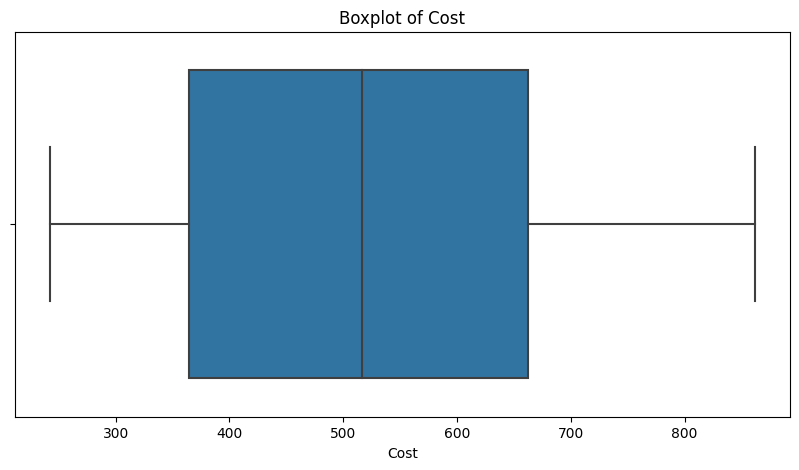

In [204]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train['cost'])
plt.title('Boxplot of Cost')
plt.xlabel('Cost')
plt.show()


مفيش اوت لاير الحمد لله

Text(0.5, 1.0, 'Boxplot of Cost')

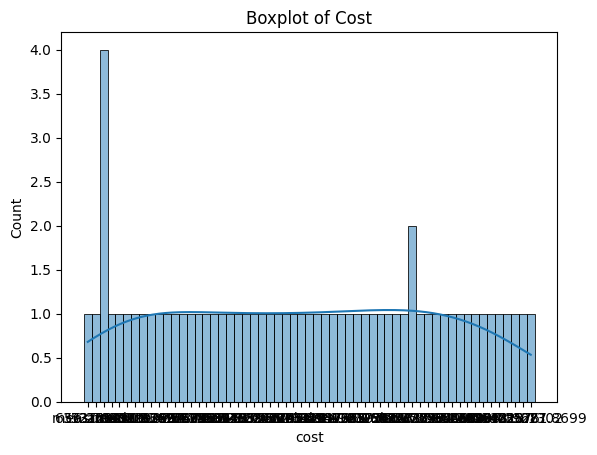

In [205]:
sns.histplot(net_outliers["cost"], bins=10, kde=True)
plt.title("Boxplot of Cost")

### Summary
- extract the number and convert all to USD
- dropped missing data

## additinal_features_in_market
problems:
- it contain lists but they are in string format
- need splitting into columns

In [206]:
train["additional_features_in_market"].unique()[:50]

array(["['video store', 'florist', 'ready food', 'coffee bar', 'bar for salad']",
       nan, "['florist']", "['coffee bar']",
       "['bar for salad', 'ready food', 'coffee bar', 'video store', 'florist']",
       "['bar for salad', 'ready food']",
       "['bar for salad', 'video store', 'ready food', 'coffee bar', 'florist']",
       "['ready food', 'coffee bar', 'video store', 'florist', 'bar for salad']",
       "['coffee bar', 'bar for salad', 'ready food', 'florist', 'video store']",
       "['florist', 'video store', 'bar for salad', 'coffee bar', 'ready food']",
       "['bar for salad', 'ready food', 'florist', 'coffee bar', 'video store']",
       "['video store', 'florist', 'bar for salad', 'ready food', 'coffee bar']",
       "['florist', 'coffee bar', 'bar for salad', 'ready food']",
       "['ready food', 'video store', 'florist', 'coffee bar', 'bar for salad']",
       "['florist', 'bar for salad', 'coffee bar', 'video store', 'ready food']",
       "['bar for salad', 

### clean

In [207]:
# unique values in this column
features = ["video store", "florist", "ready food", "coffee bar", "bar for salad"]

def parse_features(val):
    if pd.isna(val):
        return []
    # Remove extra characters and standardize
    val = str(val).lower().strip(" .")
    val = val.replace("(", "").replace(")", "")
    try:
        # Try safe literal_eval (for values like "['coffee bar', 'florist']")
        parsed = ast.literal_eval(val)
        if isinstance(parsed, list):
            return [f.strip().lower() for f in parsed]
    except:
        pass

    # If it's not a proper list, fallback: just split by comma
    return [x.strip().lower() for x in val.replace("[","").replace("]","").replace("'","").split(",") if x]

In [208]:
train["additional_features_in_market"] = train["additional_features_in_market"].apply(parse_features)

In [209]:
test["features_parsed"] = test["additional_features_in_market"].apply(parse_features)

In [210]:
# creat feature columns
for f in features:
   train[f] = train["additional_features_in_market"].apply(lambda lst: 1 if f in lst else 0)

In [211]:
# أولاً: parse features
test["features_parsed"] = test["additional_features_in_market"].apply(parse_features)

# بعدين: إنشاء الأعمدة الثنائية
for f in features:
    test[f] = test["features_parsed"].apply(lambda lst: 1 if f in lst else 0)


In [212]:
train['num_features'] = train[features].sum(axis=1)

In [213]:
test['num_features'] = test[features].sum(axis=1)

### impute

We don't need to because we will make drops for this col. As for the colms that came out, they are compensated by 0 if there is none.

In [214]:
train['num_features'].isna().sum()

0

In [215]:
train.drop(columns="additional_features_in_market", inplace =True)

In [216]:
test.drop(columns="additional_features_in_market", inplace =True)

### Summary
- extract new columns with the unique values (video store, florist, ready food, coffee bar, bar for salad)
- present feature is set to 1 and absent set to 0
- extract new column: number of features
- dropped the original column

## Areas (Store, Grocery, Frozen, Meat) & stor kind
problems:
- nan values in store can be substituted by sum of the remaining areas
- there data types are object


In [217]:
area = ['grocery_area', 'frozen_area', 'meat_area', 'store_area']

for col in area:
    # الحصول على القيم الفريدة، يشمل NaN
    unique_vals = train[col].unique()

    print(f"Unique values in '{col}' (count: {len(unique_vals)}):")
    print(unique_vals)
    print("-" * 40)


Unique values in 'grocery_area' (count: 6231):
['2037.64' '2049.72' '1322.21' ... '1562.08.' '1424.85.' '(1525.28)']
----------------------------------------
Unique values in 'frozen_area' (count: 56):
['481.98' '457.36' '523.32' '440.92' '593.93' '341.05' '472.27' '503.07'
 '227.8' '459.36' nan '465.54' '654.13' '470.27' '656.13' '389.54'
 '536.29' '853.22' '855.22' '385.45' '343.05' '595.93' '442.92' '229.8'
 '373.1' '783.64' '483.98' '391.54' '330.83' '387.45' '505.07' '447.7'
 '332.83' '398.93' '525.32' '375.1' '467.54' '534.29' '785.64' '449.7'
 '400.93' '503.07.' '""' '1783.64' '457.36.' '(440.92)' '470.27.'
 '398.93.' '(227.8)' '(465.54)' '467.54.' '(593.93)' '593.93.' '465.54.'
 '(654.13)' '400.93.']
----------------------------------------
Unique values in 'meat_area' (count: 5665):
['323' nan '348.85' ... '321.26.' '(220.55)' '220.55.']
----------------------------------------
Unique values in 'store_area' (count: 9506):
[nan '2572.86' '2200.59' ... '2839.81' '2287.92' '1972.

In [218]:
# الفانكشن لاستخراج الرقم وتحويل السالب لموجب والتقريب
def extract_and_clean_number(text):
    if pd.isna(text):
        return np.nan

    match = re.search(r"[-+]?\d*\.?\d+", str(text))
    if not match:
        return np.nan

    num = float(match.group())
    num = abs(num)
    num = round(num, 2)
    return num

# الأعمدة اللي عايزين ننظفها
area = ['grocery_area', 'frozen_area', 'meat_area', 'store_area']

# تطبيق الفانكشن على كل عمود
for col in area:
    train[col] = train[col].apply(extract_and_clean_number)

# عرض أول صفوف للتأكد
print(train[area].head())


   grocery_area  frozen_area  meat_area  store_area
0       2037.64       481.98     323.00         NaN
1       2049.72       457.36        NaN         NaN
2       1322.21       523.32     348.85         NaN
3           NaN       440.92     293.95         NaN
4       1872.19       593.93     395.95         NaN


In [219]:
# الفانكشن لاستخراج الرقم وتحويل السالب لموجب والتقريب
def extract_and_clean_number(text):
    if pd.isna(text):
        return np.nan

    match = re.search(r"[-+]?\d*\.?\d+", str(text))
    if not match:
        return np.nan

    num = float(match.group())
    num = abs(num)
    num = round(num, 2)
    return num

# الأعمدة اللي عايزين ننظفها
area = ['grocery_area', 'frozen_area', 'meat_area', 'store_area']

# تطبيق الفانكشن على كل عمود في test
for col in area:
    test[col] = test[col].apply(extract_and_clean_number)



In [220]:
area_cols = ["grocery_area", "frozen_area", "meat_area"]

def clean_area_values(val):
    if pd.isna(val):
        return np.nan

    val = str(val).strip()  # نشيل المسافات

    if val in ["", '""']:   # قيم فاضية
        return np.nan

    # لو بين أقواس (معناها غالبًا سالب)
    is_negative = False
    if val.startswith("(") and val.endswith(")"):
        is_negative = True
        val = val[1:-1]  # نشيل الأقواس

    # نشيل أي علامات زيادة
    val = val.replace('"', '').replace("'", "").replace("$", "").strip(".")

    try:
        num = float(val)
        if is_negative:
            num = -num
        return num
    except:
        return np.nan

# تطبيق الفانكشن على كل الأعمدة
for col in area_cols:
    train[col] = train[col].apply(clean_area_values)


In [221]:


# تطبيق الفانكشن على كل الأعمدة في test
for col in area_cols:
    test[col] = test[col].apply(clean_area_values)


### outliers impute "grocery_area", "frozen_area", "meat_area"

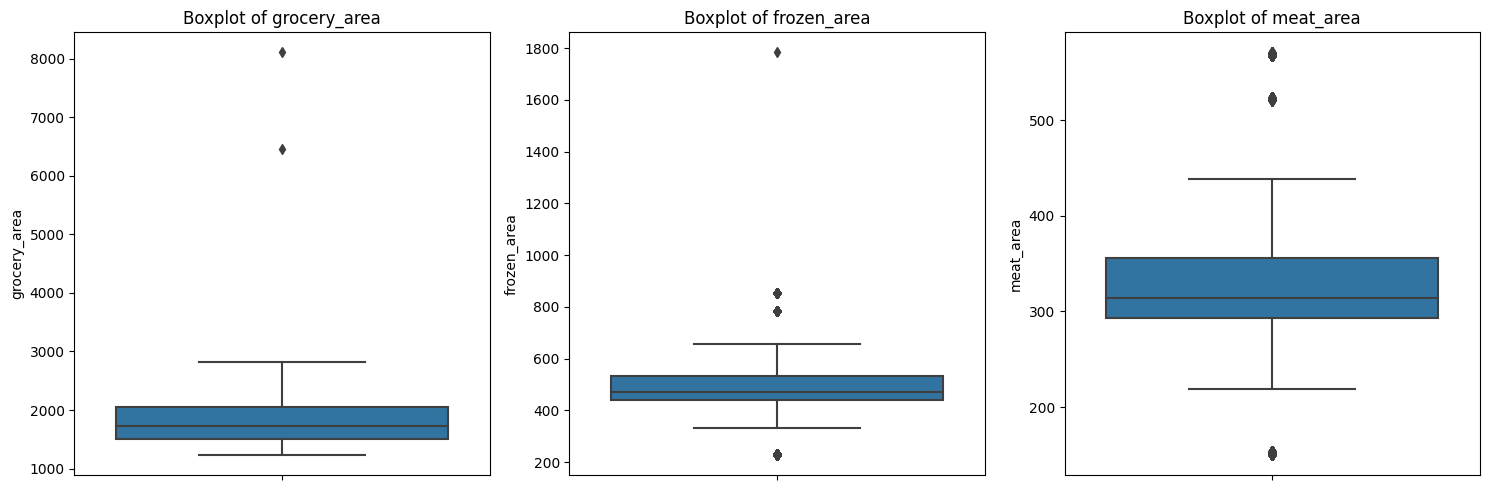

In [222]:

area_cols = ["grocery_area", "frozen_area", "meat_area"]
plt.figure(figsize=(15,5))

for i, col in enumerate(area_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [223]:
area_cols = ["grocery_area", "frozen_area", "meat_area"]

# حساب Bounds لكل عمود
bounds = {}
for col in area_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)

# حساب الميديان لكل فئة
medians_per_kind = {col: train.groupby("store_kind")[col].median() for col in area_cols}

def replace_outliers(row):
    for col in area_cols:
        if pd.notna(row[col]):
            lower, upper = bounds[col]

            # تحت اللوور باوند
            if row[col] < lower:
                if row['store_kind'] in ['small', 'unknown']:
                    continue
                else:
                    row[col] = medians_per_kind[col].get(row['store_kind'], row[col])

            # فوق الأبر باوند
            elif row[col] > upper:
                if row['store_kind'] == 'premium':
                    continue
                else:
                    row[col] = medians_per_kind[col].get(row['store_kind'], row[col])
    return row

# تطبيق
train = train.apply(replace_outliers, axis=1)

# التأكد
print(train[area_cols + ['store_kind']].head(10))


   grocery_area  frozen_area  meat_area   store_kind
0       2037.64       481.98     323.00      premium
1       2049.72       457.36        NaN  supermarket
2       1322.21       523.32     348.85  supermarket
3           NaN       440.92     293.95      unknown
4       1872.19       593.93     395.95      premium
5       1236.07       440.92     293.95  supermarket
6       2049.72       457.36     304.91      unknown
7       1623.48       341.05        NaN  supermarket
8       2449.91       472.27     313.55  supermarket
9       1734.50       503.07     333.55      premium


In [224]:
area_cols = ["grocery_area", "frozen_area", "meat_area"]

# الحسابات من train (تم عملها بالفعل)
# bounds: dictionary with (lower, upper) per column
# medians_per_kind: dictionary with median per store_kind per column

def replace_outliers_test(row):
    for col in area_cols:
        if pd.notna(row[col]):
            lower, upper = bounds[col]

            # تحت اللوور باوند
            if row[col] < lower:
                if row['store_kind'] in ['small', 'unknown']:
                    continue
                else:
                    row[col] = medians_per_kind[col].get(row['store_kind'], row[col])

            # فوق الأبر باوند
            elif row[col] > upper:
                if row['store_kind'] == 'premium':
                    continue
                else:
                    row[col] = medians_per_kind[col].get(row['store_kind'], row[col])
    return row

# تطبيق على test
test = test.apply(replace_outliers_test, axis=1)

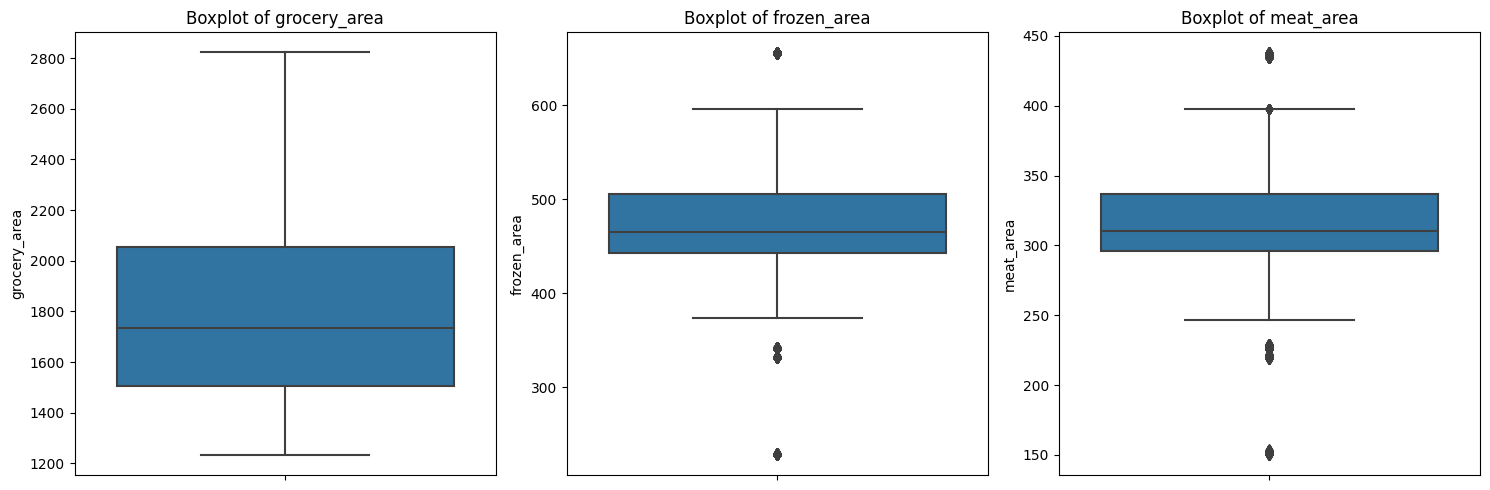

In [225]:
area_cols = ["grocery_area", "frozen_area", "meat_area"]
plt.figure(figsize=(15,5))

for i, col in enumerate(area_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [226]:
area = ['grocery_area', 'frozen_area', 'meat_area', 'store_area']

for col in area:
    # تحويل العمود للـ float
    train[col] = train[col].astype(float)

    # التأكد من النوع
    print(f"{col} dtype: {train[col].dtype}")

grocery_area dtype: float64
frozen_area dtype: float64
meat_area dtype: float64
store_area dtype: float64


In [227]:
area = ['grocery_area', 'frozen_area', 'meat_area', 'store_area']

for col in area:
    # تحويل العمود للـ float
    test[col] = test[col].astype(float)


### impute store_area

In [228]:
train[area].isna().sum()

grocery_area     3755
frozen_area      3729
meat_area        3742
store_area      12770
dtype: int64

In [229]:
area_cols = ['grocery_area', 'frozen_area', 'meat_area']

# تعويض NaN في store_area بمجموع الأعمدة الثلاثة
train['store_area'] = train.apply(
    lambda row: row[area_cols].sum() if pd.isna(row['store_area']) else row['store_area'], axis=1
)


In [230]:
area_cols = ['grocery_area', 'frozen_area', 'meat_area']

# تعويض NaN في store_area بمجموع الأعمدة الثلاثة
test['store_area'] = test.apply(
    lambda row: row[area_cols].sum() if pd.isna(row['store_area']) else row['store_area'], axis=1
)


In [231]:
train[area].isna().sum()

grocery_area    3755
frozen_area     3729
meat_area       3742
store_area         0
dtype: int64

In [232]:
converted = pd.to_numeric(train['grocery_area'], errors="coerce")

# Find the rows that failed to convert
failed = train.loc[converted.isna() & train['grocery_area'].notna(), col]
failed.unique()

array([], dtype=float64)

In [233]:
converted = pd.to_numeric(test['grocery_area'], errors="coerce")

# العثور على الصفوف اللي فشل تحويلها لرقم
failed = test.loc[converted.isna() & test['grocery_area'].notna(), 'grocery_area']
failed.unique()


array([], dtype=float64)

### outliers

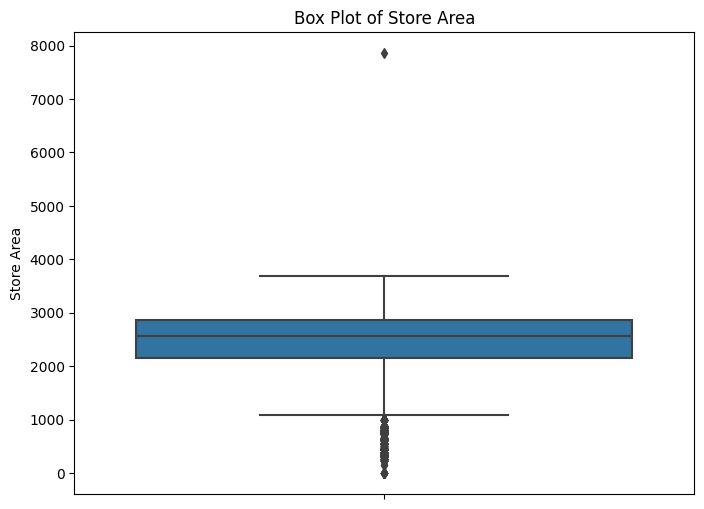

In [234]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=train['store_area'])
plt.title("Box Plot of Store Area")
plt.ylabel("Store Area")
plt.show()


In [235]:
# حساب المتوسط مع تجاهل أي NaN
mean_store_area = train['store_area'].mean()

# استبدال القيم الأكبر من 4000 بالمتوسط
train.loc[train['store_area'] > 4000, 'store_area'] = mean_store_area

In [236]:
# استبدال القيم الأكبر من 4000 بالمتوسط من train
test.loc[test['store_area'] > 4000, 'store_area'] = mean_store_area


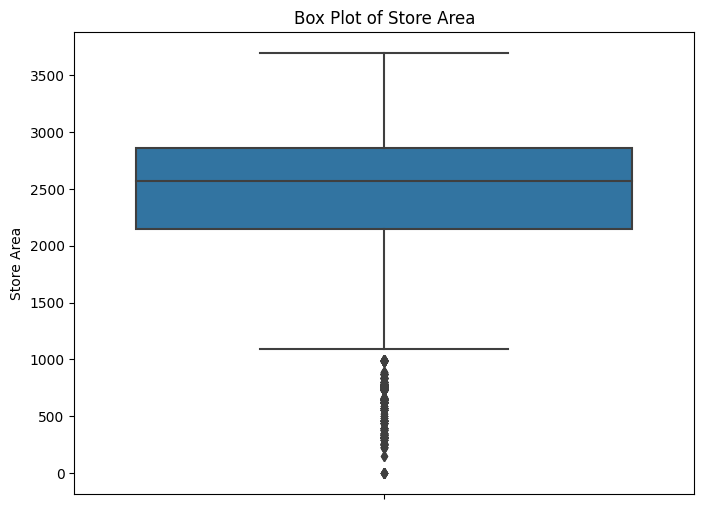

In [237]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=train['store_area'])
plt.title("Box Plot of Store Area")
plt.ylabel("Store Area")
plt.show()


In [238]:
# عدد القيم الأقل من 1000
count_below_1000 = (train['store_area'] < 1000).sum()

print(f"{count_below_1000}")


1172


In [239]:
# حساب الميديان لكل فئة في store_kind
median_per_kind = train.groupby('store_kind')['store_area'].median()

# دالة الاستبدال
def replace_small_store_area(row):
    if row['store_area'] < 1000:
        if row['store_kind'] in ['small', 'unknown']:
            return row['store_area']  # خليها زي ما هي
        else:
            # استبدلها بالميديان الخاص بالفئة اللي هي فيها
            return median_per_kind.get(row['store_kind'], row['store_area'])
    else:
        return row['store_area']     # القيم >= 1000 خليها زي ما هي

# تطبيق الدالة
train['store_area'] = train.apply(replace_small_store_area, axis=1)

# التأكد من النتائج
print(train[['store_area', 'store_kind']].head(10))



   store_area   store_kind
0     2842.62      premium
1     2507.08  supermarket
2     2194.38  supermarket
3      734.87      unknown
4     2862.07      premium
5     1970.94  supermarket
6     2811.99      unknown
7     1964.53  supermarket
8     3235.73  supermarket
9     2571.12      premium


In [240]:
# دالة الاستبدال للقيم الصغيرة في test
def replace_small_store_area_test(row):
    if row['store_area'] < 1000:
        if row['store_kind'] in ['small', 'unknown']:
            return row['store_area']  # خليها زي ما هي
        else:
            # استبدلها بالميديان الخاص بالفئة من train
            return median_per_kind.get(row['store_kind'], row['store_area'])
    else:
        return row['store_area']     # القيم >= 1000 خليها زي ما هي

# تطبيق الدالة على test
test['store_area'] = test.apply(replace_small_store_area_test, axis=1)



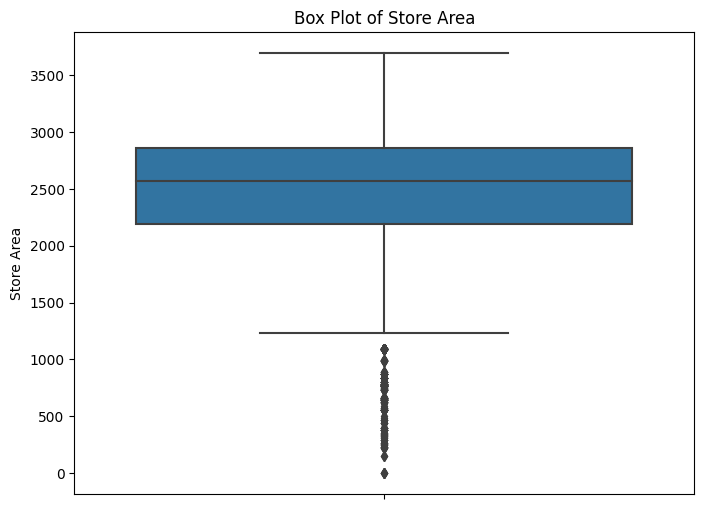

In [241]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=train['store_area'])
plt.title("Box Plot of Store Area")
plt.ylabel("Store Area")
plt.show()


In [242]:
# عدد القيم الأقل من 1000
count_below_1000 = (train['store_area'] < 1000).sum()

print(f" {count_below_1000}")


 217


So these are definitely not outlayers because they are present as a small area in the story kind column.

In [243]:
print("Before:")
print(train['store_kind'].value_counts())

# حساب المتوسط لكل فئة بدون unknown
mean_per_category = train.loc[train['store_kind'] != 'unknown'].groupby('store_kind')['store_area'].mean()

# استبدال unknown بناءً على أقرب متوسط
def replace_unknown(row):
    if row['store_kind'] == 'unknown':
        # احسب الفروق مع كل فئة حقيقية
        diffs = {cat: abs(row['store_area'] - mean) for cat, mean in mean_per_category.items()}
        # اختار الفئة الأقرب
        closest_category = min(diffs, key=diffs.get)
        return closest_category
    else:
        return row['store_kind']

train['store_kind'] = train.apply(replace_unknown, axis=1)

# التأكد من النتائج
print("After:")
print(train['store_kind'].value_counts())



Before:
store_kind
premium        16347
supermarket    16015
unknown         5922
small           1097
Name: count, dtype: int64
After:
store_kind
premium        19417
supermarket    16068
small           3896
Name: count, dtype: int64


In [244]:


# دالة الاستبدال للقيم unknown
def replace_unknown_test(row):
    if row['store_kind'] == 'unknown':
        # احسب الفروق مع كل فئة حقيقية من train
        diffs = {cat: abs(row['store_area'] - mean) for cat, mean in mean_per_category.items()}
        # اختار الفئة الأقرب
        closest_category = min(diffs, key=diffs.get)
        return closest_category
    else:
        return row['store_kind']

test['store_kind'] = test.apply(replace_unknown_test, axis=1)



problems
- remove () and . and ""

- store area = 	grocery_area + frozen_area + meat_area

### impute "grocery_area", "frozen_area", "meat_area"

In [245]:

def fill_missing_areas(row):
    g, f, m, s = row["grocery_area"], row["frozen_area"], row["meat_area"], row["store_area"]
    missing = [pd.isna(g), pd.isna(f), pd.isna(m)]
    n_missing = sum(missing)

    if n_missing == 1:
        # حالة ناقص واحد
        if pd.isna(g):
            row["grocery_area"] = s - (f + m)
        elif pd.isna(f):
            row["frozen_area"] = s - (g + m)
        elif pd.isna(m):
            row["meat_area"] = s - (g + f)

    elif n_missing == 2:
        # وزع الفرق على الاتنين الناقصين
        known = g if not pd.isna(g) else (f if not pd.isna(f) else m)
        missing_value = (s - known) / 2
        if pd.isna(g): row["grocery_area"] = missing_value
        if pd.isna(f): row["frozen_area"] = missing_value
        if pd.isna(m): row["meat_area"] = missing_value

    elif n_missing == 3:
        # وزع المساحة كلها بالتساوي
        row["grocery_area"] = row["frozen_area"] = row["meat_area"] = s / 3

    return row

# تطبيق الدالة على tran
train = train.apply(fill_missing_areas, axis=1)


In [246]:
def fill_missing_areas_test(row):
    g, f, m, s = row["grocery_area"], row["frozen_area"], row["meat_area"], row["store_area"]
    missing = [pd.isna(g), pd.isna(f), pd.isna(m)]
    n_missing = sum(missing)

    if n_missing == 1:
        # حالة ناقص واحد
        if pd.isna(g):
            row["grocery_area"] = s - (f + m)
        elif pd.isna(f):
            row["frozen_area"] = s - (g + m)
        elif pd.isna(m):
            row["meat_area"] = s - (g + f)

    elif n_missing == 2:
        # وزع الفرق على الاتنين الناقصين
        known = g if not pd.isna(g) else (f if not pd.isna(f) else m)
        missing_value = (s - known) / 2
        if pd.isna(g): row["grocery_area"] = missing_value
        if pd.isna(f): row["frozen_area"] = missing_value
        if pd.isna(m): row["meat_area"] = missing_value

    elif n_missing == 3:
        # وزع المساحة كلها بالتساوي
        row["grocery_area"] = row["frozen_area"] = row["meat_area"] = s / 3

    return row

# تطبيق الدالة على test
test = test.apply(fill_missing_areas_test, axis=1)


In [247]:
area_cols = ["grocery_area", "frozen_area", "meat_area", "store_area"]
train[area_cols].describe()

,grocery_area,frozen_area,meat_area,store_area
count,39381.000000,39381.000000,39381.000000,39381.000000
mean,1746.146651,472.179080,317.620213,2547.470923
std,413.316958,140.097868,112.157010,528.218627
min,0.000000,0.000000,-84.970000,0.000000
25%,1425.450000,440.920000,293.950000,2190.540000
50%,1734.500000,465.540000,310.300000,2572.860000
75%,2050.180000,505.070000,337.230000,2861.130000
max,2930.570000,1693.605000,1616.600000,3692.870000


In [248]:
train[['grocery_area', 'frozen_area', 'meat_area', 'store_area']].isna().sum()

grocery_area    0
frozen_area     0
meat_area       0
store_area      0
dtype: int64

### Summary
- extract the numbers and handle negative values to be positive
- we will be using the formula to impute this column: store_area = grocery_area + frozen_area + meat_area
- impute outliers with the store kind group median
- now we can impute this columns with the formula 

## Store Cost and Sales
- Various Iconsistent Values
- Various Incorrect Values

In [249]:
columns = ['store_sales', 'store_cost']

for col in columns:
    unique_vals = train[col].unique()[:50]
    print(f"Unique values in '{col}':")
    print(unique_vals)
    print("\n")  # سطر فاصل بين الأعمدة


Unique values in 'store_sales':
['8.76 millions' '$6.36 millions' '10.86 millions' '1.98 millions'
 '11.56 ,000,000illions' '5.22 millions' '8.49 millions' '6.57 millions'
 '2.43 millions' '4.02ms' '3.96 millions' '1.71 millions' '$8.79 millions'
 '6.78 millions' '1.08 millions' '2.68 millions' '6.16 millions'
 '3.62 millions' '14.56 millions' '6.42 millions' '13.72 millions'
 '11.22 millions' '3.93 millions' '$5.16 millions' '3.7 millions'
 '5.7 millions' '$7.98 millions' '2.01 millions' '4.11ms' '$1.53 millions'
 '$5.06 millions' '3.32 millions' '1.86 millions' '6.93 millions' '4.23ms'
 '15.64 millions' '6.44 millions' '$4.66 millions' '8.85 millions'
 '9.0 millions' '2.76 ,000,000illions' '6.9 millions' '5.4 millions'
 '4.94 millions' '2.96 millions' '7.95 millions' '14.04 millions' '€2.5m'
 '10.6 ,000,000illions' '8.52 millions']


Unique values in 'store_cost':
['4.2924 millions' '1.9716 millions' '4.4526 millions' '0.6732 millions'
 '4.9708 millions' '1.6182 millions' '3.7356 mil

### clean

In [250]:
train[['store_sales', 'store_cost']].isna().sum()

store_sales    117
store_cost     109
dtype: int64

In [251]:
# same function used in the cost
train['store_sales'] = train['store_sales'].apply(clean_and_convert_to_usd)
train['store_cost'] = train['store_cost'].apply(clean_and_convert_to_usd)

In [252]:
# same function used in the cost
test['store_sales'] = test['store_sales'].apply(clean_and_convert_to_usd)
test['store_cost'] = test['store_cost'].apply(clean_and_convert_to_usd)

In [253]:
train[['store_sales', 'store_cost']].isna().sum()

store_sales    117
store_cost     109
dtype: int64

### impute

In [254]:
# الأعمدة المراد تعويضها
cols_to_fill = ['store_sales', 'store_cost']

for col in cols_to_fill:
    # نحسب المتوسط لكل store_kind
    mean_per_kind = train.groupby('store_kind')[col].transform('mean')

    # استبدال النال بالقيمة المتوسطة حسب الكاتيجوري
    train[col] = train[col].fillna(mean_per_kind)

# التأكد من أنه لا يوجد NaN بعد العملية
print(train[cols_to_fill].isna().sum())


store_sales    0
store_cost     0
dtype: int64


In [255]:
cols_to_fill = ['store_sales', 'store_cost']

for col in cols_to_fill:
    # حساب المتوسط لكل store_kind من train
    mean_per_kind = train.groupby('store_kind')[col].mean()

    # استبدال القيم المفقودة في test بالقيمة المتوسطة حسب الكاتيجوري
    test[col] = test.apply(
        lambda row: mean_per_kind.get(row['store_kind'], row[col]) if pd.isna(row[col]) else row[col], axis=1
    )

### outliers

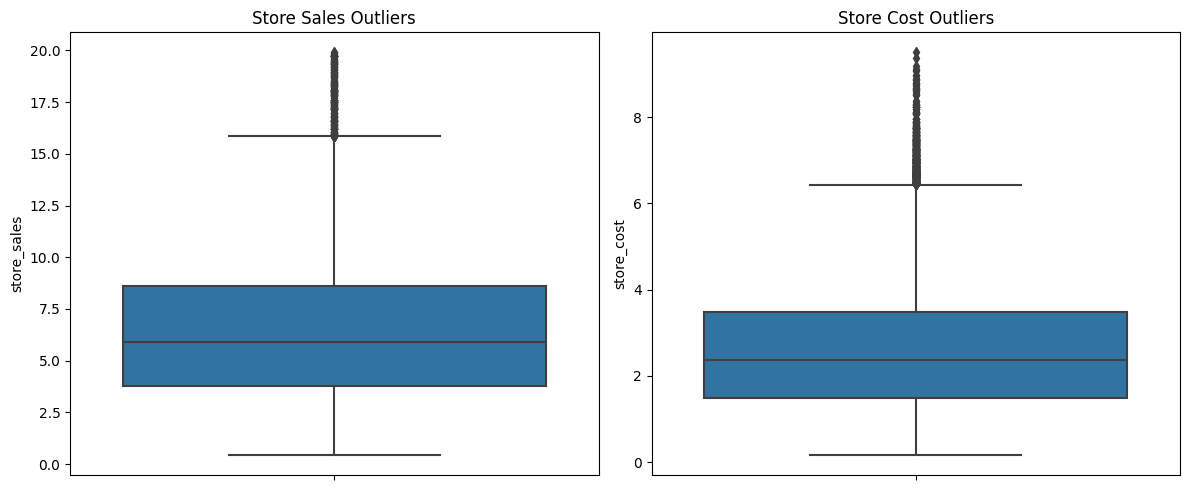

In [256]:
# دالة لاكتشاف الأوتلاير باستخدام IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# اكتشاف الأوتلايرز
sales_outliers = detect_outliers_iqr(train, "store_sales")
cost_outliers = detect_outliers_iqr(train, "store_cost")

# عرض الرسومات جنب بعض
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=train["store_sales"])
plt.title("Store Sales Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=train["store_cost"])
plt.title("Store Cost Outliers")

plt.tight_layout()
plt.show()



In [257]:
# شرط القيم الأكبر من 15 مليون وخارج فئة premium
condition_sales = (train['store_sales'] > 15_000_000) & (train['store_kind'] != 'premium')
condition_cost  = (train['store_cost']  > 15_000_000) & (train['store_kind'] != 'premium')

# حساب عدد الصفوف لكل عمود
count_sales = train[condition_sales].shape[0]
count_cost  = train[condition_cost].shape[0]

print(f"Number of store_sales > 15 million and not in 'premium': {count_sales}")
print(f"Number of store_cost > 15 million and not in 'premium': {count_cost}")



Number of store_sales > 15 million and not in 'premium': 0
Number of store_cost > 15 million and not in 'premium': 0


All the extreme values ​​are in very large stores like malls, so it is normal for the profit to be this high, so this is not an outlier or anything.

### Summary
- extract numbers and convert all currency to USD
- impute missing values with the mean cost/sales of the store kind (apply groupby)
- kept the outliers, as they were determined to be logically valid.

_____

# EDA & Visualization

### Correlation Heatmap Insights

1. **Strong correlation between `gross_weight` and `net_weight`** (≈ 0.97)  
   - Expected, since gross weight includes packaging, while net weight is the product only.

2. **Strong correlation between `store_sales` and `store_cost`** (≈ 0.95)  
   - Makes sense: higher sales usually imply higher costs.

3. **`store_area` is moderately correlated with `grocery_area`, `frozen_area`, and `meat_area`** (0.3–0.4)  
   - Larger stores tend to have larger dedicated sections.

4. **Features like `video store`, `florist`, `ready food`, `coffee bar`, `bar for salad`, and `num_features` are strongly correlated with each other** (0.5–0.8)  
   - These form a **services/features cluster**, meaning that the presence of one feature increases the likelihood of others.

5. **`cost` has weak correlations with almost all numeric features**  
   - Suggests that cost may be more influenced by **categorical factors** such as `promotion_name` or `brand`.

---
## Categorical Variables

1. **Strong Associations**
   - **Product ↔ Department (0.82):** Very strong association, which is expected since departments categorize products.
   - **Department ↔ Brand (0.53):** Brands tend to cluster within specific departments.
   - **Product ↔ Brand (0.40):** Moderate-to-strong link, reflecting that brands are tied to particular products.
   - **Education ↔ Work (0.50):** Education level strongly influences work category/type.

2. **Moderate Associations**
   - **Promotion Name ↔ Store Kind (0.24):** Certain promotions are associated with specific store categories.

---
### Categorical vs Numerical Analysis

1. Store kind shows very strong associations with several numerical features, especially the total number of features and ready food sales. Salad bars, florists, and coffee bars. This indicates that the type of store strongly influences the range of services and specific departments offered.  

2. Work is highly related to yearly income, which aligns with expectations. Education also shows a meaningful connection with income, reflecting how academic level influences earning potential.  

3. Promotion name is moderately associated with cost, store size, grocery area, and certain store sections such as coffee bar, salad bar, florist, and ready food. This suggests that promotions are not random but tailored to store setup and product types.  

---
## Notes on Cost Relationships

- **Promotion Name** shows the strongest relationship with `cost`
- Other features like *bar for salad*, *ready food*, *florist*, and *coffee bar* are statistically significant , but their actual correlations are weak
- From a **practical perspective**, only `promotion_name` seems to have a meaningful influence on `cost`.  
- Most other variables show negligible impact and can be deprioritized in further analysis.

In [258]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39381 entries, 0 to 41580
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              39381 non-null  int64  
 1   yearly_income   39381 non-null  float64
 2   gross_weight    39381 non-null  float64
 3   net_weight      39381 non-null  float64
 4   is_recyclable   39381 non-null  object 
 5   promotion_name  39381 non-null  object 
 6   store_kind      39381 non-null  object 
 7   store_sales     39381 non-null  float64
 8   store_cost      39381 non-null  float64
 9   grocery_area    39381 non-null  float64
 10  frozen_area     39381 non-null  float64
 11  meat_area       39381 non-null  float64
 12  cost            39381 non-null  float64
 13  customer_city   39381 non-null  object 
 14  customer_state  39381 non-null  object 
 15  seller_city     39381 non-null  object 
 16  seller_state    39381 non-null  object 
 17  review_score    39381 non-null  floa

In [259]:
train.head()

,id,yearly_income,gross_weight,net_weight,is_recyclable,promotion_name,store_kind,store_sales,store_cost,grocery_area,frozen_area,meat_area,cost,customer_city,customer_state,seller_city,seller_state,review_score,store_area,package_weight,status,gender,children,education,work,product,department,brand,distance_km,video store,florist,ready food,coffee bar,bar for salad,num_features
0,0,10000.0,28.1997,26.6008,yes,dimes off,premium,8.76,4.2924,2037.64,481.98,323.00,602.7575,florianopolis,SC,navegantes,SC,5.0,2842.62,1.5989,single,female,4.0,bachelors,professional,cleaning supplies,household,red wing,82.518,1,1,1,1,1,5
1,1,46200.0,16.5710,14.9720,no,budget bargains,supermarket,6.36,1.9716,2049.72,457.36,0.00,708.6650,abaete,MG,betim,MG,4.0,2507.08,1.5990,single,female,3.0,bachelors,management,snack foods,snack foods,nationeel,158.642,0,0,0,0,0,0
2,2,30000.0,28.6358,27.1822,yes,shelf emptiers,supermarket,10.86,4.4526,1322.21,523.32,348.85,564.2647,sao paulo,SP,other,SP,5.0,2194.38,1.4536,married,male,2.0,high school,manual,magazines,periodicals,excel,62.813,0,1,0,0,0,1
3,3,30000.0,14.2161,11.2944,yes,savings galore,small,1.98,0.6732,0.00,440.92,293.95,724.5119,sao paulo,SP,sao paulo,SP,1.0,734.87,2.9217,single,female,3.0,partial college,professional,dairy,dairy,carlson,3.021,0,0,0,1,0,1
4,4,50000.0,12.6172,9.7100,no,sale winners,premium,11.56,4.9708,1872.19,593.93,395.95,519.7574,capivari,SP,sao paulo,SP,5.0,2862.07,2.9072,married,female,5.0,bachelors,professional,vegetables,produce,hermanos,125.610,1,1,1,1,1,5


I whispered every time I saw how important it was with the cost, because if it was important, I would drop it.

## All Columns

=== Correlation Matrix ===


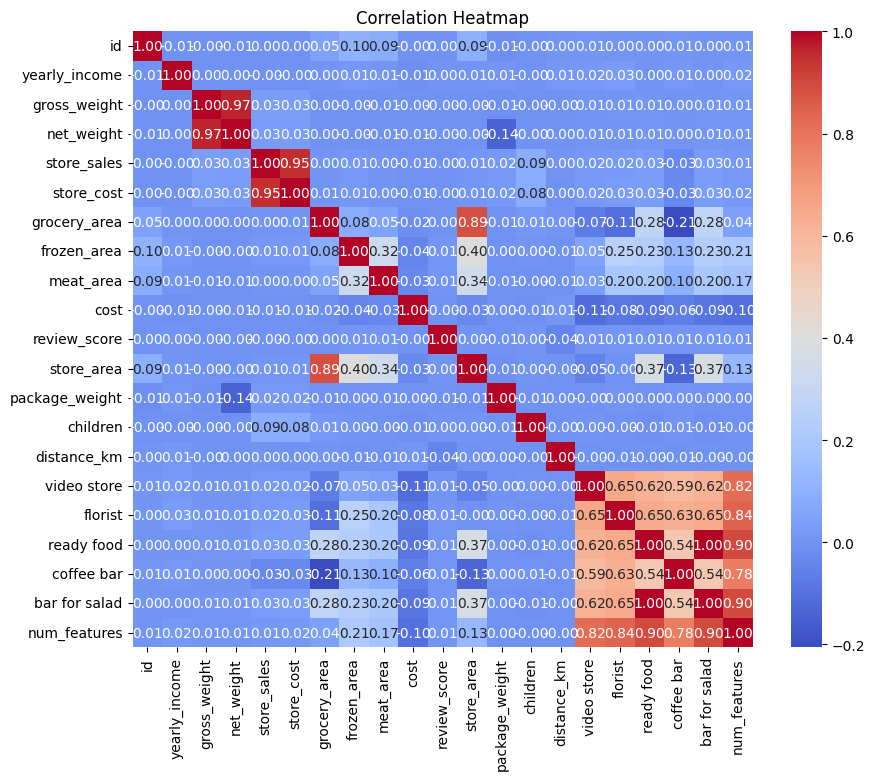

In [260]:
print("=== Correlation Matrix ===")
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
corr = train[numeric_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- Cost depends on the store area and the number of features.
- Of course, there is a strong relationship between sales and cost.
- All weights have a strong relationship.

In [261]:
def eda_summary(df, top_rare=3):
    summary = pd.DataFrame({
        "Data_Type": df.dtypes,
        "Missing_Values": df.isna().sum(),
        "Missing_Percent": round(df.isna().mean() * 100, 1),
        "Unique_Values": df.nunique(),
        "Maximum_Value": df.max(),
        "Minimum_Value": df.min(),
    })

    numerical_cols = df.select_dtypes(include=np.number).columns
    outliers_values = {}
    outliers_count = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
        outliers_values[col] = outliers.tolist()
        outliers_count[col] = len(outliers)

    summary["Outliers_Count"] = summary.index.map(lambda x: outliers_count.get(x, np.nan))
    summary["Outliers"] = summary.index.map(lambda x: outliers_values.get(x, np.nan))

    categorical_cols = df.select_dtypes(include='object').columns
    rare_values = {}
    for col in categorical_cols:
        counts = df[col].value_counts()
        rare_values[col] = counts.nsmallest(top_rare).to_dict()
    summary["Rare_Values"] = summary.index.map(lambda x: rare_values.get(x, np.nan))

    return summary.sort_values(by="Missing_Values", ascending=False)

In [262]:
from scipy.stats import f_oneway
# correlation ratio function (eta squared)
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)

    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg = np.nanmean(values)

    n = np.zeros(cat_num)
    y_cat = np.zeros(cat_num)

    for i in range(cat_num):
        cat_measures = values[np.argwhere(fcat == i).flatten()]
        n[i] = len(cat_measures)
        y_cat[i] = np.nanmean(cat_measures) if len(cat_measures) > 0 else 0

    numerator = np.sum(n * (y_cat - y_avg) ** 2)
    denominator = np.sum((values - y_avg) ** 2)

    return numerator / denominator if denominator != 0 else 0


def cost_relationships_grid(df, cost_col="cost", eta_threshold=0.05, p_threshold=0.05, corr_threshold=0.1, top_cats_limit=20):
    categorical_cols = df.select_dtypes(include="object").columns.tolist()
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    if cost_col in numerical_cols:
        numerical_cols.remove(cost_col)

    plots = []

    # ----- Numerical vs Cost -----
    for num_col in numerical_cols:
        corr = df[[cost_col, num_col]].corr().iloc[0,1]
        if abs(corr) >= corr_threshold:
            plots.append(("num", num_col, corr, df))

    # ----- Categorical vs Cost -----
    for cat_col in categorical_cols:
        top_cats = df[cat_col].value_counts().nlargest(top_cats_limit).index
        df_plot = df.copy()
        df_plot[cat_col] = df_plot[cat_col].where(df_plot[cat_col].isin(top_cats), "Other")

        groups = [df_plot[df_plot[cat_col] == g][cost_col].dropna() for g in df_plot[cat_col].unique()]
        if len(groups) <= 1:
            continue

        eta = correlation_ratio(df_plot[cat_col].astype(str), df_plot[cost_col])
        try:
            _, p_value = f_oneway(*groups)
        except:
            p_value = 1

        if eta >= eta_threshold and p_value < p_threshold:
            plots.append(("cat", cat_col, eta, df_plot))

    if not plots:
        print("No significant relationships found.")
        return

    n = len(plots)
    cols = 3
    rows = int(np.ceil(n / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
    axes = axes.flatten()

    for ax, (ptype, col, score, data_used) in zip(axes, plots):
        if ptype == "num":
            sns.scatterplot(x=col, y=cost_col, data=data_used, alpha=0.5, ax=ax)
            ax.set_title(f"{col} vs {cost_col}\nCorr={score:.2f}")
        else:
            sns.boxplot(x=col, y=cost_col, data=data_used, ax=ax)
            ax.set_title(f"{col} vs {cost_col}\nEta²={score:.2f}")
            ax.tick_params(axis='x', rotation=90)

    for j in range(len(plots), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

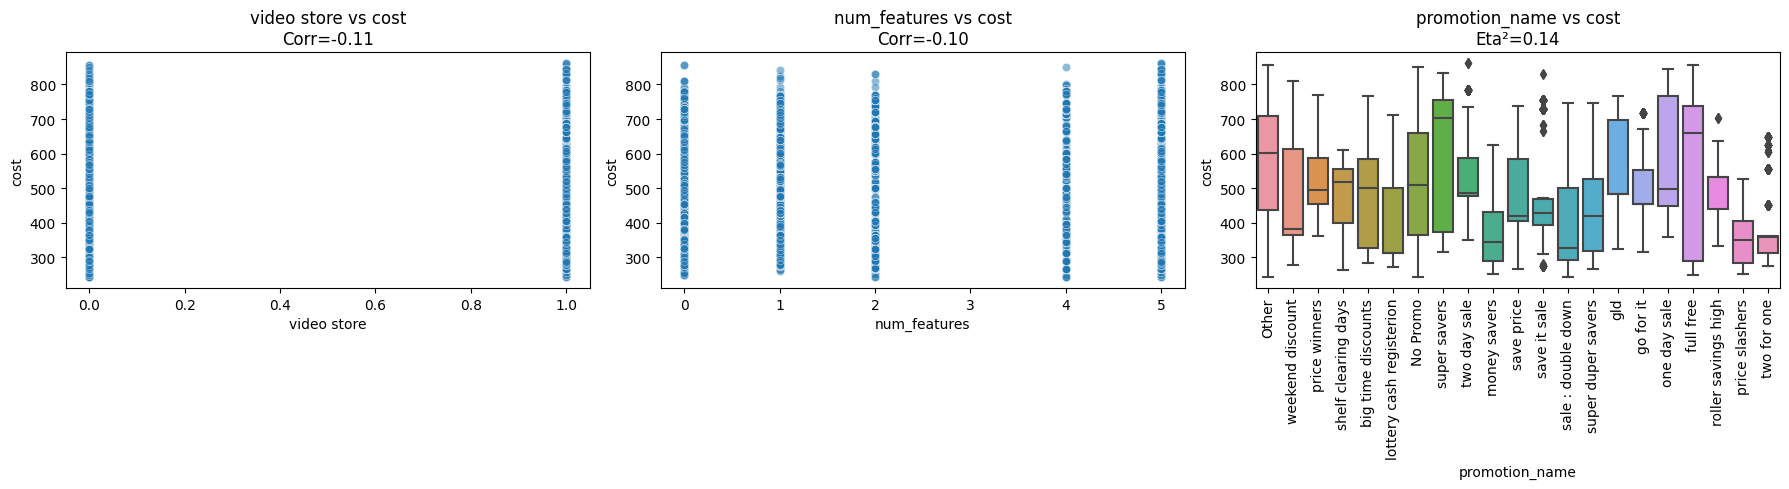

In [263]:
cost_relationships_grid(train, cost_col="cost")

## yearly_income

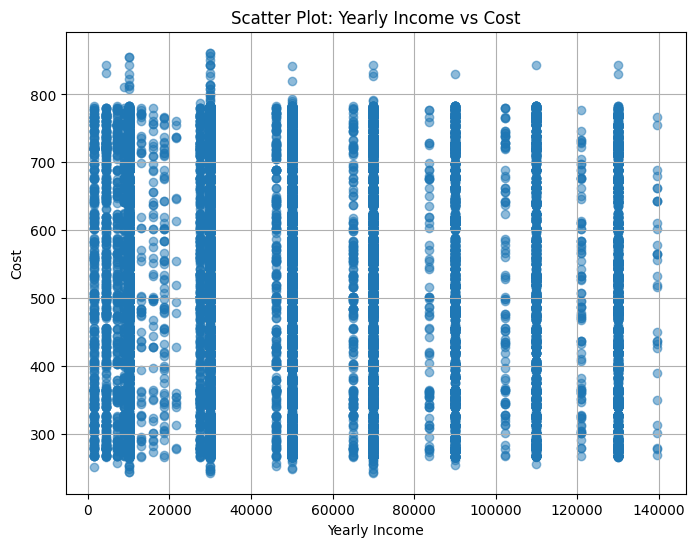

In [264]:
plt.figure(figsize=(8,6))
plt.scatter(train['yearly_income'], train['cost'], alpha=0.5)

plt.title("Scatter Plot: Yearly Income vs Cost")
plt.xlabel("Yearly Income")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

 - There's no clear relationship between an individual's annual income and the amount they spend on supermarket purchases.
- You'll feel like this column is divided into classes, so I'll divide it into categories in a new column.

In [265]:

import pandas as pd

bins = [0, 40000, 80000, 120000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']

train['income_category'] = pd.cut(train['yearly_income'], bins=bins, labels=labels, include_lowest=True)



In [266]:
bins = [0, 40000, 80000, 120000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']

test['income_category'] = pd.cut(test['yearly_income'], bins=bins, labels=labels, include_lowest=True)


## gross_weight, net_weight, package_weight

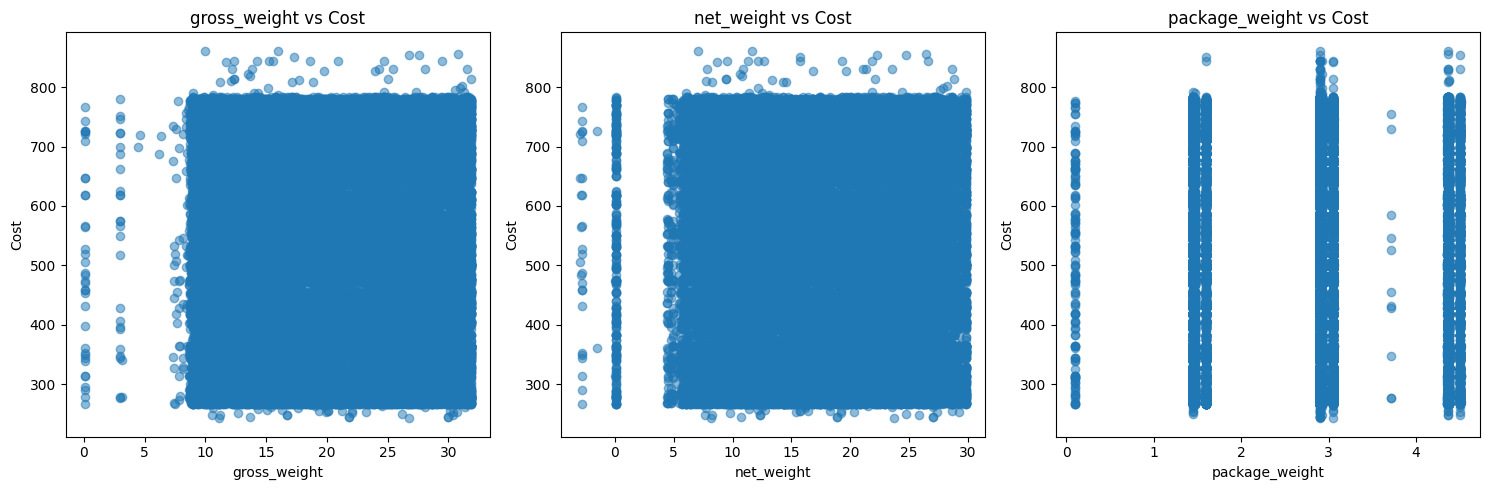

In [267]:


# List of features to compare with cost
features = ['gross_weight', 'net_weight', 'package_weight']

plt.figure(figsize=(15, 5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(train[col], train['cost'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Cost')
    plt.title(f"{col} vs Cost")

plt.tight_layout()
plt.show()


- It makes sense for someone to buy something light and pay a high price for it, like a gold ring, for example.
- It's natural for there to be no clear relationship between weight and price.

## recyclable

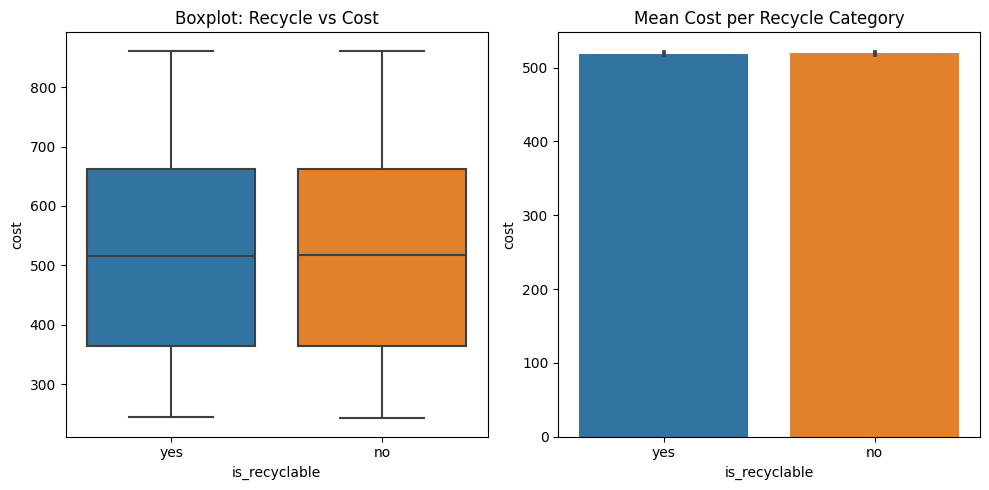

In [268]:

plt.figure(figsize=(10,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x='is_recyclable', y='cost', data=train)
plt.title("Boxplot: Recycle vs Cost")

# Barplot (mean cost)
plt.subplot(1,2,2)
sns.barplot(x='is_recyclable', y='cost', data=train, estimator=lambda x: round(x.mean(),2))
plt.title("Mean Cost per Recycle Category")

plt.tight_layout()
plt.show()


- Colum has nothing to do with the cost.
- If the Yes were much higher than the No, or vice versa, I would have said this is an important feature.
- But neither of them is higher than the other, so this Colum is not expressive.

## promotion_name

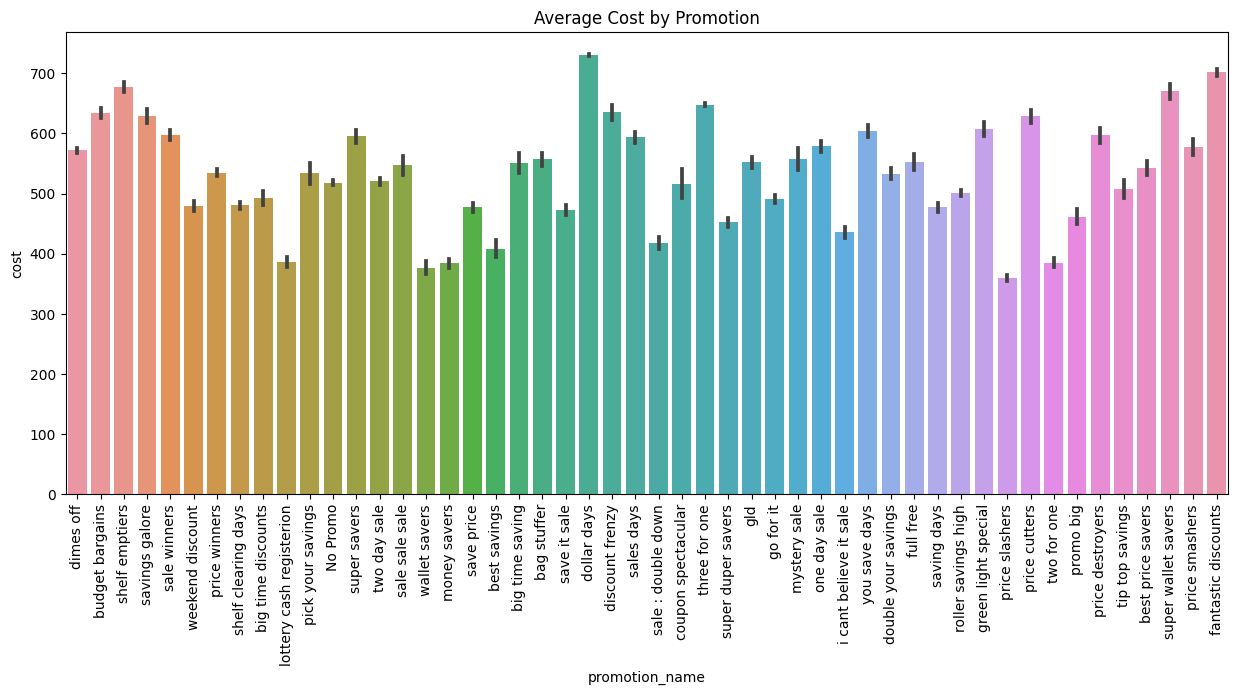

In [269]:
plt.figure(figsize=(15,6))
sns.barplot(x="promotion_name", y="cost", data=train, estimator=lambda x: round(x.mean(),2))
plt.xticks(rotation=90)
plt.title("Average Cost by Promotion")
plt.show()


- This column is useful in predicting cost because there are campaigns that attracted more customers than others.
- We won't delete it, but we'll target/freq encoding it.

## store_kind

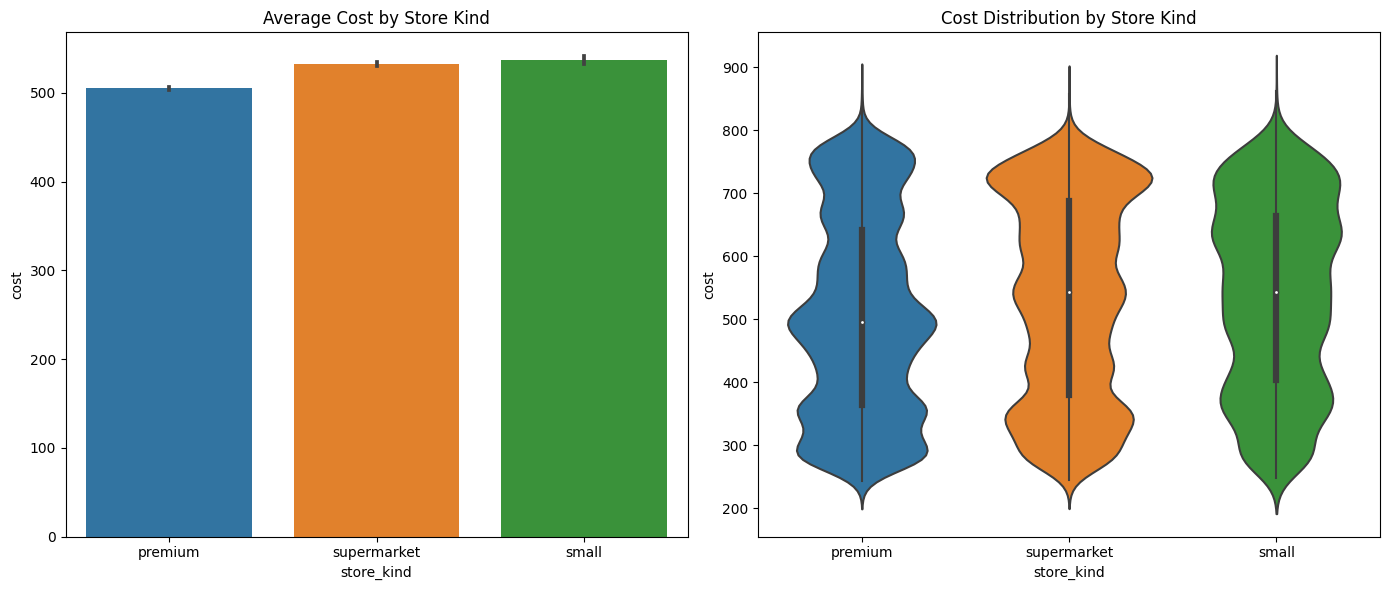

In [270]:
plt.figure(figsize=(14,6))

# Barplot
plt.subplot(1,2,1)
sns.barplot(x="store_kind", y="cost", data=train, estimator=lambda x: round(x.mean(),2))
plt.title("Average Cost by Store Kind")

# Violinplot
plt.subplot(1,2,2)
sns.violinplot(x="store_kind", y="cost", data=train)
plt.title("Cost Distribution by Store Kind")

plt.tight_layout()
plt.show()


- Unfortunately, there is no strong relationship between him and the cost.


## store_area

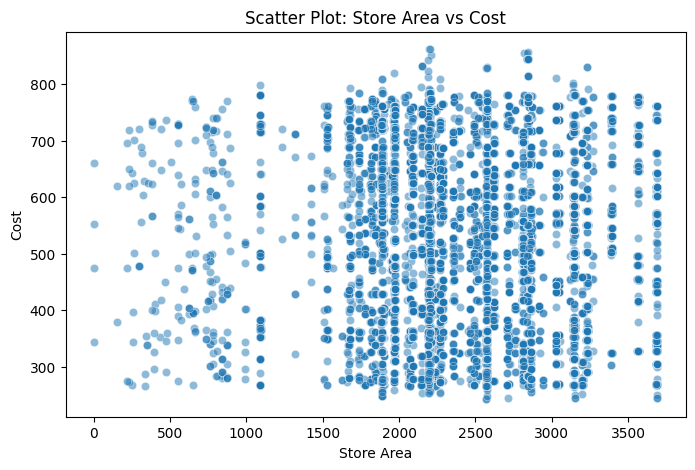

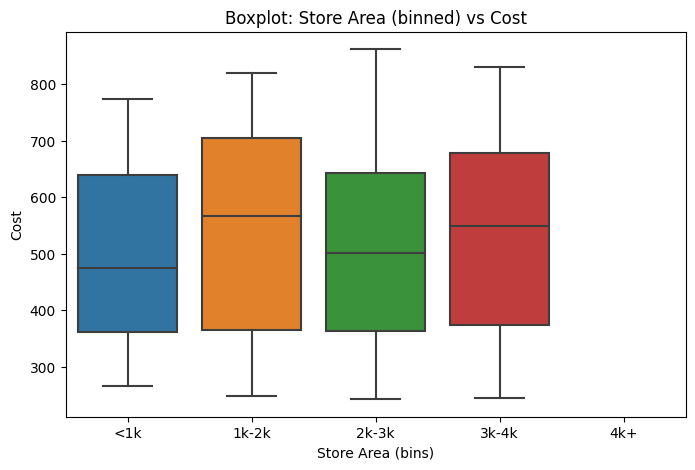

In [271]:

# 1) Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='store_area', y='cost', data=train, alpha=0.5)
plt.title("Scatter Plot: Store Area vs Cost")
plt.xlabel("Store Area")
plt.ylabel("Cost")
plt.show()

# 2) Boxplot باستخدام تقسيم المساحات إلى فئات (bins)
train['store_area_bins'] = pd.cut(train['store_area'], bins=[0,1000,2000,3000,4000,5000],
                                  labels=['<1k','1k-2k','2k-3k','3k-4k','4k+'])

plt.figure(figsize=(8,5))
sns.boxplot(x='store_area_bins', y='cost', data=train)
plt.title("Boxplot: Store Area (binned) vs Cost")
plt.xlabel("Store Area (bins)")
plt.ylabel("Cost")
plt.show()


- The Store Area is useful if we divide it into classes based on space.
- I will divide it into classes and dispense with the Store Kind.

In [272]:
# إنشاء كولوم جديد للفئات
train['store_area_category'] = pd.cut(
    train['store_area'],
    bins=[0,1000,2000,3000,4000],
    labels=['<1k','1k-2k','2k-3k','3k-4k']
)

# نتاكد من النتيجة
print(train[['store_area', 'store_area_category']].head(10))


   store_area store_area_category
0     2842.62               2k-3k
1     2507.08               2k-3k
2     2194.38               2k-3k
3      734.87                 <1k
4     2862.07               2k-3k
5     1970.94               1k-2k
6     2811.99               2k-3k
7     1964.53               1k-2k
8     3235.73               3k-4k
9     2571.12               2k-3k


In [273]:
# نطبق نفس الـ bins على test
bins = [0, 1000, 2000, 3000, 4000]
labels = ['<1k', '1k-2k', '2k-3k', '3k-4k']

test['store_area_category'] = pd.cut(
    test['store_area'],
    bins=bins,
    labels=labels
)

- Apply one hot encoding  to it.


## store_sales , store_cost

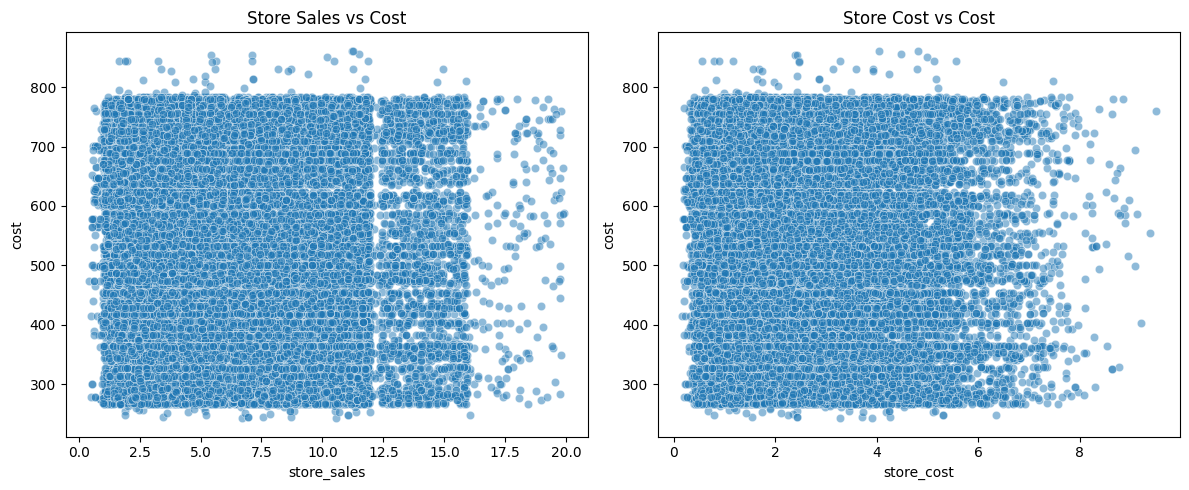

In [274]:

plt.figure(figsize=(12,5))

# العلاقة بين store_sales و cost
plt.subplot(1,2,1)
sns.scatterplot(data=train, x="store_sales", y="cost", alpha=0.5)
plt.title("Store Sales vs Cost")

# العلاقة بين store_cost و cost
plt.subplot(1,2,2)
sns.scatterplot(data=train, x="store_cost", y="cost", alpha=0.5)
plt.title("Store Cost vs Cost")

plt.tight_layout()
plt.show()


- The heatmap above shows that the relationship between sales and the store coast is strong.
- In my opinion, we should remove the store coast and include the store sales model only, because the two are almost the same.

## customer_city, customer_state , seller_city, seller_state

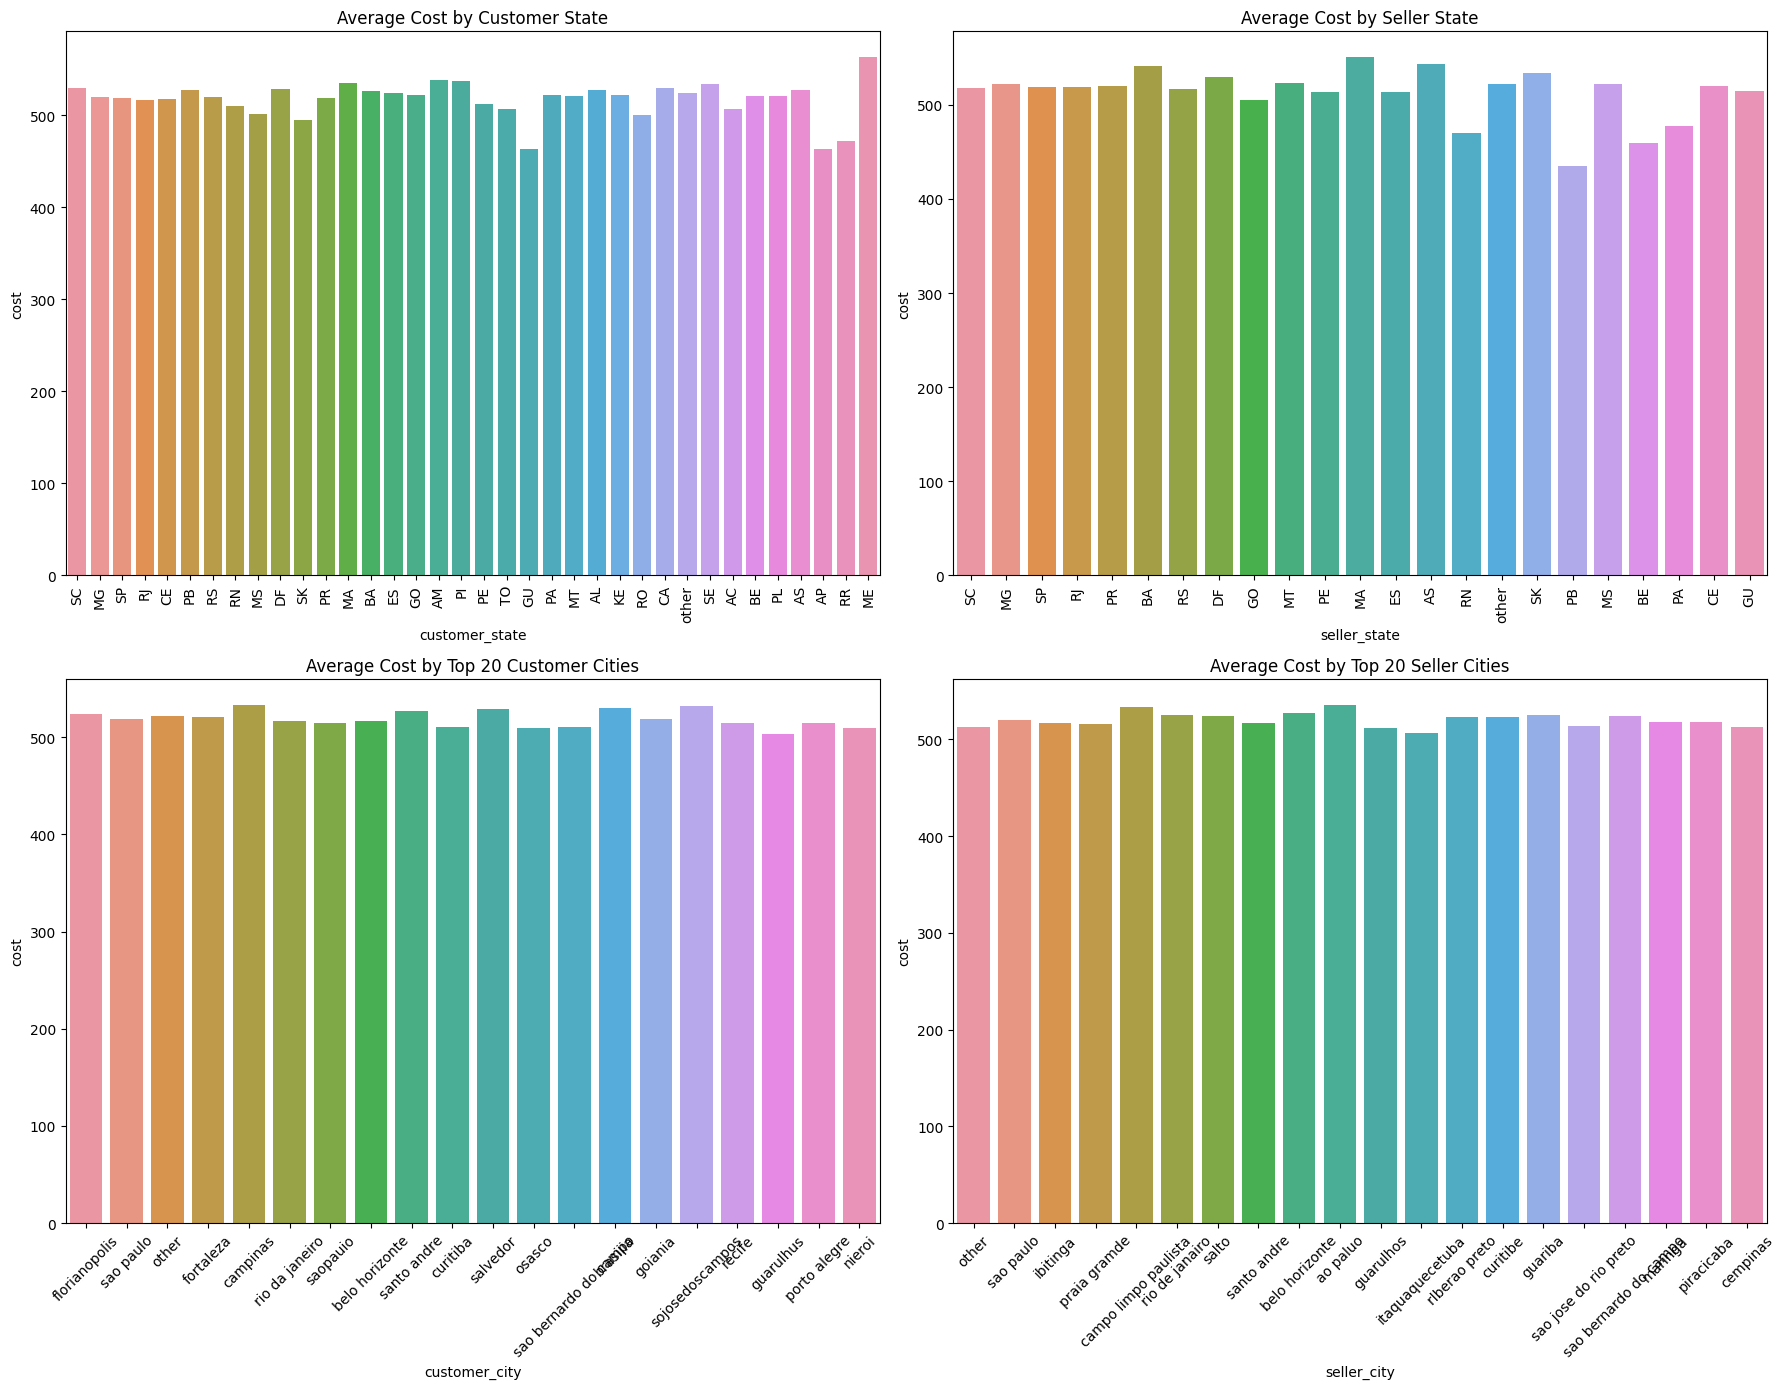

In [275]:


plt.figure(figsize=(18, 14))

# 1. Average cost by customer_state
plt.subplot(2, 2, 1)
sns.barplot(x='customer_state', y='cost', data=train, errorbar=None)
plt.title("Average Cost by Customer State", fontsize=12)
plt.xticks(rotation=90)

# 2. Average cost by seller_state
plt.subplot(2, 2, 2)
sns.barplot(x='seller_state', y='cost', data=train, errorbar=None)
plt.title("Average Cost by Seller State", fontsize=12)
plt.xticks(rotation=90)

# 3. Average cost by Top 10 customer cities
plt.subplot(2, 2, 3)
top_customer_cities = train['customer_city'].value_counts().nlargest(20).index
sns.barplot(x='customer_city', y='cost', data=train[train['customer_city'].isin(top_customer_cities)], errorbar=None)
plt.title("Average Cost by Top 20 Customer Cities", fontsize=12)
plt.xticks(rotation=45)

# 4. Average cost by Top 10 seller cities
plt.subplot(2, 2, 4)
top_seller_cities = train['seller_city'].value_counts().nlargest(20).index
sns.barplot(x='seller_city', y='cost', data=train[train['seller_city'].isin(top_seller_cities)], errorbar=None)
plt.title("Average Cost by Top 20 Seller Cities", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- All cities and states have very close cost ranges.
- I will do better frequency encoding for them than target encoding.

## review_score

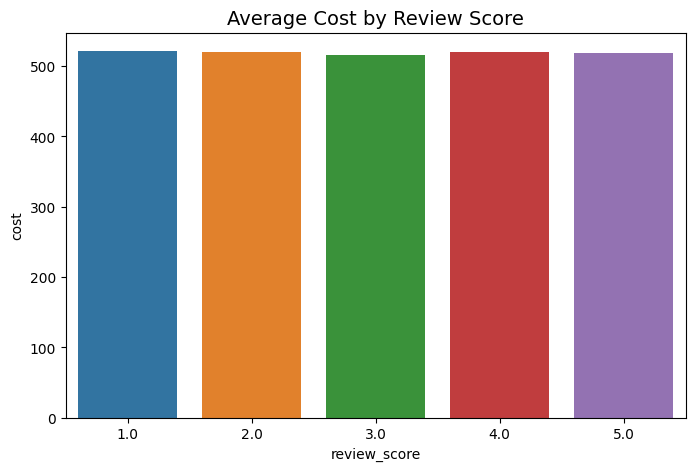

In [276]:

plt.figure(figsize=(8,5))
sns.barplot(x='review_score', y='cost', data=train, errorbar=None)
plt.title("Average Cost by Review Score", fontsize=14)
plt.show()


In [277]:
# 2) حساب الميديان للكوست في كل كاتيجوري من الريفيو سكور
median_values = train.groupby("review_score")["cost"].median().round(2)
print("Median cost per review score:")
print(median_values)


Median cost per review score:
review_score
1.0    516.78
2.0    519.76
3.0    504.96
4.0    516.78
5.0    515.26
Name: cost, dtype: float64


- The review_score is not directly related to cost.
That is, the customer rating (1 to 5) reflects the customer experience (shipping delays, product quality, etc.), not the price.
A customer might purchase a very expensive order and receive a replacement if the service is poor.
- The data distribution is unbalanced.
The number of people who rated 1 is very small compared to those who rated 5, so the average can be misleading.

## gender, status, children ,education,	work

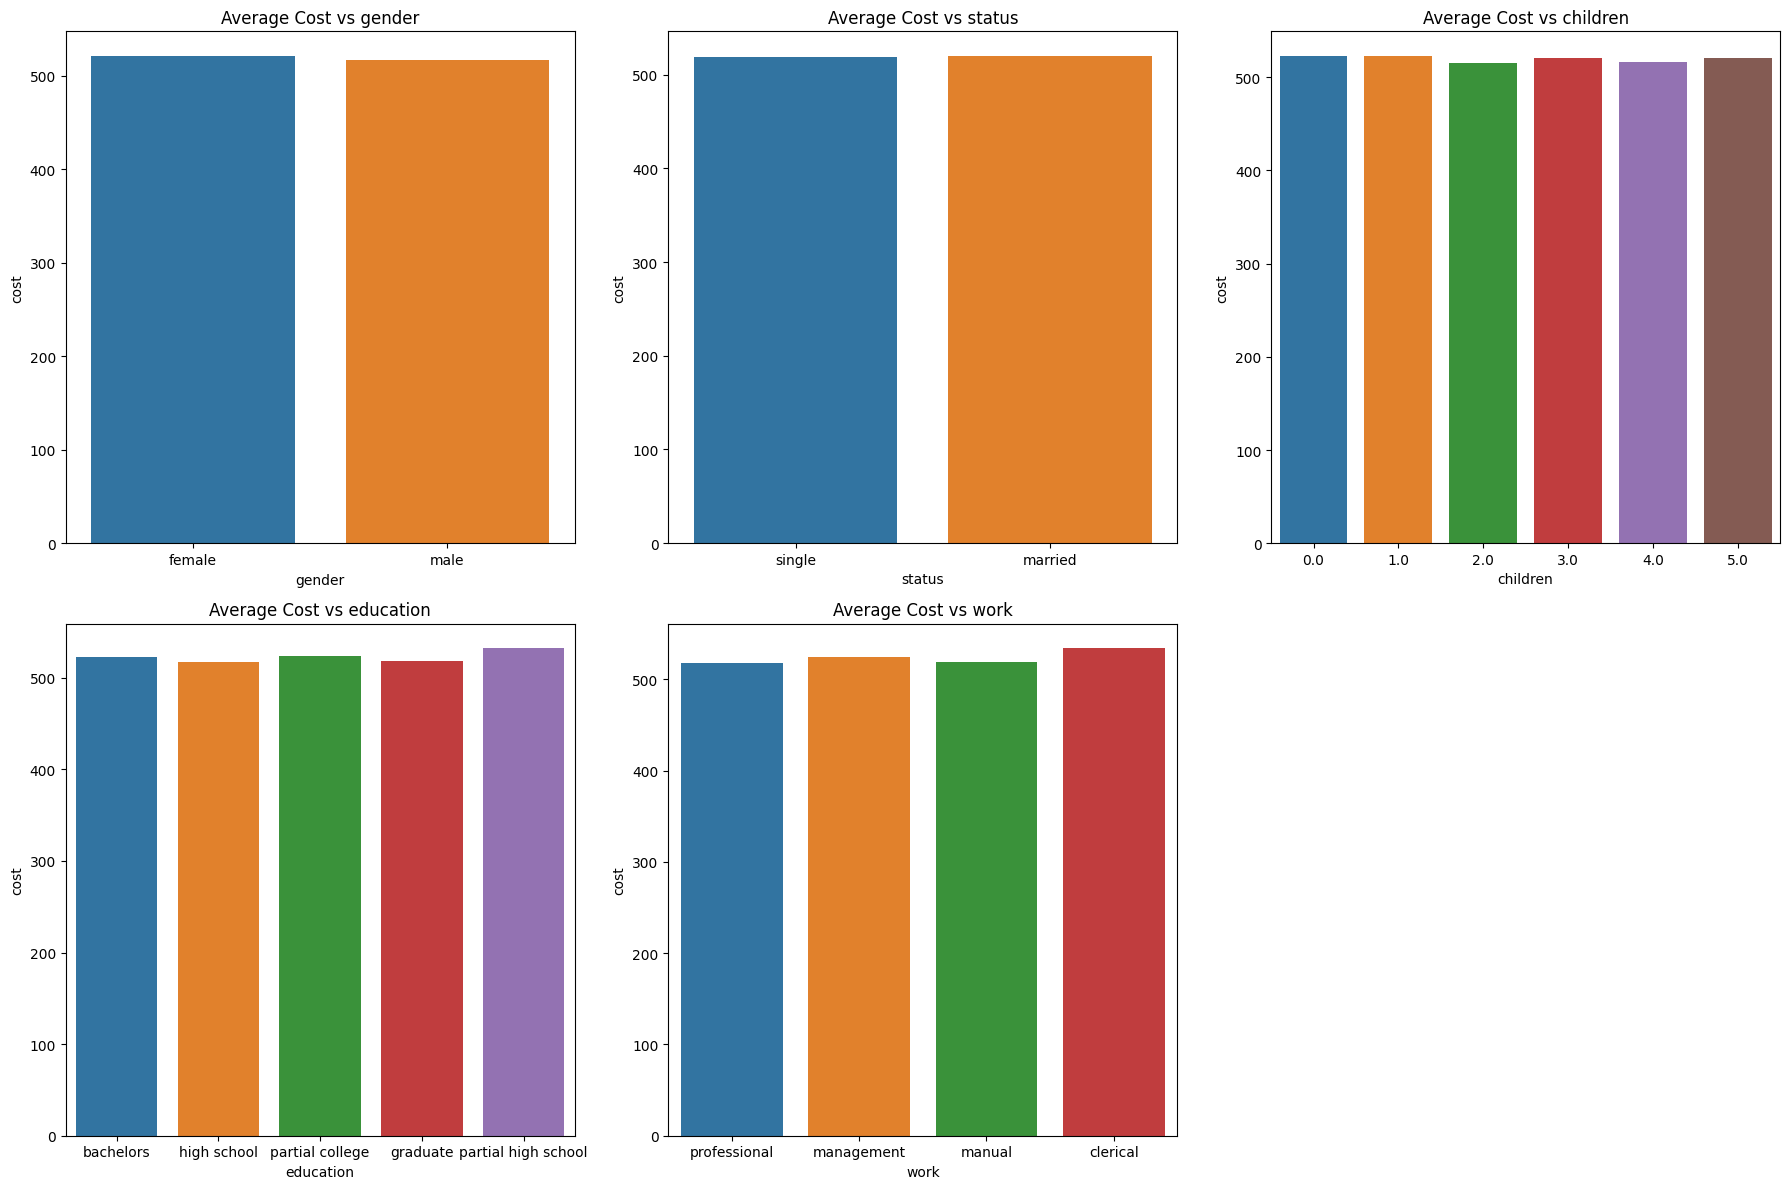

In [278]:

categorical_cols = ['gender', 'status', 'children', 'education', 'work']

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y='cost', data=train, estimator=lambda x: round(x.mean(), 2), errorbar=None)
    plt.title(f'Average Cost vs {col}')

plt.tight_layout()
plt.show()


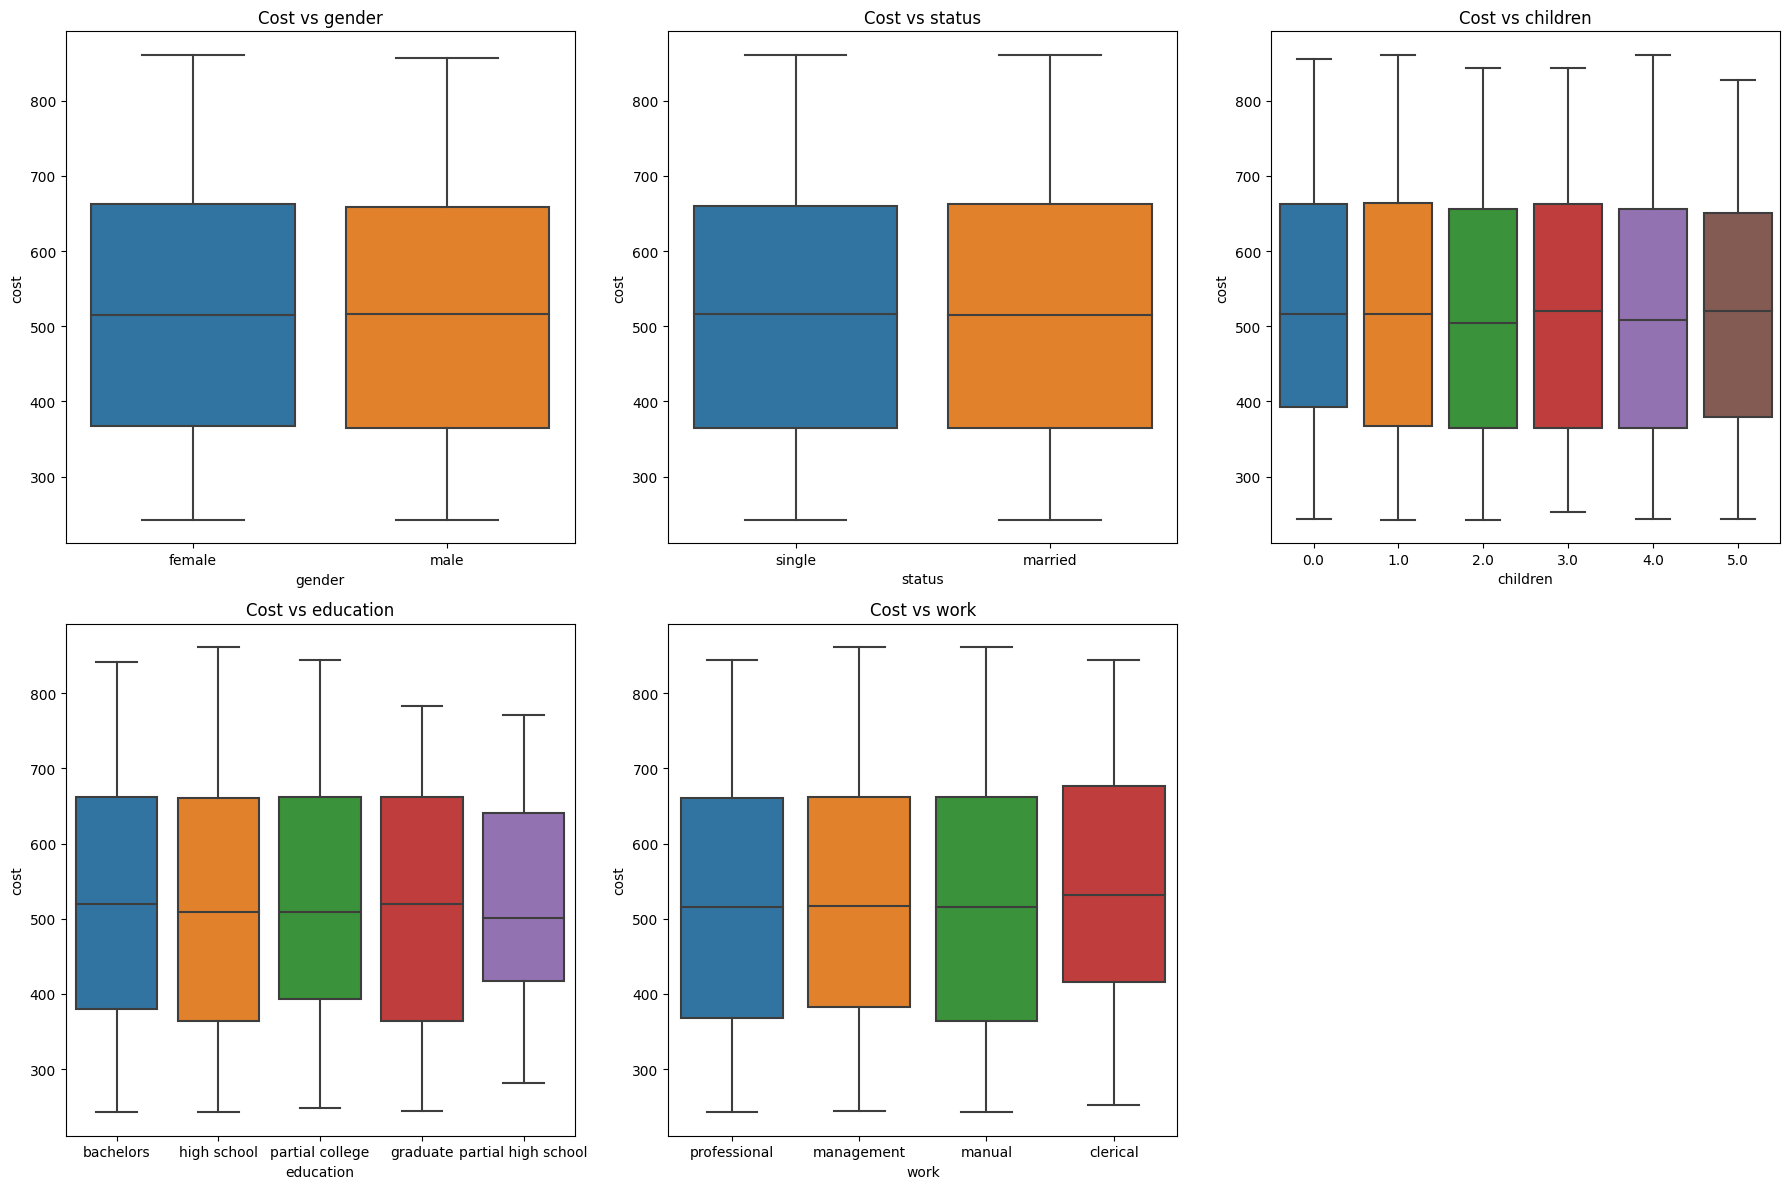

In [279]:


categorical_cols = ['gender', 'status', 'children', 'education', 'work']

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # تقسيم الرسومات 2 صف × 3 أعمدة
    sns.boxplot(x=col, y='cost', data=train)
    plt.title(f'Cost vs {col}')

plt.tight_layout()
plt.show()


The only important things are the number of children and the work.

In [280]:
categorical_cols = ['gender', 'status', 'children', 'education', 'work']
for col in categorical_cols :
  print(train[col].value_counts())

gender
female    20222
male      19159
Name: count, dtype: int64
status
single     19953
married    19428
Name: count, dtype: int64
children
2.0    8259
4.0    8090
3.0    7761
1.0    7656
5.0    3932
0.0    3683
Name: count, dtype: int64
education
high school            23484
bachelors              10401
partial college         3419
graduate                2038
partial high school       39
Name: count, dtype: int64
work
manual          19994
professional    13001
management       5673
clerical          713
Name: count, dtype: int64


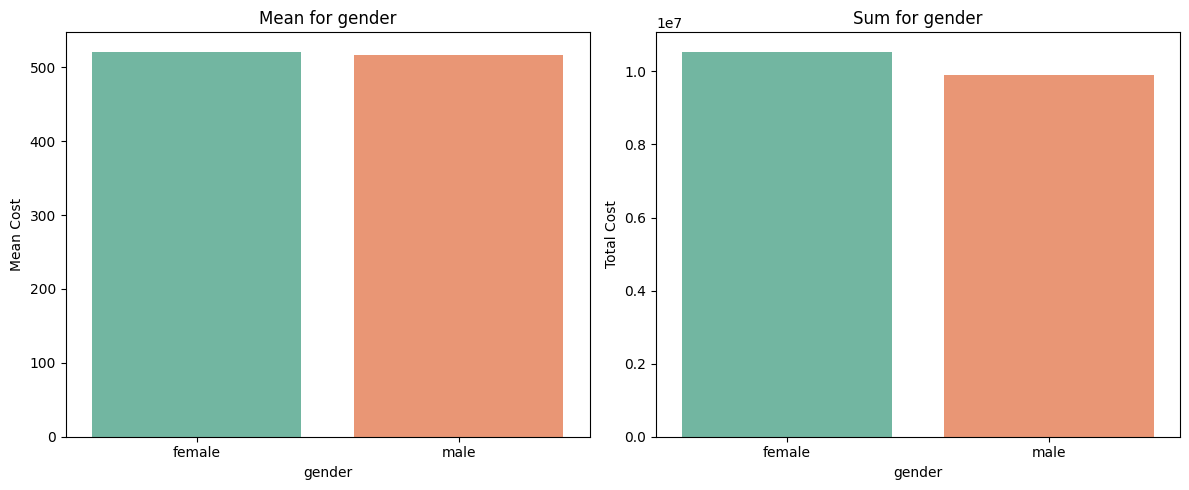

In [281]:

# حساب المتوسط والإجمالي
gender_stats = train.groupby("gender")["cost"].agg(["mean", "sum"]).reset_index()

# رسم الأعمدة جنب بعض
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# المتوسط
sns.barplot(data=gender_stats, x="gender", y="mean", ax=axes[0], palette="Set2")
axes[0].set_title("Mean for gender")
axes[0].set_ylabel("Mean Cost")

# الإجمالي
sns.barplot(data=gender_stats, x="gender", y="sum", ax=axes[1], palette="Set2")
axes[1].set_title("Sum for gender")
axes[1].set_ylabel("Total Cost")

plt.tight_layout()
plt.show()


- The sum of females is greater, but only because their number is greater in the data.
- The same thing will happen with singles and marrieds.
- I will keep all these columns as reserves

## product,	department,	brand

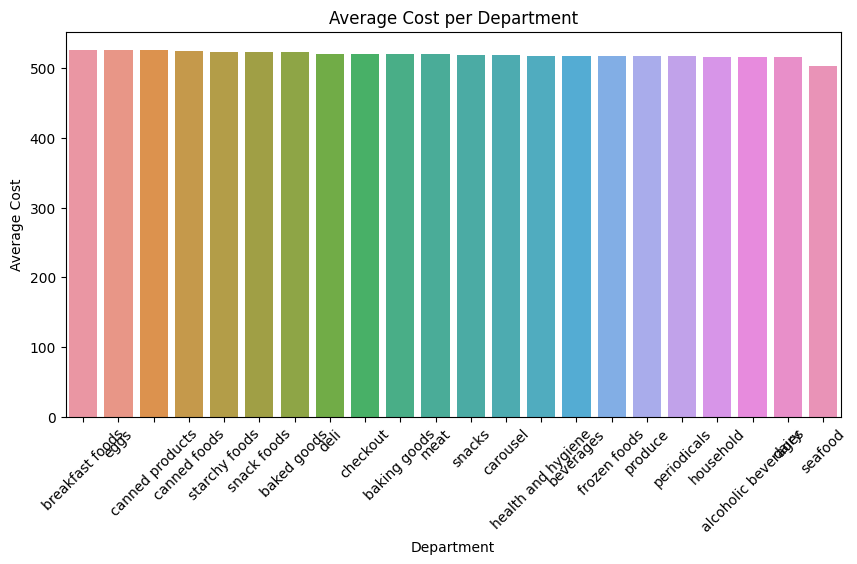

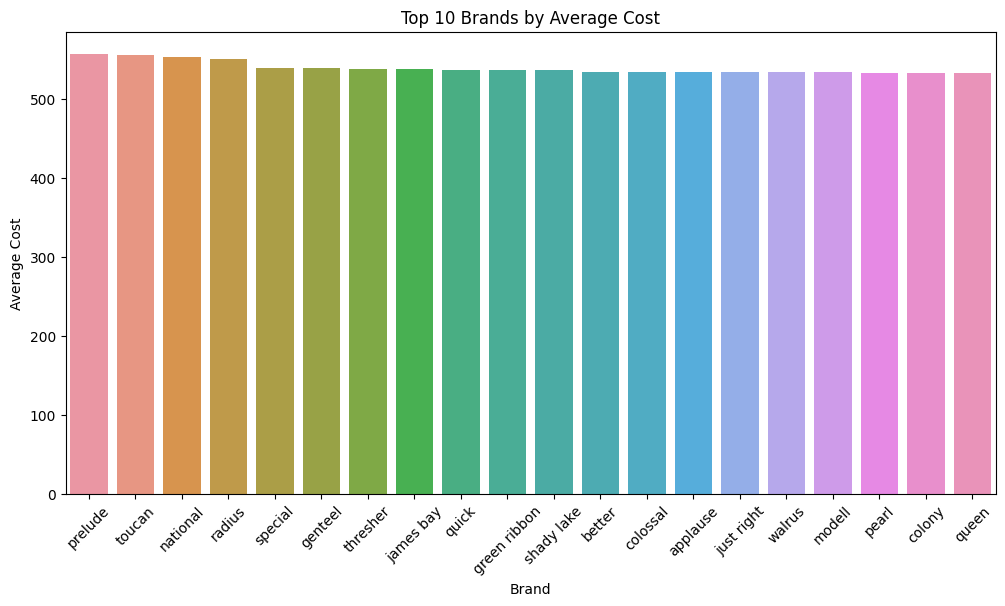

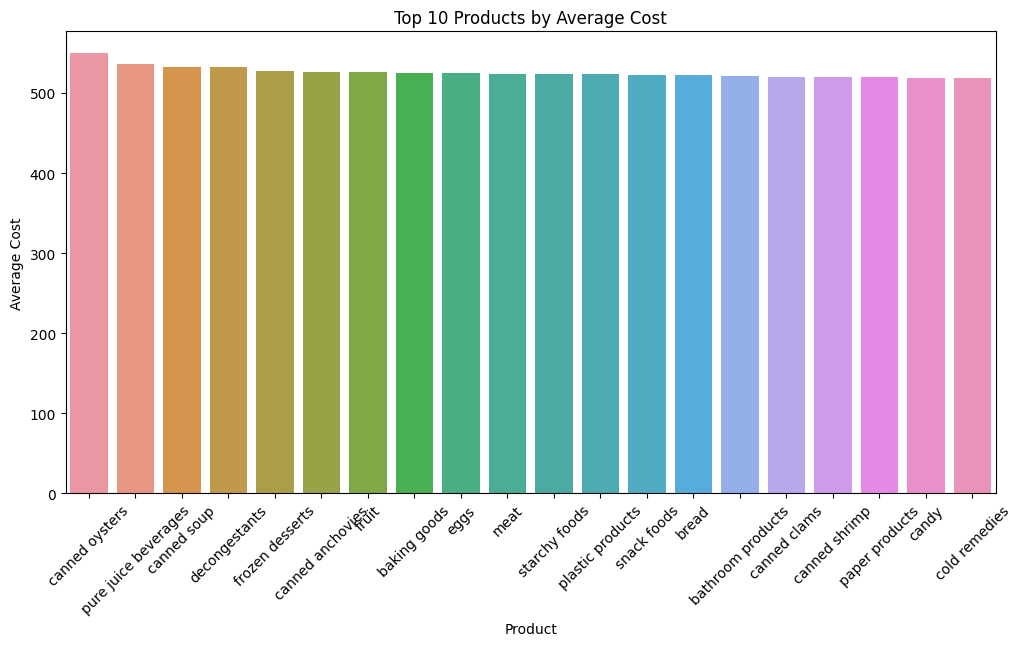

In [282]:

# 1) department
mean_cost_department = train.groupby("department")["cost"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=mean_cost_department.index, y=mean_cost_department.values)
plt.title("Average Cost per Department")
plt.ylabel("Average Cost")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()

# 2) brand (Top 10)
mean_cost_brand = train.groupby("brand")["cost"].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=mean_cost_brand.index, y=mean_cost_brand.values)
plt.title("Top 10 Brands by Average Cost")
plt.ylabel("Average Cost")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.show()

# 3) product (Top 10)
mean_cost_product = train.groupby("product")["cost"].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=mean_cost_product.index, y=mean_cost_product.values)
plt.title("Top 10 Products by Average Cost")
plt.ylabel("Average Cost")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.show()



- I'll leave them, but I'll enter frequency encoding instead of target encoding, because target encoding in this case has no meaning.

## distance_km

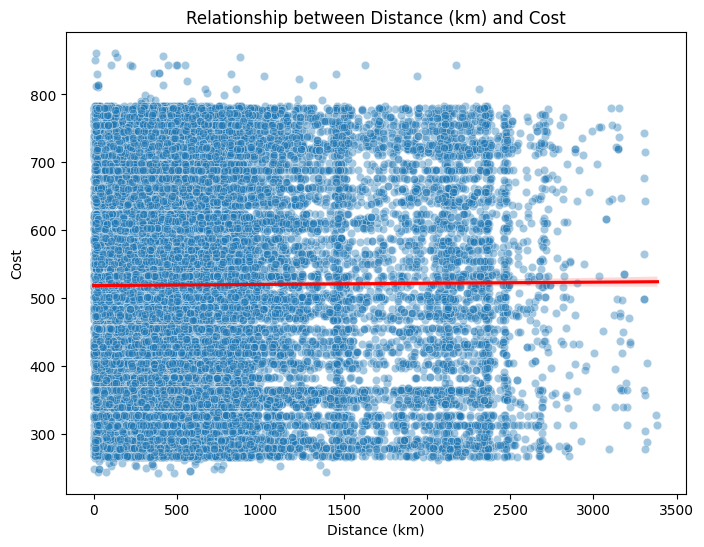

In [283]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="distance_km", y="cost", data=train, alpha=0.4)
sns.regplot(x="distance_km", y="cost", data=train, scatter=False, color="red")  # خط اتجاه

plt.title("Relationship between Distance (km) and Cost")
plt.xlabel("Distance (km)")
plt.ylabel("Cost")
plt.show()

- Colum has no effect on the cost

## num_features

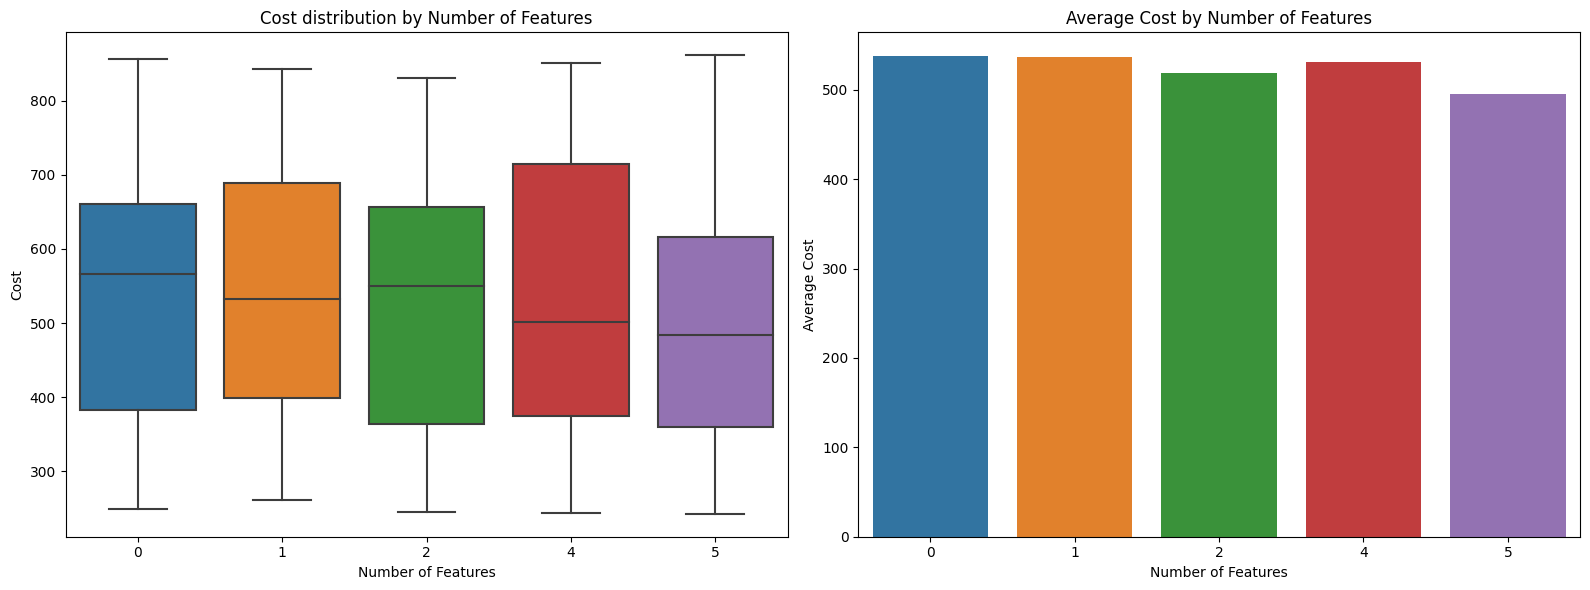

In [284]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Boxplot
sns.boxplot(x="num_features", y="cost", data=train, ax=axes[0])
axes[0].set_title("Cost distribution by Number of Features")
axes[0].set_xlabel("Number of Features")
axes[0].set_ylabel("Cost")

# Barplot (mean values)
sns.barplot(x="num_features", y="cost", data=train, estimator=np.mean, ci=None, ax=axes[1])
axes[1].set_title("Average Cost by Number of Features")
axes[1].set_xlabel("Number of Features")
axes[1].set_ylabel("Average Cost")

plt.tight_layout()
plt.show()


- We will keep this column.

## Conclusion

In [285]:
train.isna().sum()

id                     0
yearly_income          0
gross_weight           0
net_weight             0
is_recyclable          0
promotion_name         0
store_kind             0
store_sales            0
store_cost             0
grocery_area           0
frozen_area            0
meat_area              0
cost                   0
customer_city          0
customer_state         0
seller_city            0
seller_state           0
review_score           0
store_area             0
package_weight         0
status                 0
gender                 0
children               0
education              0
work                   0
product                0
department             0
brand                  0
distance_km            0
video store            0
florist                0
ready food             0
coffee bar             0
bar for salad          0
num_features           0
income_category        0
store_area_bins        4
store_area_category    4
dtype: int64

In [286]:
train = train.dropna()

In [287]:
train.drop(columns='store_area_bins', inplace=True)

In [288]:
train.columns

Index(['id', 'yearly_income', 'gross_weight', 'net_weight', 'is_recyclable',
       'promotion_name', 'store_kind', 'store_sales', 'store_cost',
       'grocery_area', 'frozen_area', 'meat_area', 'cost', 'customer_city',
       'customer_state', 'seller_city', 'seller_state', 'review_score',
       'store_area', 'package_weight', 'status', 'gender', 'children',
       'education', 'work', 'product', 'department', 'brand', 'distance_km',
       'video store', 'florist', 'ready food', 'coffee bar', 'bar for salad',
       'num_features', 'income_category', 'store_area_category'],
      dtype='object')

In [289]:
cols_to_drop = ["is_recyclable", 'status', 'gender','review_score',
    "customer_city", "seller_city", "distance_km" ,"id"
]

train = train.drop(columns=cols_to_drop)

In [290]:
cols_to_drop = ["is_recyclable", 'status', 'gender','review_score',
    "customer_city", "seller_city", "distance_km"
]
test = test.drop(columns=cols_to_drop)

In [291]:
train.head()

,yearly_income,gross_weight,net_weight,promotion_name,store_kind,store_sales,store_cost,grocery_area,frozen_area,meat_area,cost,customer_state,seller_state,store_area,package_weight,children,education,work,product,department,brand,video store,florist,ready food,coffee bar,bar for salad,num_features,income_category,store_area_category
0,10000.0,28.1997,26.6008,dimes off,premium,8.76,4.2924,2037.64,481.98,323.00,602.7575,SC,SC,2842.62,1.5989,4.0,bachelors,professional,cleaning supplies,household,red wing,1,1,1,1,1,5,Low,2k-3k
1,46200.0,16.5710,14.9720,budget bargains,supermarket,6.36,1.9716,2049.72,457.36,0.00,708.6650,MG,MG,2507.08,1.5990,3.0,bachelors,management,snack foods,snack foods,nationeel,0,0,0,0,0,0,Medium,2k-3k
2,30000.0,28.6358,27.1822,shelf emptiers,supermarket,10.86,4.4526,1322.21,523.32,348.85,564.2647,SP,SP,2194.38,1.4536,2.0,high school,manual,magazines,periodicals,excel,0,1,0,0,0,1,Low,2k-3k
3,30000.0,14.2161,11.2944,savings galore,small,1.98,0.6732,0.00,440.92,293.95,724.5119,SP,SP,734.87,2.9217,3.0,partial college,professional,dairy,dairy,carlson,0,0,0,1,0,1,Low,<1k
4,50000.0,12.6172,9.7100,sale winners,premium,11.56,4.9708,1872.19,593.93,395.95,519.7574,SP,SP,2862.07,2.9072,5.0,bachelors,professional,vegetables,produce,hermanos,1,1,1,1,1,5,Medium,2k-3k


# Preprocessing

In [292]:
train.head()

,yearly_income,gross_weight,net_weight,promotion_name,store_kind,store_sales,store_cost,grocery_area,frozen_area,meat_area,cost,customer_state,seller_state,store_area,package_weight,children,education,work,product,department,brand,video store,florist,ready food,coffee bar,bar for salad,num_features,income_category,store_area_category
0,10000.0,28.1997,26.6008,dimes off,premium,8.76,4.2924,2037.64,481.98,323.00,602.7575,SC,SC,2842.62,1.5989,4.0,bachelors,professional,cleaning supplies,household,red wing,1,1,1,1,1,5,Low,2k-3k
1,46200.0,16.5710,14.9720,budget bargains,supermarket,6.36,1.9716,2049.72,457.36,0.00,708.6650,MG,MG,2507.08,1.5990,3.0,bachelors,management,snack foods,snack foods,nationeel,0,0,0,0,0,0,Medium,2k-3k
2,30000.0,28.6358,27.1822,shelf emptiers,supermarket,10.86,4.4526,1322.21,523.32,348.85,564.2647,SP,SP,2194.38,1.4536,2.0,high school,manual,magazines,periodicals,excel,0,1,0,0,0,1,Low,2k-3k
3,30000.0,14.2161,11.2944,savings galore,small,1.98,0.6732,0.00,440.92,293.95,724.5119,SP,SP,734.87,2.9217,3.0,partial college,professional,dairy,dairy,carlson,0,0,0,1,0,1,Low,<1k
4,50000.0,12.6172,9.7100,sale winners,premium,11.56,4.9708,1872.19,593.93,395.95,519.7574,SP,SP,2862.07,2.9072,5.0,bachelors,professional,vegetables,produce,hermanos,1,1,1,1,1,5,Medium,2k-3k


- brand & promotion_name >> one hot encoding is better
- city & state >> target/freq encoder is better

In [293]:
cols_to_encode = ["children", 'education',"work", "num_features", 'store_kind', 'income_category', 'store_area_category']

print("Shape Befor encoding:", train.shape)

# one hot encoding
train = pd.get_dummies(train, columns=cols_to_encode, drop_first=True)

# نتأكد إن أعمدة الـ one hot كلها 0/1 integer
dummy_cols = [col for col in train.columns if any(prefix in col for prefix in cols_to_encode)]
train[dummy_cols] = train[dummy_cols].astype(int)

print("Shape after encoding:", train.shape)
train.head()

Shape Befor encoding: (39377, 29)
Shape after encoding: (39377, 46)


,yearly_income,gross_weight,net_weight,promotion_name,store_sales,store_cost,grocery_area,frozen_area,meat_area,cost,customer_state,seller_state,store_area,package_weight,product,department,brand,video store,florist,ready food,coffee bar,bar for salad,children_1.0,children_2.0,children_3.0,children_4.0,children_5.0,education_graduate,education_high school,education_partial college,education_partial high school,work_management,work_manual,work_professional,num_features_1,num_features_2,num_features_4,num_features_5,store_kind_small,store_kind_supermarket,income_category_Medium,income_category_High,income_category_Very High,store_area_category_1k-2k,store_area_category_2k-3k,store_area_category_3k-4k
0,10000.0,28.1997,26.6008,dimes off,8.76,4.2924,2037.64,481.98,323.00,602.7575,SC,SC,2842.62,1.5989,cleaning supplies,household,red wing,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,46200.0,16.5710,14.9720,budget bargains,6.36,1.9716,2049.72,457.36,0.00,708.6650,MG,MG,2507.08,1.5990,snack foods,snack foods,nationeel,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,30000.0,28.6358,27.1822,shelf emptiers,10.86,4.4526,1322.21,523.32,348.85,564.2647,SP,SP,2194.38,1.4536,magazines,periodicals,excel,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
3,30000.0,14.2161,11.2944,savings galore,1.98,0.6732,0.00,440.92,293.95,724.5119,SP,SP,734.87,2.9217,dairy,dairy,carlson,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
4,50000.0,12.6172,9.7100,sale winners,11.56,4.9708,1872.19,593.93,395.95,519.7574,SP,SP,2862.07,2.9072,vegetables,produce,hermanos,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [294]:
cols_to_encode = ["children", 'education',"work", "num_features", 'store_kind', 'income_category', 'store_area_category']

print("Shape before encoding:", test.shape)

# one hot encoding
test = pd.get_dummies(test, columns=cols_to_encode, drop_first=True)

# نتأكد إن أعمدة الـ one hot كلها 0/1 integer
dummy_cols = [col for col in test.columns if any(prefix in col for prefix in cols_to_encode)]
test[dummy_cols] = test[dummy_cols].astype(int)

# مزامنة الأعمدة مع train (لو في أعمدة ناقصة أو زيادة)
for col in train.columns:
    if col not in test.columns:
        test[col] = 0
test = test[train.columns]  # ترتيب الأعمدة زي train



Shape before encoding: (19942, 30)


In [295]:
# =============================
#  Frequency Encoding
# =============================
cat_cols = ['seller_state', 'customer_state', 'promotion_name',
            'brand', 'product', 'department']

for col in cat_cols:
    freq_col = f"{col}_freq_enc"
    train[freq_col] = train[col].map(train[col].value_counts())

print("Frequency Encoding done:", cat_cols)


Frequency Encoding done: ['seller_state', 'customer_state', 'promotion_name', 'brand', 'product', 'department']


In [296]:
cat_cols = ['seller_state', 'customer_state', 'promotion_name',
            'brand', 'product', 'department']

for col in cat_cols:
    freq_col = f"{col}_freq_enc"
    freq_mapping = train[col].value_counts()
    test[freq_col] = test[col].map(freq_mapping)

# لو فيه قيم جديدة في test مش موجودة في train → NaN نقدر نعوض بصفر
for col in cat_cols:
    freq_col = f"{col}_freq_enc"
    test[freq_col] = test[freq_col].fillna(0)

print("Frequency Encoding done for test:", cat_cols)


Frequency Encoding done for test: ['seller_state', 'customer_state', 'promotion_name', 'brand', 'product', 'department']


In [297]:
train.drop(columns=cat_cols, inplace=True)

In [298]:
test.drop(columns=cat_cols, inplace=True)

In [299]:
train.shape

(39377, 46)

- Frequency encoding is better with Random Forest
- Scaling is prohibited as long as we work on Random Forest.

In [303]:
X_train = train.drop("cost", axis=1)
y_train = train['cost']

In [301]:
# from sklearn.model_selection import train_test_split

# # Use only 10% of the training data to test the models
# X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.90, random_state=42)

# Modeling

 Get the best parameters using only 10% of the data 

In [302]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold

# Hyperparameter Grid

param_dist = {
    "n_estimators": [100, 200, 300, 500, 800, 1000],
    "max_depth": [None, 10, 20, 30, 40, 50, 60],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4, 6, 8, 10],
    "max_features": ["sqrt", "log2", None]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

# تدريب RandomizedSearchCV على الـ Train set
random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best CV Score (neg RMSE):", random_search.best_score_)

Best Params: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 60}
Best CV Score (neg RMSE): -108.1288732921038


Train the final model with the whole dataset

In [304]:
# Cross-validation Evaluation

best_rf = random_search.best_estimator_

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    best_rf.fit(X_tr, y_tr)
    preds = best_rf.predict(X_val)

    rmse = np.sqrt(((y_val - preds) ** 2).mean())
    r2 = 1 - ((y_val - preds) ** 2).sum() / ((y_val - y_val.mean()) ** 2).sum()

    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold} → CV RMSE: {rmse:.3f} | CV R²: {r2:.3f}")

print("\n--- Cross-validation Evaluation on Train Set ---")
print(f"Average CV RMSE: {np.mean(rmse_scores):.3f}")
print(f"Average CV R²: {np.mean(r2_scores):.3f}")

Fold 1 → CV RMSE: 78.572 | CV R²: 0.752
Fold 2 → CV RMSE: 76.928 | CV R²: 0.759
Fold 3 → CV RMSE: 78.070 | CV R²: 0.749
Fold 4 → CV RMSE: 78.186 | CV R²: 0.753
Fold 5 → CV RMSE: 79.037 | CV R²: 0.748

--- Cross-validation Evaluation on Train Set ---
Average CV RMSE: 78.159
Average CV R²: 0.752


In [305]:
X_test = test.copy()
X_test = X_test[X_train.columns]

In [306]:
preds_test = best_rf.predict(X_test)
preds_test[:10] 

array([716.51399108, 603.55540753, 738.67083336, 436.84123104,
       748.0992    , 474.7271    , 753.4871201 , 597.76051995,
       485.69644397, 393.4006    ])

In [307]:
submission = pd.DataFrame({
    "id": range(len(preds_test)),  
    "cost": preds_test           
})

print(submission.head())

   id        cost
0   0  716.513991
1   1  603.555408
2   2  738.670833
3   3  436.841231
4   4  748.099200


In [308]:
submission

,id,cost
0,0,716.513991
1,1,603.555408
2,2,738.670833
3,3,436.841231
4,4,748.099200
...,...,...
19937,19937,362.215789
19938,19938,513.115900
19939,19939,635.730504
19940,19940,627.095905


In [309]:
last_id = submission['id'].iloc[-1]
print(last_id)

19941


In [310]:
submission.to_csv("submission.csv", index=False)

print("File saved as submission.csv")

File saved as submission.csv


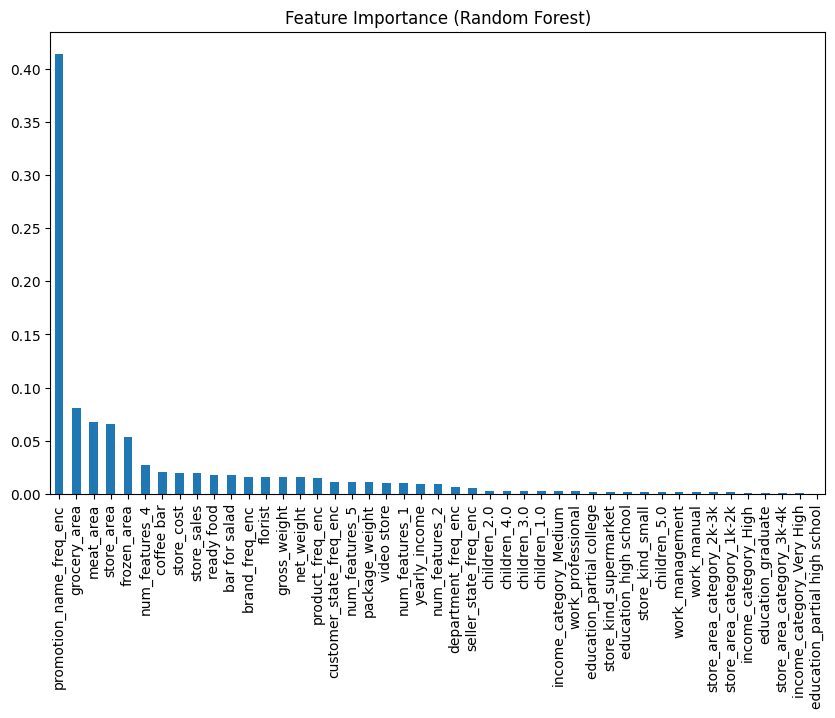

In [312]:
# Get feature importance

importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Show top 20
plt.figure(figsize=(10,6))
importances.head(50).plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.show()